# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Ikhlas Naufalsyah Ranau]
- **Email:** [naufalsyah.ranau@gmail.com]
- **ID Dicoding:** [mikhlasnr]

## Background E-Commerce Public Dataset



### **Tentang Dataset**
Dataset ini adalah [**Brazilian E-Commerce Public Dataset**](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) yang disediakan oleh **Olist**, marketplace terbesar di Brasil. Dataset ini berisi informasi dari **100.000 pesanan** yang dilakukan dari **2016 hingga 2018** di berbagai marketplace di Brasil.


### **Tentang Olist**
Olist adalah department store terbesar di marketplace Brasil yang:
- Menghubungkan bisnis kecil dari seluruh Brasil
- Menyediakan akses ke berbagai channel dengan kontrak tunggal
- Memungkinkan merchant menjual produk melalui Olist Store
- Menggunakan partner logistik untuk pengiriman langsung ke pelanggan


### **Karakteristik Dataset**
- **Sumber**: Data komersial nyata yang telah dianonimkan
- **Periode**: 2016-2018 (3 tahun data)
- **Volume**: 100k+ pesanan
- **Cakupan**: Multiple marketplace di Brasil
- **Anonimisasi**: Referensi perusahaan dan partner diganti dengan nama rumah besar Game of Thrones

### **Fitur Dataset**
Dataset memungkinkan analisis pesanan dari berbagai dimensi:
- **Status pesanan** dan timeline pengiriman
- **Harga** dan performa pembayaran
- **Lokasi pelanggan** dan data geografis
- **Atribut produk** dan kategori
- **Review pelanggan** dan rating kepuasan

### **Catatan Penting**
- Satu pesanan bisa memiliki **multiple items**
- Setiap item bisa dipenuhi oleh **seller yang berbeda**
- Semua teks yang mengidentifikasi toko diganti dengan nama rumah Game of Thrones
- Dataset geolokasi tersedia untuk mapping koordinat lat/lng


### Data Schema

![image info](https://i.imgur.com/HRhd2Y0.png)




## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display


## Data Wrangling

### Gathering Data

#### Import Semua Dataset

In [2]:
base_url = 'data'
customers_df = pd.read_csv(base_url + "/customers_dataset.csv")

sellers_df = pd.read_csv(base_url + "/sellers_dataset.csv")

geolocation_df = pd.read_csv(base_url +  "/geolocation_dataset.csv")

product_category_df = pd.read_csv(base_url + "/product_category_name_translation.csv")
products_df = pd.read_csv(base_url + "/products_dataset.csv")

orders_df = pd.read_csv(base_url + "/orders_dataset.csv")
order_items_df = pd.read_csv(base_url + "/order_items_dataset.csv")
order_payments_df = pd.read_csv(base_url + "/order_payments_dataset.csv")
order_reviews_df = pd.read_csv(base_url + "/order_reviews_dataset.csv")


### Data Understanding

#### customers_df

Dataset ini berisi informasi tentang identitas dan lokasi geografis pelanggan. 

Berikut adalah penjelasan detail untuk setiap kolom pada dataset customers:

- **customer_id**: ID unik untuk setiap transaksi pesanan. Format: string alfanumerik 32 karakter. Contoh: "06b8999e2fba1a1fbc88172c00ba8bc7". Setiap pesanan memiliki customer_id yang berbeda, bahkan jika berasal dari pelanggan yang sama.

- **customer_unique_id**: ID permanen untuk setiap pelanggan. Format: string alfanumerik 32 karakter. Contoh: "861eff4711a542e4b93843c6dd7febb0". Digunakan untuk melacak pembelian berulang dari pelanggan yang sama. Satu customer_unique_id dapat memiliki multiple customer_id.

- **customer_zip_code_prefix**: Prefix kode pos pelanggan (5 digit pertama). Format: string numerik. Contoh: "14409", "9790". Mengidentifikasi wilayah geografis tempat tinggal pelanggan.

- **customer_city**: Nama kota tempat tinggal pelanggan. Format: string lowercase. Contoh: "franca", "sao bernardo do campo", "sao paulo". Dapat digunakan untuk analisis geografis dan segmentasi pelanggan.

- **customer_state**: Kode negara bagian tempat tinggal pelanggan. Format: string 2 karakter. Contoh: "SP", "RJ", "MG". Menggunakan singkatan standar negara bagian Brasil.

**Insight:**
- Satu pelanggan (customer_unique_id) dapat melakukan multiple pesanan, sehingga akan memiliki multiple customer_id
- customer_unique_id adalah kunci untuk analisis customer lifetime value (CLV) dan customer retention
- Dataset ini dapat di-join dengan tabel orders menggunakan customer_id untuk mendapatkan riwayat pesanan pelanggan
- Data geografis (zip_code_prefix, city, state) dapat di-join dengan tabel geolocation untuk mendapatkan koordinat lat/lng
- Dapat digunakan untuk analisis: segmentasi pelanggan, distribusi geografis, customer behavior, dan market penetration


In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### sellers_df

Dataset ini berisi informasi tentang penjual (sellers) yang menjual produk di platform e-commerce. Dataset ini mencakup identitas penjual dan lokasi geografis mereka, yang berguna untuk analisis distribusi penjual dan performa berdasarkan wilayah.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset sellers:

- **seller_id**: ID unik untuk setiap penjual. Format: string alfanumerik 32 karakter. Contoh: "3442f8959a84dea7ee197c632cb2df15". Ini adalah primary key yang menghubungkan dengan tabel order_items.

- **seller_zip_code_prefix**: Prefix kode pos penjual (5 digit pertama). Format: string numerik. Contoh: "13023", "13844", "20031". Mengidentifikasi wilayah geografis tempat penjual beroperasi.

- **seller_city**: Nama kota tempat penjual beroperasi. Format: string lowercase. Contoh: "campinas", "mogi guacu", "rio de janeiro". Dapat digunakan untuk analisis geografis dan segmentasi penjual.

- **seller_state**: Kode negara bagian tempat penjual beroperasi. Format: string 2 karakter. Contoh: "SP", "RJ", "PE". Menggunakan singkatan standar negara bagian Brasil.

**Catatan Penting:**
- seller_id adalah primary key yang menghubungkan dengan tabel order_items
- Data geografis (zip_code_prefix, city, state) dapat di-join dengan tabel geolocation untuk mendapatkan koordinat lat/lng
- Satu penjual dapat menjual multiple produk dan memiliki multiple order_items
- Dataset ini dapat di-join dengan tabel order_items menggunakan seller_id untuk mendapatkan performa penjual
- Dapat digunakan untuk analisis: seller performance, geographic distribution, seller clustering, dan market penetration analysis

In [4]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### geolocation_df

Dataset ini berisi informasi kode pos Brasil beserta koordinat geografisnya (latitude dan longitude). Dataset ini digunakan untuk membuat peta dan menghitung jarak antara penjual dan pelanggan.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset geolocation:

- **geolocation_zip_code_prefix**: Prefix kode pos Brasil (5 digit pertama). Kode pos Brasil memiliki format 8 digit (contoh: 01037-000), dan kolom ini menyimpan 5 digit pertama yang mengidentifikasi wilayah geografis tertentu. Contoh: "01037" mengidentifikasi wilayah tertentu di São Paulo.

- **geolocation_lat**: Latitude (garis lintang) dalam format decimal degrees. Nilai ini menunjukkan posisi geografis di utara atau selatan garis khatulistiwa. Untuk Brasil, nilai latitude biasanya negatif karena berada di belahan selatan bumi.

- **geolocation_lng**: Longitude (garis bujur) dalam format decimal degrees. Nilai ini menunjukkan posisi geografis di barat atau timur meridian utama (Greenwich). Untuk Brasil, nilai longitude biasanya negatif karena berada di belahan barat bumi.

- **geolocation_city**: Nama kota dalam format lowercase (huruf kecil). Menunjukkan kota tempat lokasi geografis tersebut berada. Contoh: "sao paulo", "rio de janeiro", "belo horizonte".

- **geolocation_state**: Kode negara bagian Brasil (2 karakter). Brasil memiliki 26 negara bagian dan 1 distrik federal. Kode ini menggunakan singkatan standar. Contoh: "SP" untuk São Paulo, "RJ" untuk Rio de Janeiro, "MG" untuk Minas Gerais.


Insight:
- Satu kode pos prefix dapat memiliki beberapa koordinat lat/lng berbeda (karena kode pos bisa mencakup area yang luas)
- Koordinat lat/lng dapat digunakan untuk menghitung jarak antara lokasi menggunakan rumus Haversine atau metode geografis lainnya
- Dataset ini dapat di-join dengan tabel customers dan sellers menggunakan zip_code_prefix untuk mendapatkan koordinat geografis mereka



In [5]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### product_category_df

Dataset ini berisi tabel terjemahan untuk nama kategori produk dari bahasa Portugis ke bahasa Inggris. Dataset ini membantu dalam analisis kategori produk dengan menyediakan terjemahan yang mudah dipahami untuk audiens internasional.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset product_category:

- **product_category_name**: Nama kategori produk dalam bahasa Portugis. Format: string. Contoh: "beleza_saude", "informatica_acessorios", "automotivo", "cama_mesa_banho". Ini adalah nama kategori asli yang digunakan dalam dataset products.

- **product_category_name_english**: Terjemahan nama kategori produk dalam bahasa Inggris. Format: string. Contoh: "health_beauty", "computers_accessories", "auto", "bed_bath_table". Ini adalah terjemahan yang lebih mudah dipahami untuk analisis internasional.

**Insight:**
- Dataset ini adalah tabel lookup/reference yang menghubungkan nama kategori Portugis dengan terjemahan Inggris
- Dapat di-join dengan tabel products menggunakan product_category_name
- Berguna untuk analisis kategori yang lebih mudah dipahami oleh audiens internasional
- Dapat digunakan untuk analisis: category performance, market segmentation, dan product categorization

In [6]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### products_df

Dataset ini berisi informasi detail tentang setiap produk yang dijual di platform e-commerce. Dataset ini mencakup atribut fisik produk, kategori, dan metadata yang berguna untuk analisis produk dan rekomendasi.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset products:

- **product_id**: ID unik untuk setiap produk. Format: string alfanumerik 32 karakter. Contoh: "1e9e8ef04dbcff4541ed26657ea517e5". Ini adalah primary key yang menghubungkan dengan tabel order_items.

- **product_category_name**: Nama kategori produk dalam bahasa Portugis. Format: string. Contoh: "perfumaria", "artes", "esporte_lazer", "bebes". Dapat di-join dengan tabel product_category_name_translation untuk mendapatkan terjemahan bahasa Inggris.

- **product_name_lenght**: Panjang karakter dari nama produk. Tipe data: integer. Contoh: 40, 44, 46. Mengindikasikan seberapa deskriptif nama produk tersebut.

- **product_description_lenght**: Panjang karakter dari deskripsi produk. Tipe data: integer. Contoh: 287, 276, 250. Mengindikasikan seberapa detail deskripsi produk yang diberikan penjual.

- **product_photos_qty**: Jumlah foto yang tersedia untuk produk. Tipe data: integer. Contoh: 1, 4, 2. Semakin banyak foto, semakin baik untuk konversi penjualan.

- **product_weight_g**: Berat produk dalam gram. Tipe data: integer. Contoh: 225, 1000, 154. Digunakan untuk perhitungan biaya pengiriman dan logistik.

- **product_length_cm**: Panjang produk dalam sentimeter. Tipe data: integer. Contoh: 16, 30, 18. Salah satu dimensi fisik produk.

- **product_height_cm**: Tinggi produk dalam sentimeter. Tipe data: integer. Contoh: 10, 18, 9. Salah satu dimensi fisik produk.

- **product_width_cm**: Lebar produk dalam sentimeter. Tipe data: integer. Contoh: 14, 20, 15. Salah satu dimensi fisik produk.

**Insight:**
- product_id adalah primary key yang menghubungkan dengan tabel order_items
- product_category_name dapat di-join dengan tabel product_category_name_translation untuk mendapatkan terjemahan bahasa Inggris
- Dimensi fisik (length, height, width) dan weight dapat digunakan untuk analisis logistik dan biaya pengiriman
- product_name_lenght dan product_description_lenght dapat digunakan untuk analisis kualitas listing produk
- product_photos_qty dapat digunakan untuk analisis conversion rate (semakin banyak foto, semakin tinggi kemungkinan terjual)
- Dapat digunakan untuk analisis: product performance, category analysis, logistics optimization, dan product recommendation

In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### orders_df

Dataset ini berisi informasi utama tentang setiap pesanan dalam sistem e-commerce. Ini adalah tabel inti yang menghubungkan pelanggan dengan item yang dibeli, pembayaran, dan review. Dataset ini melacak seluruh siklus hidup pesanan dari pembelian hingga pengiriman.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset orders:

- **order_id**: ID unik untuk setiap pesanan. Format: string alfanumerik 32 karakter. Contoh: "e481f51cbdc54678b7cc49136f2d6af7". Ini adalah primary key yang menghubungkan dengan semua tabel lainnya.

- **customer_id**: ID pelanggan yang melakukan pesanan. Format: string alfanumerik 32 karakter. Contoh: "9ef432eb6251297304e76186b10a928d". Dapat di-join dengan tabel customers untuk mendapatkan informasi detail pelanggan.

- **order_status**: Status terkini dari pesanan. Format: string. Pilihan yang tersedia:
  - "delivered": Pesanan telah dikirim dan diterima pelanggan
  - "invoiced": Pesanan telah dibuat invoice (belum dikirim)
  - "shipped": Pesanan telah dikirim (sedang dalam perjalanan)
  - "canceled": Pesanan dibatalkan
  - "unavailable": Pesanan tidak tersedia

- **order_purchase_timestamp**: Waktu ketika pesanan dibuat/dibeli. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-10-02 10:56:33". Ini adalah waktu aktual ketika pelanggan menyelesaikan checkout.

- **order_approved_at**: Waktu ketika pesanan disetujui oleh sistem. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-10-02 11:07:15". Biasanya terjadi beberapa menit setelah order_purchase_timestamp.

- **order_delivered_carrier_date**: Waktu ketika pesanan diserahkan ke kurir untuk pengiriman. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-10-04 19:55:00". Bisa kosong (null) jika pesanan belum dikirim.

- **order_delivered_customer_date**: Waktu ketika pesanan diterima oleh pelanggan. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-10-10 21:25:13". Bisa kosong (null) jika pesanan belum diterima.

- **order_estimated_delivery_date**: Estimasi waktu pengiriman yang diberikan kepada pelanggan. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-10-18 00:00:00". Biasanya di-set ke 00:00:00 untuk menyamakan waktu.

**Insight:**
- order_id adalah primary key yang menghubungkan dengan semua tabel lainnya (order_items, order_payments, order_reviews)
- Satu customer_id dapat memiliki multiple order_id (pelanggan dapat melakukan multiple pesanan)
- order_delivered_carrier_date dan order_delivered_customer_date bisa kosong untuk pesanan yang belum dikirim/diterima
- Waktu pengiriman aktual = order_delivered_customer_date - order_delivered_carrier_date
- Dataset ini dapat di-join dengan tabel customers menggunakan customer_id
- Dapat digunakan untuk analisis: order lifecycle, delivery performance, customer behavior, seasonal trends, dan operational efficiency

In [8]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### order_items_df

Dataset ini berisi informasi detail tentang item-item yang dibeli dalam setiap pesanan. Setiap baris merepresentasikan satu item dalam pesanan tertentu.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset order_items:

- **order_id**: ID unik untuk setiap pesanan. Satu pesanan dapat memiliki beberapa item, sehingga order_id yang sama dapat muncul beberapa kali dalam dataset. Format: string alfanumerik 32 karakter. Contoh: "00010242fe8c5a6d1ba2dd792cb16214"

- **order_item_id**: Nomor urut item dalam satu pesanan. Dimulai dari 1 untuk item pertama dalam pesanan, 2 untuk item kedua, dan seterusnya. Tipe data: integer. Contoh: 1, 2, 3 (menunjukkan item ke-1, ke-2, ke-3 dalam pesanan yang sama)

- **product_id**: ID unik untuk setiap produk. Format: string alfanumerik 32 karakter. Contoh: "4244733e06e7ecb4970a6e2683c13e61". Dapat di-join dengan tabel products untuk mendapatkan informasi detail produk.

- **seller_id**: ID unik untuk penjual yang menjual produk tersebut. Format: string alfanumerik 32 karakter. Contoh: "48436dade18ac8b2bce089ec2a041202". Dapat di-join dengan tabel sellers untuk mendapatkan informasi penjual.

- **shipping_limit_date**: Batas waktu pengiriman yang ditetapkan untuk item tersebut. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2017-09-19 09:45:35". Ini adalah deadline yang harus dipenuhi penjual untuk mengirimkan item.

- **price**: Harga produk per unit dalam mata uang Real Brasil (BRL). Tipe data: float. Contoh: 58.90, 239.90, 199.00. Harga ini adalah harga yang dibayar pelanggan untuk satu unit produk.

- **freight_value**: Biaya pengiriman (ongkos kirim) untuk item tersebut dalam mata uang Real Brasil (BRL). Tipe data: float. Contoh: 13.29, 19.93, 17.87. Biaya ini terpisah dari harga produk dan biasanya dibebankan kepada pelanggan.

**Insight:**
- Satu pesanan (order_id) dapat memiliki multiple items dengan order_item_id yang berbeda
- Setiap item dalam pesanan dapat berasal dari seller yang berbeda (seller_id berbeda)
- Total nilai pesanan = sum(price) + sum(freight_value) untuk semua item dalam pesanan tersebut
- Dataset ini adalah tabel fact utama yang menghubungkan orders, products, dan sellers
- Dapat digunakan untuk analisis: nilai pesanan, performa penjual, popularitas produk, dan efisiensi pengiriman

In [9]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### order_payments_df

Dataset ini berisi informasi tentang metode pembayaran yang digunakan untuk setiap pesanan. Satu pesanan dapat memiliki multiple metode pembayaran (misalnya: sebagian dibayar dengan kartu kredit, sebagian dengan voucher).

Berikut adalah penjelasan detail untuk setiap kolom pada dataset order_payments:

- **order_id**: ID unik untuk setiap pesanan. Format: string alfanumerik 32 karakter. Contoh: "b81ef226f3fe1789b1e8b2acac839d17". Dapat di-join dengan tabel orders untuk mendapatkan informasi detail pesanan.

- **payment_sequential**: Nomor urut metode pembayaran dalam satu pesanan. Dimulai dari 1 untuk pembayaran pertama, 2 untuk pembayaran kedua, dan seterusnya. Tipe data: integer. Contoh: 1, 2, 3 (menunjukkan pembayaran ke-1, ke-2, ke-3 dalam pesanan yang sama).

- **payment_type**: Jenis metode pembayaran yang digunakan. Format: string. Pilihan yang tersedia:
  - "credit_card": Kartu kredit
  - "debit_card": Kartu debit
  - "boleto": Voucher bank (metode pembayaran populer di Brasil)
  - "voucher": Voucher/gift card
  - "not_defined": Tidak didefinisikan

- **payment_installments**: Jumlah cicilan untuk pembayaran tersebut. Tipe data: integer. Contoh: 1 (lunas), 2, 3, 6, 8, 12. Nilai 1 berarti pembayaran lunas tanpa cicilan.

- **payment_value**: Nilai pembayaran untuk metode pembayaran tersebut dalam mata uang Real Brasil (BRL). Tipe data: float. Contoh: 99.33, 24.39, 65.71. Total payment_value untuk satu pesanan harus sama dengan total nilai pesanan.

**Insight:**
- Satu pesanan (order_id) dapat memiliki multiple metode pembayaran dengan payment_sequential yang berbeda
- Total payment_value untuk semua metode pembayaran dalam satu pesanan harus sama dengan total nilai pesanan
- payment_installments > 1 hanya berlaku untuk credit_card dan debit_card
- boleto biasanya tidak memiliki cicilan (payment_installments = 1)
- Dataset ini dapat di-join dengan tabel orders menggunakan order_id
- Dapat digunakan untuk analisis: preferensi metode pembayaran, analisis cicilan, conversion rate per metode pembayaran, dan customer payment behavior

In [10]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### order_reviews_df

Dataset ini berisi informasi tentang review dan rating yang diberikan oleh pelanggan setelah menerima produk. Setelah pelanggan membeli produk dari Olist Store, penjual akan diberitahu untuk memenuhi pesanan tersebut. Setelah pelanggan menerima produk, atau pada tanggal pengiriman yang diperkirakan, pelanggan akan menerima survei kepuasan melalui email di mana mereka dapat memberikan rating untuk pengalaman pembelian dan menulis komentar.

Berikut adalah penjelasan detail untuk setiap kolom pada dataset order_reviews:

- **review_id**: ID unik untuk setiap review. Format: string alfanumerik 32 karakter. Contoh: "7bc2406110b926393aa56f80a40eba40". Setiap review memiliki ID yang unik.

- **order_id**: ID unik untuk pesanan yang direview. Format: string alfanumerik 32 karakter. Contoh: "73fc7af87114b39712e6da79b0a377eb". Dapat di-join dengan tabel orders untuk mendapatkan informasi detail pesanan.

- **review_score**: Rating kepuasan pelanggan dalam skala 1-5. Tipe data: integer. Nilai:
  - 1: Sangat tidak puas
  - 2: Tidak puas
  - 3: Netral
  - 4: Puas
  - 5: Sangat puas

- **review_comment_title**: Judul komentar review (opsional). Format: string. Bisa kosong (null) jika pelanggan tidak memberikan judul. Contoh: "Excellent product", "Fast delivery".

- **review_comment_message**: Pesan komentar review (opsional). Format: string. Bisa kosong (null) jika pelanggan tidak memberikan komentar. Contoh: "Recebi bem antes do prazo estipulado" (diterima jauh sebelum batas waktu yang ditetapkan).

- **review_creation_date**: Tanggal review dibuat. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2018-01-18 00:00:00". Biasanya di-set ke 00:00:00 untuk menyamakan waktu.

- **review_answer_timestamp**: Timestamp ketika review dijawab/dikirim. Format: datetime (YYYY-MM-DD HH:MM:SS). Contoh: "2018-01-18 21:46:59". Waktu aktual ketika pelanggan mengirimkan review.

**Insight:**
- Tidak semua pesanan memiliki review (beberapa pelanggan tidak memberikan review)
- review_score adalah metrik utama untuk mengukur kepuasan pelanggan
- review_comment_title dan review_comment_message dapat kosong (null)
- review_creation_date biasanya berbeda dengan review_answer_timestamp
- Dataset ini dapat di-join dengan tabel orders menggunakan order_id
- Dapat digunakan untuk analisis: customer satisfaction, sentiment analysis, product quality assessment, seller performance, dan customer feedback trends

In [11]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

#### Menilai Tabel customers_df

Berikut list menilai kualitas data customers_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `customer_id` dan `customer_unique_id`: harus format string 32 karakter alfanumerik
   - `customer_zip_code_prefix`: harus numerik (5 digit pertama kode pos Brasil)
   - `customer_state`: harus kode negara bagian Brasil yang valid (2 karakter: SP, RJ, MG, dll)
3. **Duplicate Data** - Mengecek duplikasi:
   - `customer_id` harus unik (tidak boleh duplikat karena setiap ID mewakili satu transaksi pesanan)
   - `customer_unique_id` boleh duplikat (satu pelanggan bisa punya multiple pesanan)
4. **Inconsistent Value** - Mengecek konsistensi format:
   - `customer_city`: harus lowercase (huruf kecil)
   - `customer_state`: harus uppercase (huruf besar)
   - `customer_zip_code_prefix`: format harus konsisten (string numerik)

In [12]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values = customers_df.isnull().sum()
missing_percentage = (customers_df.isnull().sum() / len(customers_df)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percentage.values
})
print(missing_df.to_string(index=False))

if missing_values.sum() > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {missing_values.sum()} missing values!")
else:
    print("\n✅ Tidak ada missing values pada customers_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format customer_id dan customer_unique_id (32 karakter alfanumerik)
print("\n2.1 Format customer_id dan customer_unique_id:")
invalid_customer_id = customers_df[~customers_df['customer_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
invalid_customer_unique_id = customers_df[~customers_df['customer_unique_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]

print(f"  - Invalid customer_id: {len(invalid_customer_id)} baris")
print(f"  - Invalid customer_unique_id: {len(invalid_customer_unique_id)} baris")

if len(invalid_customer_id) > 0:
    print(f"    ⚠️ Contoh invalid customer_id:\n{invalid_customer_id[['customer_id']].head()}")
if len(invalid_customer_unique_id) > 0:
    print(f"    ⚠️ Contoh invalid customer_unique_id:\n{invalid_customer_unique_id[['customer_unique_id']].head()}")

# 2.2 Cek format customer_zip_code_prefix (harus numerik, 5 digit atau kurang)
print("\n2.2 Format customer_zip_code_prefix:")
# Convert to string and check if numeric
customers_df['zip_code_str'] = customers_df['customer_zip_code_prefix'].astype(str)
invalid_zip = customers_df[~customers_df['zip_code_str'].str.match(r'^\d{1,5}$')]
print(f"  - Invalid zip_code_prefix: {len(invalid_zip)} baris")

if len(invalid_zip) > 0:
    print(f"    ⚠️ Contoh invalid zip_code_prefix:\n{invalid_zip[['customer_zip_code_prefix']].head()}")
else:
    print("  ✅ Semua zip_code_prefix valid (numerik)")

# 2.3 Cek kode negara bagian Brasil yang valid
print("\n2.3 Format customer_state:")
# Kode negara bagian Brasil yang valid (26 states + 1 distrik federal)
valid_states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
                'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
                'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
invalid_state = customers_df[~customers_df['customer_state'].isin(valid_states)]
print(f"  - Invalid state codes: {len(invalid_state)} baris")

if len(invalid_state) > 0:
    print(f"    ⚠️ State codes yang tidak valid:\n{invalid_state['customer_state'].value_counts()}")
else:
    print("  ✅ Semua state codes valid")

# Drop temporary column
customers_df.drop('zip_code_str', axis=1, inplace=True, errors='ignore')

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate customer_id (harus unik)
print("\n3.1 Duplicate customer_id:")
duplicate_customer_id = customers_df[customers_df.duplicated(subset=['customer_id'], keep=False)]
duplicate_count = customers_df['customer_id'].duplicated().sum()
print(f"  - Jumlah customer_id yang duplikat: {duplicate_count}")

if duplicate_count > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count} customer_id yang duplikat!")
    print(f"    Total baris dengan customer_id duplikat: {len(duplicate_customer_id)}")
    if len(duplicate_customer_id) > 0:
        print(f"    Contoh customer_id yang duplikat:\n{duplicate_customer_id[['customer_id', 'customer_unique_id']].head(10)}")
else:
    print("  ✅ Semua customer_id unik (tidak ada duplikat)")

# 3.2 Cek duplicate customer_unique_id (boleh duplikat, tapi kita lihat statistiknya)
print("\n3.2 Duplicate customer_unique_id:")
duplicate_customer_unique_id = customers_df[customers_df.duplicated(subset=['customer_unique_id'], keep=False)]
duplicate_unique_count = customers_df['customer_unique_id'].duplicated().sum()
unique_customers = customers_df['customer_unique_id'].nunique()
total_records = len(customers_df)

print(f"  - Total records: {total_records}")
print(f"  - Unique customers: {unique_customers}")
print(f"  - Customer_unique_id yang duplikat: {duplicate_unique_count}")
print(f"  - Rata-rata pesanan per customer: {total_records/unique_customers:.2f}")

if duplicate_unique_count > 0:
    print("  ℹ️ Ini normal - satu customer bisa punya multiple pesanan")
    print(f"    Contoh customer dengan multiple pesanan:\n{customers_df.groupby('customer_unique_id').size().sort_values(ascending=False).head(5)}")
else:
    print("  ✅ Setiap customer hanya punya 1 pesanan")

# 4. INCONSISTENT VALUE
print("\n" + "=" * 60)
print("4. INCONSISTENT VALUE")
print("=" * 60)

# 4.1 Cek format customer_city (harus lowercase)
print("\n4.1 Format customer_city (harus lowercase):")
not_lowercase_city = customers_df[customers_df['customer_city'] != customers_df['customer_city'].str.lower()]
print(f"  - Jumlah city yang tidak lowercase: {len(not_lowercase_city)}")

if len(not_lowercase_city) > 0:
    print(f"    ⚠️ Contoh city yang tidak lowercase:")
    print(not_lowercase_city[['customer_city']].head())
else:
    print("  ✅ Semua customer_city sudah lowercase")

# 4.2 Cek format customer_state (harus uppercase)
print("\n4.2 Format customer_state (harus uppercase):")
not_uppercase_state = customers_df[customers_df['customer_state'] != customers_df['customer_state'].str.upper()]
print(f"  - Jumlah state yang tidak uppercase: {len(not_uppercase_state)}")

if len(not_uppercase_state) > 0:
    print(f"    ⚠️ Contoh state yang tidak uppercase:")
    print(not_uppercase_state[['customer_state']].head())
else:
    print("  ✅ Semua customer_state sudah uppercase")

# 4.3 Cek konsistensi format customer_zip_code_prefix
print("\n4.3 Konsistensi format customer_zip_code_prefix:")
zip_lengths = customers_df['customer_zip_code_prefix'].astype(str).str.len()
inconsistent_zip = zip_lengths.value_counts().sort_index()
print("  Distribusi panjang zip_code_prefix:")
print(inconsistent_zip)

1. MISSING VALUES

Jumlah missing values per kolom:
                   Kolom  Jumlah Missing  Persentase (%)
             customer_id               0             0.0
      customer_unique_id               0             0.0
customer_zip_code_prefix               0             0.0
           customer_city               0             0.0
          customer_state               0             0.0

✅ Tidak ada missing values pada customers_df

2. INVALID VALUE

2.1 Format customer_id dan customer_unique_id:
  - Invalid customer_id: 0 baris
  - Invalid customer_unique_id: 0 baris

2.2 Format customer_zip_code_prefix:
  - Invalid zip_code_prefix: 0 baris
  ✅ Semua zip_code_prefix valid (numerik)

2.3 Format customer_state:
  - Invalid state codes: 0 baris
  ✅ Semua state codes valid

3. DUPLICATE DATA

3.1 Duplicate customer_id:
  - Jumlah customer_id yang duplikat: 0
  ✅ Semua customer_id unik (tidak ada duplikat)

3.2 Duplicate customer_unique_id:
  - Total records: 99441
  - Unique customers

In [13]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA customers_df")
print("=" * 60)
print(f"\nTotal baris data: {len(customers_df)}")
print(f"Total kolom: {len(customers_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid customer_id: {'❌ Ada' if len(invalid_customer_id) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid zip_code: {'❌ Ada' if len(invalid_zip) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid state: {'❌ Ada' if len(invalid_state) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate customer_id: {'❌ Ada' if duplicate_count > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent city format: {'❌ Ada' if len(not_lowercase_city) > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent state format: {'❌ Ada' if len(not_uppercase_state) > 0 else '✅ Tidak ada'}")


SUMMARY - KESIMPULAN PENILAIAN DATA customers_df

Total baris data: 99441
Total kolom: 5

Status kualitas data:
  - Missing values: ✅ Tidak ada
  - Invalid customer_id: ✅ Tidak ada
  - Invalid zip_code: ✅ Tidak ada
  - Invalid state: ✅ Tidak ada
  - Duplicate customer_id: ✅ Tidak ada
  - Inconsistent city format: ✅ Tidak ada
  - Inconsistent state format: ✅ Tidak ada


#### Menilai Tabel sellers_df

Berikut list menilai kualitas data sellers_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `seller_id`: harus format string 32 karakter alfanumerik
   - `seller_zip_code_prefix`: harus numerik (5 digit pertama kode pos Brasil)
   - `seller_state`: harus kode negara bagian Brasil yang valid (2 karakter: SP, RJ, MG, dll)
3. **Duplicate Data** - Mengecek duplikasi:
   - `seller_id` harus unik (tidak boleh duplikat karena setiap ID mewakili satu penjual unik)
4. **Inconsistent Value** - Mengecek konsistensi format:
   - `seller_city`: harus lowercase (huruf kecil)
   - `seller_state`: harus uppercase (huruf besar)
   - `seller_zip_code_prefix`: format harus konsisten (string numerik)


In [14]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_sellers = sellers_df.isnull().sum()
missing_percentage_sellers = (sellers_df.isnull().sum() / len(sellers_df)) * 100
missing_df_sellers = pd.DataFrame({
    'Kolom': missing_values_sellers.index,
    'Jumlah Missing': missing_values_sellers.values,
    'Persentase (%)': missing_percentage_sellers.values
})
print(missing_df_sellers.to_string(index=False))

if missing_values_sellers.sum() > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {missing_values_sellers.sum()} missing values!")
else:
    print("\n✅ Tidak ada missing values pada sellers_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format seller_id (32 karakter alfanumerik)
print("\n2.1 Format seller_id:")
invalid_seller_id = sellers_df[~sellers_df['seller_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid seller_id: {len(invalid_seller_id)} baris")

if len(invalid_seller_id) > 0:
    print(f"    ⚠️ Contoh invalid seller_id:\n{invalid_seller_id[['seller_id']].head()}")
else:
    print("  ✅ Semua seller_id valid (32 karakter alfanumerik)")

# 2.2 Cek format seller_zip_code_prefix (harus numerik, 5 digit atau kurang)
print("\n2.2 Format seller_zip_code_prefix:")
# Convert to string and check if numeric
sellers_df['zip_code_str'] = sellers_df['seller_zip_code_prefix'].astype(str)
invalid_zip_sellers = sellers_df[~sellers_df['zip_code_str'].str.match(r'^\d{1,5}$')]
print(f"  - Invalid zip_code_prefix: {len(invalid_zip_sellers)} baris")

if len(invalid_zip_sellers) > 0:
    print(f"    ⚠️ Contoh invalid zip_code_prefix:\n{invalid_zip_sellers[['seller_zip_code_prefix']].head()}")
else:
    print("  ✅ Semua zip_code_prefix valid (numerik)")

# 2.3 Cek kode negara bagian Brasil yang valid
print("\n2.3 Format seller_state:")
# Kode negara bagian Brasil yang valid (26 states + 1 distrik federal)
valid_states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
                'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
                'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
invalid_state_sellers = sellers_df[~sellers_df['seller_state'].isin(valid_states)]
print(f"  - Invalid state codes: {len(invalid_state_sellers)} baris")

if len(invalid_state_sellers) > 0:
    print(f"    ⚠️ State codes yang tidak valid:\n{invalid_state_sellers['seller_state'].value_counts()}")
else:
    print("  ✅ Semua state codes valid")

# Drop temporary column
sellers_df.drop('zip_code_str', axis=1, inplace=True, errors='ignore')

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate seller_id (harus unik)
print("\n3.1 Duplicate seller_id:")
duplicate_seller_id = sellers_df[sellers_df.duplicated(subset=['seller_id'], keep=False)]
duplicate_count_sellers = sellers_df['seller_id'].duplicated().sum()
print(f"  - Jumlah seller_id yang duplikat: {duplicate_count_sellers}")

if duplicate_count_sellers > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_sellers} seller_id yang duplikat!")
    print(f"    Total baris dengan seller_id duplikat: {len(duplicate_seller_id)}")
    if len(duplicate_seller_id) > 0:
        print(f"    Contoh seller_id yang duplikat:\n{duplicate_seller_id[['seller_id', 'seller_city', 'seller_state']].head(10)}")
else:
    print("  ✅ Semua seller_id unik (tidak ada duplikat)")

# Informasi tambahan tentang jumlah seller
print(f"\n3.2 Informasi Seller:")
print(f"  - Total sellers: {len(sellers_df)}")
print(f"  - Unique seller_id: {sellers_df['seller_id'].nunique()}")

# 4. INCONSISTENT VALUE
print("\n" + "=" * 60)
print("4. INCONSISTENT VALUE")
print("=" * 60)

# 4.1 Cek format seller_city (harus lowercase)
print("\n4.1 Format seller_city (harus lowercase):")
not_lowercase_city_sellers = sellers_df[sellers_df['seller_city'] != sellers_df['seller_city'].str.lower()]
print(f"  - Jumlah city yang tidak lowercase: {len(not_lowercase_city_sellers)}")

if len(not_lowercase_city_sellers) > 0:
    print(f"    ⚠️ Contoh city yang tidak lowercase:")
    print(not_lowercase_city_sellers[['seller_city']].head())
else:
    print("  ✅ Semua seller_city sudah lowercase")

# 4.2 Cek format seller_state (harus uppercase)
print("\n4.2 Format seller_state (harus uppercase):")
not_uppercase_state_sellers = sellers_df[sellers_df['seller_state'] != sellers_df['seller_state'].str.upper()]
print(f"  - Jumlah state yang tidak uppercase: {len(not_uppercase_state_sellers)}")

if len(not_uppercase_state_sellers) > 0:
    print(f"    ⚠️ Contoh state yang tidak uppercase:")
    print(not_uppercase_state_sellers[['seller_state']].head())
else:
    print("  ✅ Semua seller_state sudah uppercase")

# 4.3 Cek konsistensi format seller_zip_code_prefix
print("\n4.3 Konsistensi format seller_zip_code_prefix:")
zip_lengths_sellers = sellers_df['seller_zip_code_prefix'].astype(str).str.len()
inconsistent_zip_sellers = zip_lengths_sellers.value_counts().sort_index()
print("  Distribusi panjang zip_code_prefix:")
print(inconsistent_zip_sellers)

1. MISSING VALUES

Jumlah missing values per kolom:
                 Kolom  Jumlah Missing  Persentase (%)
             seller_id               0             0.0
seller_zip_code_prefix               0             0.0
           seller_city               0             0.0
          seller_state               0             0.0

✅ Tidak ada missing values pada sellers_df

2. INVALID VALUE

2.1 Format seller_id:
  - Invalid seller_id: 0 baris
  ✅ Semua seller_id valid (32 karakter alfanumerik)

2.2 Format seller_zip_code_prefix:
  - Invalid zip_code_prefix: 0 baris
  ✅ Semua zip_code_prefix valid (numerik)

2.3 Format seller_state:
  - Invalid state codes: 0 baris
  ✅ Semua state codes valid

3. DUPLICATE DATA

3.1 Duplicate seller_id:
  - Jumlah seller_id yang duplikat: 0
  ✅ Semua seller_id unik (tidak ada duplikat)

3.2 Informasi Seller:
  - Total sellers: 3095
  - Unique seller_id: 3095

4. INCONSISTENT VALUE

4.1 Format seller_city (harus lowercase):
  - Jumlah city yang tidak lowerca

In [15]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA sellers_df")
print("=" * 60)
print(f"\nTotal baris data: {len(sellers_df)}")
print(f"Total kolom: {len(sellers_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_sellers.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid seller_id: {'❌ Ada' if len(invalid_seller_id) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid zip_code: {'❌ Ada' if len(invalid_zip_sellers) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid state: {'❌ Ada' if len(invalid_state_sellers) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate seller_id: {'❌ Ada' if duplicate_count_sellers > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent city format: {'❌ Ada' if len(not_lowercase_city_sellers) > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent state format: {'❌ Ada' if len(not_uppercase_state_sellers) > 0 else '✅ Tidak ada'}")



SUMMARY - KESIMPULAN PENILAIAN DATA sellers_df

Total baris data: 3095
Total kolom: 4

Status kualitas data:
  - Missing values: ✅ Tidak ada
  - Invalid seller_id: ✅ Tidak ada
  - Invalid zip_code: ✅ Tidak ada
  - Invalid state: ✅ Tidak ada
  - Duplicate seller_id: ✅ Tidak ada
  - Inconsistent city format: ✅ Tidak ada
  - Inconsistent state format: ✅ Tidak ada


#### Menilai Tabel geolocation_df

Berikut list menilai kualitas data geolocation_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `geolocation_zip_code_prefix`: harus numerik (1-5 digit pertama kode pos Brasil)
   - `geolocation_lat`: harus numerik, untuk Brasil range valid sekitar -33.0 sampai -5.0 (negatif karena di belahan selatan)
   - `geolocation_lng`: harus numerik, untuk Brasil range valid sekitar -74.0 sampai -32.0 (negatif karena di belahan barat)
   - `geolocation_state`: harus kode negara bagian Brasil yang valid (2 karakter: SP, RJ, MG, dll)
3. **Outlier** - Mengecek nilai koordinat yang tidak masuk akal:
   - Latitude dan longitude yang berada di luar range Brasil
   - Koordinat yang tidak mungkin (misalnya di tengah lautan)
4. **Inconsistent Value** - Mengecek konsistensi format:
   - `geolocation_city`: harus lowercase (huruf kecil)
   - `geolocation_state`: harus uppercase (huruf besar)
   - `geolocation_zip_code_prefix`: format harus konsisten (string numerik)
   
**Catatan**: Satu `geolocation_zip_code_prefix` dapat memiliki beberapa koordinat lat/lng berbeda karena satu kode pos bisa mencakup area yang luas. Ini bukan masalah (duplicate yang diperbolehkan).


In [16]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_geo = geolocation_df.isnull().sum()
missing_percentage_geo = (geolocation_df.isnull().sum() / len(geolocation_df)) * 100
missing_df_geo = pd.DataFrame({
    'Kolom': missing_values_geo.index,
    'Jumlah Missing': missing_values_geo.values,
    'Persentase (%)': missing_percentage_geo.values
})
print(missing_df_geo.to_string(index=False))

if missing_values_geo.sum() > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {missing_values_geo.sum()} missing values!")
else:
    print("\n✅ Tidak ada missing values pada geolocation_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format geolocation_zip_code_prefix (harus numerik, 1-5 digit)
print("\n2.1 Format geolocation_zip_code_prefix:")
# Convert to string and check if numeric
geolocation_df['zip_code_str'] = geolocation_df['geolocation_zip_code_prefix'].astype(str)
invalid_zip_geo = geolocation_df[~geolocation_df['zip_code_str'].str.match(r'^\d{1,5}$')]
print(f"  - Invalid zip_code_prefix: {len(invalid_zip_geo)} baris")

if len(invalid_zip_geo) > 0:
    print(f"    ⚠️ Contoh invalid zip_code_prefix:\n{invalid_zip_geo[['geolocation_zip_code_prefix']].head()}")
else:
    print("  ✅ Semua zip_code_prefix valid (numerik)")

# 2.2 Cek format geolocation_lat (harus numerik)
print("\n2.2 Format geolocation_lat:")
# Convert to numeric, non-numeric values will become NaN
geolocation_df['lat_numeric'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
invalid_lat_geo = geolocation_df[geolocation_df['lat_numeric'].isna()]
print(f"  - Invalid latitude (non-numeric): {len(invalid_lat_geo)} baris")

if len(invalid_lat_geo) > 0:
    print(f"    ⚠️ Contoh invalid latitude:\n{invalid_lat_geo[['geolocation_lat']].head()}")
else:
    print("  ✅ Semua latitude valid (numerik)")

# 2.3 Cek format geolocation_lng (harus numerik)
print("\n2.3 Format geolocation_lng:")
# Convert to numeric, non-numeric values will become NaN
geolocation_df['lng_numeric'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')
invalid_lng_geo = geolocation_df[geolocation_df['lng_numeric'].isna()]
print(f"  - Invalid longitude (non-numeric): {len(invalid_lng_geo)} baris")

if len(invalid_lng_geo) > 0:
    print(f"    ⚠️ Contoh invalid longitude:\n{invalid_lng_geo[['geolocation_lng']].head()}")
else:
    print("  ✅ Semua longitude valid (numerik)")

# 2.4 Cek kode negara bagian Brasil yang valid
print("\n2.4 Format geolocation_state:")
# Kode negara bagian Brasil yang valid (26 states + 1 distrik federal)
valid_states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
                'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
                'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
invalid_state_geo = geolocation_df[~geolocation_df['geolocation_state'].isin(valid_states)]
print(f"  - Invalid state codes: {len(invalid_state_geo)} baris")

if len(invalid_state_geo) > 0:
    print(f"    ⚠️ State codes yang tidak valid:\n{invalid_state_geo['geolocation_state'].value_counts().head()}")
else:
    print("  ✅ Semua state codes valid")

# Drop temporary columns
geolocation_df.drop(['zip_code_str', 'lat_numeric', 'lng_numeric'], axis=1, inplace=True, errors='ignore')

# 3. OUTLIER - Range koordinat Brasil
print("\n" + "=" * 60)
print("3. OUTLIER - Nilai Koordinat yang Tidak Masuk Akal")
print("=" * 60)

# Range koordinat Brasil (dengan sedikit buffer untuk memastikan)
# Latitude Brasil: sekitar -33.7 (paling selatan) sampai 5.27 (paling utara)
# Longitude Brasil: sekitar -73.98 (paling barat) sampai -28.84 (paling timur)
brazil_lat_min, brazil_lat_max = -35.0, 6.0
brazil_lng_min, brazil_lng_max = -75.0, -28.0

print("\n3.1 Range koordinat Brasil:")
print(f"  - Latitude range: {brazil_lat_min} sampai {brazil_lat_max}")
print(f"  - Longitude range: {brazil_lng_min} sampai {brazil_lng_max}")

# Convert to numeric untuk pengecekan
geolocation_df['lat_num'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
geolocation_df['lng_num'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')

# Cek outlier latitude
outlier_lat = geolocation_df[
    (geolocation_df['lat_num'] < brazil_lat_min) |
    (geolocation_df['lat_num'] > brazil_lat_max)
]
print(f"\n3.2 Latitude outlier (di luar range Brasil): {len(outlier_lat)} baris")
if len(outlier_lat) > 0:
    print(f"    ⚠️ Contoh koordinat dengan latitude outlier:")
    print(outlier_lat[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_state']].head())
    print(f"    Range latitude outlier: {outlier_lat['lat_num'].min():.4f} sampai {outlier_lat['lat_num'].max():.4f}")
else:
    print("  ✅ Semua latitude dalam range Brasil")

# Cek outlier longitude
outlier_lng = geolocation_df[
    (geolocation_df['lng_num'] < brazil_lng_min) |
    (geolocation_df['lng_num'] > brazil_lng_max)
]
print(f"\n3.3 Longitude outlier (di luar range Brasil): {len(outlier_lng)} baris")
if len(outlier_lng) > 0:
    print(f"    ⚠️ Contoh koordinat dengan longitude outlier:")
    print(outlier_lng[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_state']].head())
    print(f"    Range longitude outlier: {outlier_lng['lng_num'].min():.4f} sampai {outlier_lng['lng_num'].max():.4f}")
else:
    print("  ✅ Semua longitude dalam range Brasil")

# Statistik koordinat
print(f"\n3.4 Statistik Koordinat:")
print(f"  Latitude - Min: {geolocation_df['lat_num'].min():.4f}, Max: {geolocation_df['lat_num'].max():.4f}, Mean: {geolocation_df['lat_num'].mean():.4f}")
print(f"  Longitude - Min: {geolocation_df['lng_num'].min():.4f}, Max: {geolocation_df['lng_num'].max():.4f}, Mean: {geolocation_df['lng_num'].mean():.4f}")

# Drop temporary columns
geolocation_df.drop(['lat_num', 'lng_num'], axis=1, inplace=True, errors='ignore')

# 4. INCONSISTENT VALUE
print("\n" + "=" * 60)
print("4. INCONSISTENT VALUE")
print("=" * 60)

# 4.1 Cek format geolocation_city (harus lowercase)
print("\n4.1 Format geolocation_city (harus lowercase):")
not_lowercase_city_geo = geolocation_df[geolocation_df['geolocation_city'] != geolocation_df['geolocation_city'].str.lower()]
print(f"  - Jumlah city yang tidak lowercase: {len(not_lowercase_city_geo)}")

if len(not_lowercase_city_geo) > 0:
    print(f"    ⚠️ Contoh city yang tidak lowercase:")
    print(not_lowercase_city_geo[['geolocation_city']].head())
else:
    print("  ✅ Semua geolocation_city sudah lowercase")

# 4.2 Cek format geolocation_state (harus uppercase)
print("\n4.2 Format geolocation_state (harus uppercase):")
not_uppercase_state_geo = geolocation_df[geolocation_df['geolocation_state'] != geolocation_df['geolocation_state'].str.upper()]
print(f"  - Jumlah state yang tidak uppercase: {len(not_uppercase_state_geo)}")

if len(not_uppercase_state_geo) > 0:
    print(f"    ⚠️ Contoh state yang tidak uppercase:")
    print(not_uppercase_state_geo[['geolocation_state']].head())
else:
    print("  ✅ Semua geolocation_state sudah uppercase")

# 4.3 Cek konsistensi format geolocation_zip_code_prefix
print("\n4.3 Konsistensi format geolocation_zip_code_prefix:")
zip_lengths_geo = geolocation_df['geolocation_zip_code_prefix'].astype(str).str.len()
inconsistent_zip_geo = zip_lengths_geo.value_counts().sort_index()
print("  Distribusi panjang zip_code_prefix:")
print(inconsistent_zip_geo)

# Informasi tambahan
print("\n4.4 Informasi Tambahan:")
print(f"  - Total records: {len(geolocation_df)}")
print(f"  - Unique zip_code_prefix: {geolocation_df['geolocation_zip_code_prefix'].nunique()}")
print(f"  - Rata-rata koordinat per zip_code: {len(geolocation_df) / geolocation_df['geolocation_zip_code_prefix'].nunique():.2f}")
print("  ℹ️ Satu zip_code bisa punya multiple koordinat (normal untuk dataset geolocation)")



1. MISSING VALUES

Jumlah missing values per kolom:
                      Kolom  Jumlah Missing  Persentase (%)
geolocation_zip_code_prefix               0             0.0
            geolocation_lat               0             0.0
            geolocation_lng               0             0.0
           geolocation_city               0             0.0
          geolocation_state               0             0.0

✅ Tidak ada missing values pada geolocation_df

2. INVALID VALUE

2.1 Format geolocation_zip_code_prefix:
  - Invalid zip_code_prefix: 0 baris
  ✅ Semua zip_code_prefix valid (numerik)

2.2 Format geolocation_lat:
  - Invalid latitude (non-numeric): 0 baris
  ✅ Semua latitude valid (numerik)

2.3 Format geolocation_lng:
  - Invalid longitude (non-numeric): 0 baris
  ✅ Semua longitude valid (numerik)

2.4 Format geolocation_state:
  - Invalid state codes: 0 baris
  ✅ Semua state codes valid

3. OUTLIER - Nilai Koordinat yang Tidak Masuk Akal

3.1 Range koordinat Brasil:
  - Latitud

In [17]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA geolocation_df")
print("=" * 60)
print(f"\nTotal baris data: {len(geolocation_df)}")
print(f"Total kolom: {len(geolocation_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_geo.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid zip_code: {'❌ Ada' if len(invalid_zip_geo) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid latitude: {'❌ Ada' if len(invalid_lat_geo) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid longitude: {'❌ Ada' if len(invalid_lng_geo) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid state: {'❌ Ada' if len(invalid_state_geo) > 0 else '✅ Tidak ada'}")
print(f"  - Latitude outlier: {'❌ Ada' if len(outlier_lat) > 0 else '✅ Tidak ada'}")
print(f"  - Longitude outlier: {'❌ Ada' if len(outlier_lng) > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent city format: {'❌ Ada' if len(not_lowercase_city_geo) > 0 else '✅ Tidak ada'}")
print(f"  - Inconsistent state format: {'❌ Ada' if len(not_uppercase_state_geo) > 0 else '✅ Tidak ada'}")



SUMMARY - KESIMPULAN PENILAIAN DATA geolocation_df

Total baris data: 1000163
Total kolom: 5

Status kualitas data:
  - Missing values: ✅ Tidak ada
  - Invalid zip_code: ✅ Tidak ada
  - Invalid latitude: ✅ Tidak ada
  - Invalid longitude: ✅ Tidak ada
  - Invalid state: ✅ Tidak ada
  - Latitude outlier: ❌ Ada
  - Longitude outlier: ❌ Ada
  - Inconsistent city format: ✅ Tidak ada
  - Inconsistent state format: ✅ Tidak ada


#### Menilai Tabel product_category_df

Berikut list menilai kualitas data product_category_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Duplicate Data** - Mengecek duplikasi:
   - `product_category_name`: harus unik (tidak boleh duplikat karena ini primary key untuk mapping)
   - Satu kategori Portugis harus memiliki satu terjemahan Inggris
3. **Incomplete Mapping** - Mengecek kelengkapan mapping:
   - Setiap `product_category_name` harus memiliki `product_category_name_english` (tidak boleh kosong)
   - Setiap `product_category_name_english` harus memiliki `product_category_name` (tidak boleh kosong)
4. **Inconsistent Value** - Mengecek konsistensi format:
   - Format string (spasi, underscore, dll)
   - Konsistensi penamaan (semua menggunakan underscore atau semua menggunakan spasi)
   
**Catatan**: Dataset ini adalah tabel lookup/reference yang menghubungkan nama kategori Portugis dengan terjemahan Inggris. Satu kategori harus punya satu terjemahan (one-to-one mapping).

In [18]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_category = product_category_df.isnull().sum()
missing_percentage_category = (product_category_df.isnull().sum() / len(product_category_df)) * 100
missing_df_category = pd.DataFrame({
    'Kolom': missing_values_category.index,
    'Jumlah Missing': missing_values_category.values,
    'Persentase (%)': missing_percentage_category.values
})
print(missing_df_category.to_string(index=False))

if missing_values_category.sum() > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {missing_values_category.sum()} missing values!")
    if missing_values_category['product_category_name'] > 0:
        print(f"  - Missing product_category_name: {missing_values_category['product_category_name']} baris")
    if missing_values_category['product_category_name_english'] > 0:
        print(f"  - Missing product_category_name_english: {missing_values_category['product_category_name_english']} baris")
else:
    print("\n✅ Tidak ada missing values pada product_category_df")

# 2. DUPLICATE DATA
print("\n" + "=" * 60)
print("2. DUPLICATE DATA")
print("=" * 60)

# 2.1 Cek duplicate product_category_name (harus unik)
print("\n2.1 Duplicate product_category_name:")
duplicate_category_name = product_category_df[product_category_df.duplicated(subset=['product_category_name'], keep=False)]
duplicate_count_category = product_category_df['product_category_name'].duplicated().sum()
print(f"  - Jumlah product_category_name yang duplikat: {duplicate_count_category}")

if duplicate_count_category > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_category} product_category_name yang duplikat!")
    print(f"    Total baris dengan product_category_name duplikat: {len(duplicate_category_name)}")
    if len(duplicate_category_name) > 0:
        print(f"    Contoh product_category_name yang duplikat:\n{duplicate_category_name.sort_values('product_category_name').head(10)}")
else:
    print("  ✅ Semua product_category_name unik (tidak ada duplikat)")

# 2.2 Cek duplicate product_category_name_english (boleh duplikat, tapi kita lihat statistiknya)
print("\n2.2 Duplicate product_category_name_english:")
duplicate_english = product_category_df[product_category_df.duplicated(subset=['product_category_name_english'], keep=False)]
duplicate_count_english = product_category_df['product_category_name_english'].duplicated().sum()
print(f"  - Jumlah product_category_name_english yang duplikat: {duplicate_count_english}")

if duplicate_count_english > 0:
    print(f"    ℹ️ Beberapa kategori Inggris memiliki terjemahan Portugis yang berbeda (bisa normal):")
    print(f"    Total baris dengan product_category_name_english duplikat: {len(duplicate_english)}")
    if len(duplicate_english) > 0:
        print(f"    Contoh product_category_name_english yang duplikat:\n{duplicate_english.sort_values('product_category_name_english').head(10)}")
else:
    print("  ✅ Semua product_category_name_english unik")

# Informasi tambahan
print(f"\n2.3 Informasi Category Mapping:")
print(f"  - Total categories: {len(product_category_df)}")
print(f"  - Unique product_category_name: {product_category_df['product_category_name'].nunique()}")
print(f"  - Unique product_category_name_english: {product_category_df['product_category_name_english'].nunique()}")

# 3. INCOMPLETE MAPPING
print("\n" + "=" * 60)
print("3. INCOMPLETE MAPPING")
print("=" * 60)

# 3.1 Cek apakah ada product_category_name yang tidak punya terjemahan Inggris
print("\n3.1 Mapping Completeness:")
# Cek missing values sudah di section 1, tapi kita cek juga empty string
empty_category_name = product_category_df[product_category_df['product_category_name'].astype(str).str.strip() == '']
empty_english_name = product_category_df[product_category_df['product_category_name_english'].astype(str).str.strip() == '']

print(f"  - product_category_name kosong (empty string): {len(empty_category_name)} baris")
print(f"  - product_category_name_english kosong (empty string): {len(empty_english_name)} baris")

if len(empty_category_name) > 0:
    print(f"    ⚠️ Ditemukan product_category_name yang kosong:\n{empty_category_name}")
if len(empty_english_name) > 0:
    print(f"    ⚠️ Ditemukan product_category_name_english yang kosong:\n{empty_english_name}")

if len(empty_category_name) == 0 and len(empty_english_name) == 0:
    print("  ✅ Semua kategori memiliki mapping yang lengkap")

# 4. INCONSISTENT VALUE
print("\n" + "=" * 60)
print("4. INCONSISTENT VALUE")
print("=" * 60)

# 4.1 Cek format product_category_name (biasanya menggunakan underscore)
print("\n4.1 Format product_category_name:")
# Cek apakah menggunakan underscore, spasi, atau format lainnya
has_underscore = product_category_df['product_category_name'].astype(str).str.contains('_', na=False).sum()
has_space = product_category_df['product_category_name'].astype(str).str.contains(' ', na=False).sum()
has_hyphen = product_category_df['product_category_name'].astype(str).str.contains('-', na=False).sum()

print(f"  - Menggunakan underscore (_): {has_underscore} kategori")
print(f"  - Menggunakan spasi: {has_space} kategori")
print(f"  - Menggunakan hyphen (-): {has_hyphen} kategori")

if has_space > 0:
    print(f"    ℹ️ Contoh kategori dengan spasi:\n{product_category_df[product_category_df['product_category_name'].astype(str).str.contains(' ', na=False)][['product_category_name']].head()}")

# 4.2 Cek format product_category_name_english
print("\n4.2 Format product_category_name_english:")
has_underscore_en = product_category_df['product_category_name_english'].astype(str).str.contains('_', na=False).sum()
has_space_en = product_category_df['product_category_name_english'].astype(str).str.contains(' ', na=False).sum()
has_hyphen_en = product_category_df['product_category_name_english'].astype(str).str.contains('-', na=False).sum()

print(f"  - Menggunakan underscore (_): {has_underscore_en} kategori")
print(f"  - Menggunakan spasi: {has_space_en} kategori")
print(f"  - Menggunakan hyphen (-): {has_hyphen_en} kategori")

if has_space_en > 0:
    print(f"    ℹ️ Contoh kategori Inggris dengan spasi:\n{product_category_df[product_category_df['product_category_name_english'].astype(str).str.contains(' ', na=False)][['product_category_name_english']].head()}")

# 4.3 Cek panjang nama kategori
print("\n4.3 Panjang Nama Kategori:")
category_name_lengths = product_category_df['product_category_name'].astype(str).str.len()
english_name_lengths = product_category_df['product_category_name_english'].astype(str).str.len()

print(f"  product_category_name:")
print(f"    - Min length: {category_name_lengths.min()}")
print(f"    - Max length: {category_name_lengths.max()}")
print(f"    - Mean length: {category_name_lengths.mean():.1f}")
print(f"  product_category_name_english:")
print(f"    - Min length: {english_name_lengths.min()}")
print(f"    - Max length: {english_name_lengths.max()}")
print(f"    - Mean length: {english_name_lengths.mean():.1f}")

1. MISSING VALUES

Jumlah missing values per kolom:
                        Kolom  Jumlah Missing  Persentase (%)
        product_category_name               0             0.0
product_category_name_english               0             0.0

✅ Tidak ada missing values pada product_category_df

2. DUPLICATE DATA

2.1 Duplicate product_category_name:
  - Jumlah product_category_name yang duplikat: 0
  ✅ Semua product_category_name unik (tidak ada duplikat)

2.2 Duplicate product_category_name_english:
  - Jumlah product_category_name_english yang duplikat: 0
  ✅ Semua product_category_name_english unik

2.3 Informasi Category Mapping:
  - Total categories: 71
  - Unique product_category_name: 71
  - Unique product_category_name_english: 71

3. INCOMPLETE MAPPING

3.1 Mapping Completeness:
  - product_category_name kosong (empty string): 0 baris
  - product_category_name_english kosong (empty string): 0 baris
  ✅ Semua kategori memiliki mapping yang lengkap

4. INCONSISTENT VALUE

4.1 Format

In [19]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA product_category_df")
print("=" * 60)
print(f"\nTotal baris data: {len(product_category_df)}")
print(f"Total kolom: {len(product_category_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_category.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate product_category_name: {'❌ Ada' if duplicate_count_category > 0 else '✅ Tidak ada'}")
print(f"  - Empty category_name: {'❌ Ada' if len(empty_category_name) > 0 else '✅ Tidak ada'}")
print(f"  - Empty english_name: {'❌ Ada' if len(empty_english_name) > 0 else '✅ Tidak ada'}")
print(f"\nInformasi:")
print(f"  - Total kategori: {len(product_category_df)}")
print(f"  - Unique kategori Portugis: {product_category_df['product_category_name'].nunique()}")
print(f"  - Unique kategori Inggris: {product_category_df['product_category_name_english'].nunique()}")




SUMMARY - KESIMPULAN PENILAIAN DATA product_category_df

Total baris data: 71
Total kolom: 2

Status kualitas data:
  - Missing values: ✅ Tidak ada
  - Duplicate product_category_name: ✅ Tidak ada
  - Empty category_name: ✅ Tidak ada
  - Empty english_name: ✅ Tidak ada

Informasi:
  - Total kategori: 71
  - Unique kategori Portugis: 71
  - Unique kategori Inggris: 71


#### Menilai Tabel products_df

Berikut list menilai kualitas data products_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `product_id`: harus format string 32 karakter alfanumerik
   - Kolom numerik harus bertipe numerik (length, weight, dimensions)
   - `product_category_name`: bisa null/kosong (opsional untuk beberapa produk)
3. **Duplicate Data** - Mengecek duplikasi:
   - `product_id` harus unik (tidak boleh duplikat karena setiap ID mewakili satu produk unik)
4. **Outlier** - Mengecek nilai yang tidak masuk akal:
   - `product_weight_g`: berat produk yang tidak masuk akal (terlalu kecil/terlalu besar)
   - `product_length_cm`, `product_height_cm`, `product_width_cm`: dimensi produk yang tidak masuk akal
   - `product_name_lenght`, `product_description_lenght`: panjang nama/deskripsi yang tidak masuk akal
   - `product_photos_qty`: jumlah foto yang tidak masuk akal
5. **Data Quality Issues**:
   - Nilai 0 atau negatif untuk dimensi/berat yang seharusnya positif
   - Dimensi atau berat yang sangat kecil (mungkin error input)
   
**Catatan**: Missing values pada beberapa kolom bisa normal (misalnya `product_category_name` bisa kosong untuk produk yang belum dikategorikan).


In [20]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_products = products_df.isnull().sum()
missing_percentage_products = (products_df.isnull().sum() / len(products_df)) * 100
missing_df_products = pd.DataFrame({
    'Kolom': missing_values_products.index,
    'Jumlah Missing': missing_values_products.values,
    'Persentase (%)': missing_percentage_products.values
}).sort_values('Jumlah Missing', ascending=False)
print(missing_df_products.to_string(index=False))

total_missing = missing_values_products.sum()
if total_missing > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {total_missing} missing values total!")
    print("\nDetail per kolom:")
    for col, count in missing_values_products.items():
        if count > 0:
            print(f"  - {col}: {count} ({missing_percentage_products[col]:.2f}%)")
else:
    print("\n✅ Tidak ada missing values pada products_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format product_id (32 karakter alfanumerik)
print("\n2.1 Format product_id:")
invalid_product_id = products_df[~products_df['product_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid product_id: {len(invalid_product_id)} baris")

if len(invalid_product_id) > 0:
    print(f"    ⚠️ Contoh invalid product_id:\n{invalid_product_id[['product_id']].head()}")
else:
    print("  ✅ Semua product_id valid (32 karakter alfanumerik)")

# 2.2 Cek tipe data numerik
print("\n2.2 Tipe Data Numerik:")
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

print("  Kolom numerik yang harus bertipe numerik:")
for col in numeric_cols:
    if col in products_df.columns:
        # Cek apakah bisa dikonversi ke numeric
        non_numeric = pd.to_numeric(products_df[col], errors='coerce').isna().sum()
        if non_numeric > products_df[col].isna().sum():
            invalid_count = non_numeric - products_df[col].isna().sum()
            print(f"    ⚠️ {col}: {invalid_count} nilai non-numeric ditemukan")
        else:
            print(f"    ✅ {col}: Semua nilai numerik atau null")

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate product_id (harus unik)
print("\n3.1 Duplicate product_id:")
duplicate_product_id = products_df[products_df.duplicated(subset=['product_id'], keep=False)]
duplicate_count_products = products_df['product_id'].duplicated().sum()
print(f"  - Jumlah product_id yang duplikat: {duplicate_count_products}")

if duplicate_count_products > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_products} product_id yang duplikat!")
    print(f"    Total baris dengan product_id duplikat: {len(duplicate_product_id)}")
    if len(duplicate_product_id) > 0:
        print(f"    Contoh product_id yang duplikat:\n{duplicate_product_id[['product_id', 'product_category_name']].head(10)}")
else:
    print("  ✅ Semua product_id unik (tidak ada duplikat)")

# Informasi tambahan
print(f"\n3.2 Informasi Products:")
print(f"  - Total products: {len(products_df)}")
print(f"  - Unique product_id: {products_df['product_id'].nunique()}")

# 4. OUTLIER
print("\n" + "=" * 60)
print("4. OUTLIER - Nilai yang Tidak Masuk Akal")
print("=" * 60)

# 4.1 Outlier untuk product_weight_g
print("\n4.1 Outlier product_weight_g (gram):")
if 'product_weight_g' in products_df.columns:
    products_df['weight_num'] = pd.to_numeric(products_df['product_weight_g'], errors='coerce')
    weight_stats = products_df['weight_num'].describe()
    print(f"  Statistik: Min={weight_stats['min']:.2f}, Q1={weight_stats['25%']:.2f}, Median={weight_stats['50%']:.2f}, Q3={weight_stats['75%']:.2f}, Max={weight_stats['max']:.2f}")

    # Outlier: <= 0 atau > 100000 (100kg)
    invalid_weight = products_df[(products_df['weight_num'] <= 0) | (products_df['weight_num'] > 100000) | (products_df['weight_num'].isna())]
    print(f"  - Berat <= 0 atau > 100kg atau null: {len(invalid_weight)} baris")
    if len(invalid_weight) > 0:
        print(f"    ⚠️ Contoh produk dengan berat tidak masuk akal:\n{invalid_weight[['product_id', 'product_weight_g', 'product_category_name']].head()}")
    else:
        print("  ✅ Semua berat produk masuk akal")

# 4.2 Outlier untuk dimensi produk
print("\n4.2 Outlier Dimensi Produk (cm):")
dimension_cols = ['product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dimension_cols:
    if col in products_df.columns:
        products_df[f'{col}_num'] = pd.to_numeric(products_df[col], errors='coerce')
        dim_stats = products_df[f'{col}_num'].describe()
        print(f"  {col}: Min={dim_stats['min']:.2f}, Max={dim_stats['max']:.2f}, Mean={dim_stats['mean']:.2f}")

        # Outlier: <= 0 atau > 2000cm (20 meter)
        invalid_dim = products_df[(products_df[f'{col}_num'] <= 0) | (products_df[f'{col}_num'] > 2000) | (products_df[f'{col}_num'].isna())]
        print(f"    - Dimensi <= 0 atau > 2000cm atau null: {len(invalid_dim)} baris")
        if len(invalid_dim) > 0 and len(invalid_dim) <= 10:
            print(f"      ⚠️ Contoh:\n{invalid_dim[['product_id', col, 'product_category_name']].head()}")

# 4.3 Outlier untuk product_name_lenght dan product_description_lenght
print("\n4.3 Outlier Panjang Nama dan Deskripsi:")
if 'product_name_lenght' in products_df.columns:
    products_df['name_len_num'] = pd.to_numeric(products_df['product_name_lenght'], errors='coerce')
    invalid_name_len = products_df[(products_df['name_len_num'] < 0) | (products_df['name_len_num'] > 1000) | (products_df['name_len_num'].isna())]
    print(f"  - product_name_lenght < 0 atau > 1000 atau null: {len(invalid_name_len)} baris")

if 'product_description_lenght' in products_df.columns:
    products_df['desc_len_num'] = pd.to_numeric(products_df['product_description_lenght'], errors='coerce')
    invalid_desc_len = products_df[(products_df['desc_len_num'] < 0) | (products_df['desc_len_num'] > 100000) | (products_df['desc_len_num'].isna())]
    print(f"  - product_description_lenght < 0 atau > 100000 atau null: {len(invalid_desc_len)} baris")

# 4.4 Outlier untuk product_photos_qty
print("\n4.4 Outlier product_photos_qty:")
if 'product_photos_qty' in products_df.columns:
    products_df['photos_num'] = pd.to_numeric(products_df['product_photos_qty'], errors='coerce')
    photos_stats = products_df['photos_num'].describe()
    print(f"  Statistik: Min={photos_stats['min']:.0f}, Max={photos_stats['max']:.0f}, Mean={photos_stats['mean']:.1f}")

    invalid_photos = products_df[(products_df['photos_num'] < 0) | (products_df['photos_num'] > 50) | (products_df['photos_num'].isna())]
    print(f"  - Jumlah foto < 0 atau > 50 atau null: {len(invalid_photos)} baris")
    if len(invalid_photos) > 0 and len(invalid_photos) <= 10:
        print(f"    ⚠️ Contoh:\n{invalid_photos[['product_id', 'product_photos_qty']].head()}")

# Drop temporary columns
temp_cols = ['weight_num', 'name_len_num', 'desc_len_num', 'photos_num'] + [f'{col}_num' for col in dimension_cols]
products_df.drop([col for col in temp_cols if col in products_df.columns], axis=1, inplace=True, errors='ignore')

# 5. DATA QUALITY ISSUES
print("\n" + "=" * 60)
print("5. DATA QUALITY ISSUES")
print("=" * 60)

# 5.1 Nilai 0 atau negatif untuk dimensi/berat
print("\n5.1 Nilai 0 atau Negatif:")
if 'product_weight_g' in products_df.columns:
    zero_weight = products_df[pd.to_numeric(products_df['product_weight_g'], errors='coerce') <= 0]
    print(f"  - product_weight_g <= 0: {len(zero_weight)} baris")

for col in dimension_cols:
    if col in products_df.columns:
        zero_dim = products_df[pd.to_numeric(products_df[col], errors='coerce') <= 0]
        if len(zero_dim) > 0:
            print(f"  - {col} <= 0: {len(zero_dim)} baris")

# 5.2 Produk dengan semua dimensi missing
print("\n5.2 Produk dengan Semua Dimensi Missing:")
if all(col in products_df.columns for col in dimension_cols):
    all_dim_missing = products_df[
        products_df['product_length_cm'].isna() &
        products_df['product_height_cm'].isna() &
        products_df['product_width_cm'].isna()
    ]
    print(f"  - Produk tanpa dimensi apapun: {len(all_dim_missing)} baris")
    if len(all_dim_missing) > 0:
        print(f"    Persentase: {len(all_dim_missing)/len(products_df)*100:.2f}%")

# 5.3 Produk dengan kategori missing
print("\n5.3 Produk Tanpa Kategori:")
if 'product_category_name' in products_df.columns:
    no_category = products_df[products_df['product_category_name'].isna()]
    print(f"  - Produk tanpa product_category_name: {len(no_category)} baris")
    if len(no_category) > 0:
        print(f"    Persentase: {len(no_category)/len(products_df)*100:.2f}%")
        print(f"    ℹ️ Ini bisa normal untuk produk yang belum dikategorikan")

1. MISSING VALUES

Jumlah missing values per kolom:
                     Kolom  Jumlah Missing  Persentase (%)
     product_category_name             610        1.851234
       product_name_lenght             610        1.851234
product_description_lenght             610        1.851234
        product_photos_qty             610        1.851234
          product_weight_g               2        0.006070
         product_length_cm               2        0.006070
         product_height_cm               2        0.006070
          product_width_cm               2        0.006070
                product_id               0        0.000000

⚠️ PERHATIAN: Ditemukan 2448 missing values total!

Detail per kolom:
  - product_category_name: 610 (1.85%)
  - product_name_lenght: 610 (1.85%)
  - product_description_lenght: 610 (1.85%)
  - product_photos_qty: 610 (1.85%)
  - product_weight_g: 2 (0.01%)
  - product_length_cm: 2 (0.01%)
  - product_height_cm: 2 (0.01%)
  - product_width_cm: 2 (0.01%)



In [21]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA products_df")
print("=" * 60)
print(f"\nTotal baris data: {len(products_df)}")
print(f"Total kolom: {len(products_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_products.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid product_id: {'❌ Ada' if len(invalid_product_id) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate product_id: {'❌ Ada' if duplicate_count_products > 0 else '✅ Tidak ada'}")
print(f"\nKolom dengan missing values:")
for col, count in missing_values_products.items():
    if count > 0:
        print(f"  - {col}: {count} ({missing_percentage_products[col]:.2f}%)")



SUMMARY - KESIMPULAN PENILAIAN DATA products_df

Total baris data: 32951
Total kolom: 9

Status kualitas data:
  - Missing values: ❌ Ada
  - Invalid product_id: ✅ Tidak ada
  - Duplicate product_id: ✅ Tidak ada

Kolom dengan missing values:
  - product_category_name: 610 (1.85%)
  - product_name_lenght: 610 (1.85%)
  - product_description_lenght: 610 (1.85%)
  - product_photos_qty: 610 (1.85%)
  - product_weight_g: 2 (0.01%)
  - product_length_cm: 2 (0.01%)
  - product_height_cm: 2 (0.01%)
  - product_width_cm: 2 (0.01%)


#### Menilai Tabel orders_df

Berikut list menilai kualitas data orders_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `order_id`: harus format string 32 karakter alfanumerik
   - `customer_id`: harus format string 32 karakter alfanumerik
   - `order_status`: harus salah satu dari: "delivered", "invoiced", "shipped", "canceled", "unavailable"
3. **Duplicate Data** - Mengecek duplikasi:
   - `order_id` harus unik (tidak boleh duplikat karena setiap ID mewakili satu pesanan unik)
4. **Invalid Timestamp** - Mengecek validitas format datetime:
   - Semua kolom timestamp harus format datetime yang valid
   - Kolom timestamp yang bisa null untuk pesanan yang belum selesai (order_delivered_carrier_date, order_delivered_customer_date)
5. **Data Quality Issues** - Mengecek logika bisnis:
   - `order_approved_at` harus setelah atau sama dengan `order_purchase_timestamp`
   - `order_delivered_carrier_date` harus setelah atau sama dengan `order_approved_at` (jika ada)
   - `order_delivered_customer_date` harus setelah atau sama dengan `order_delivered_carrier_date` (jika ada)
   - `order_estimated_delivery_date` harus setelah `order_purchase_timestamp`
   - Pesanan dengan status "delivered" harus memiliki `order_delivered_customer_date`
   
**Catatan**: Missing values pada kolom timestamp tertentu adalah normal untuk pesanan yang belum selesai (misalnya pesanan yang belum dikirim tidak akan punya order_delivered_carrier_date).

In [22]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_orders = orders_df.isnull().sum()
missing_percentage_orders = (orders_df.isnull().sum() / len(orders_df)) * 100
missing_df_orders = pd.DataFrame({
    'Kolom': missing_values_orders.index,
    'Jumlah Missing': missing_values_orders.values,
    'Persentase (%)': missing_percentage_orders.values
}).sort_values('Jumlah Missing', ascending=False)
print(missing_df_orders.to_string(index=False))

total_missing_orders = missing_values_orders.sum()
if total_missing_orders > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {total_missing_orders} missing values total!")
    print("\nDetail per kolom:")
    for col, count in missing_values_orders.items():
        if count > 0:
            print(f"  - {col}: {count} ({missing_percentage_orders[col]:.2f}%)")
    print("\nℹ️ Missing values pada timestamp tertentu bisa normal untuk pesanan yang belum selesai")
else:
    print("\n✅ Tidak ada missing values pada orders_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format order_id (32 karakter alfanumerik)
print("\n2.1 Format order_id:")
invalid_order_id = orders_df[~orders_df['order_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid order_id: {len(invalid_order_id)} baris")

if len(invalid_order_id) > 0:
    print(f"    ⚠️ Contoh invalid order_id:\n{invalid_order_id[['order_id']].head()}")
else:
    print("  ✅ Semua order_id valid (32 karakter alfanumerik)")

# 2.2 Cek format customer_id
print("\n2.2 Format customer_id:")
invalid_customer_id_orders = orders_df[~orders_df['customer_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid customer_id: {len(invalid_customer_id_orders)} baris")

if len(invalid_customer_id_orders) > 0:
    print(f"    ⚠️ Contoh invalid customer_id:\n{invalid_customer_id_orders[['customer_id']].head()}")
else:
    print("  ✅ Semua customer_id valid (32 karakter alfanumerik)")

# 2.3 Cek validitas order_status
print("\n2.3 Format order_status:")
valid_statuses = ['delivered', 'invoiced', 'shipped', 'canceled', 'unavailable']
invalid_status = orders_df[~orders_df['order_status'].isin(valid_statuses)]
print(f"  - Invalid order_status: {len(invalid_status)} baris")

if len(invalid_status) > 0:
    print(f"    ⚠️ Status yang tidak valid:\n{invalid_status['order_status'].value_counts()}")
else:
    print("  ✅ Semua order_status valid")
    print(f"  Distribusi status: {orders_df['order_status'].value_counts().to_dict()}")

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate order_id (harus unik)
print("\n3.1 Duplicate order_id:")
duplicate_order_id = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]
duplicate_count_orders = orders_df['order_id'].duplicated().sum()
print(f"  - Jumlah order_id yang duplikat: {duplicate_count_orders}")

if duplicate_count_orders > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_orders} order_id yang duplikat!")
    print(f"    Total baris dengan order_id duplikat: {len(duplicate_order_id)}")
    if len(duplicate_order_id) > 0:
        print(f"    Contoh order_id yang duplikat:\n{duplicate_order_id[['order_id', 'customer_id', 'order_status']].head(10)}")
else:
    print("  ✅ Semua order_id unik (tidak ada duplikat)")

# Informasi tambahan
print(f"\n3.2 Informasi Orders:")
print(f"  - Total orders: {len(orders_df)}")
print(f"  - Unique order_id: {orders_df['order_id'].nunique()}")
print(f"  - Unique customer_id: {orders_df['customer_id'].nunique()}")

# 4. INVALID TIMESTAMP
print("\n" + "=" * 60)
print("4. INVALID TIMESTAMP - Format dan Validitas DateTime")
print("=" * 60)

# Convert kolom timestamp ke datetime untuk pengecekan
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at',
                  'order_delivered_carrier_date', 'order_delivered_customer_date',
                  'order_estimated_delivery_date']

print("\n4.1 Konversi dan Validasi Format DateTime:")
for col in timestamp_cols:
    if col in orders_df.columns:
        # Coba konversi ke datetime
        orders_df[f'{col}_dt'] = pd.to_datetime(orders_df[col], errors='coerce')
        invalid_dt = orders_df[orders_df[f'{col}_dt'].isna() & orders_df[col].notna()]
        print(f"  {col}:")
        print(f"    - Invalid datetime format: {len(invalid_dt)} baris")
        if len(invalid_dt) > 0 and len(invalid_dt) <= 5:
            print(f"      ⚠️ Contoh:\n{invalid_dt[[col]].head()}")

# 5. DATA QUALITY ISSUES - Logika Bisnis
print("\n" + "=" * 60)
print("5. DATA QUALITY ISSUES - Logika Bisnis")
print("=" * 60)

# 5.1 order_approved_at harus setelah order_purchase_timestamp
print("\n5.1 Logika Timestamp - order_approved_at vs order_purchase_timestamp:")
if 'order_purchase_timestamp' in orders_df.columns and 'order_approved_at' in orders_df.columns:
    orders_df['purchase_dt'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
    orders_df['approved_dt'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')

    invalid_approval = orders_df[
        orders_df['purchase_dt'].notna() &
        orders_df['approved_dt'].notna() &
        (orders_df['approved_dt'] < orders_df['purchase_dt'])
    ]
    print(f"  - order_approved_at < order_purchase_timestamp: {len(invalid_approval)} baris")
    if len(invalid_approval) > 0:
        print(f"    ⚠️ Ditemukan pesanan yang disetujui sebelum dibeli:\n{invalid_approval[['order_id', 'order_purchase_timestamp', 'order_approved_at']].head()}")
    else:
        print("  ✅ Semua order_approved_at valid (setelah order_purchase_timestamp)")

# 5.2 order_delivered_carrier_date harus setelah order_approved_at
print("\n5.2 Logika Timestamp - order_delivered_carrier_date vs order_approved_at:")
if 'order_delivered_carrier_date' in orders_df.columns:
    orders_df['carrier_dt'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')

    invalid_carrier = orders_df[
        orders_df['approved_dt'].notna() &
        orders_df['carrier_dt'].notna() &
        (orders_df['carrier_dt'] < orders_df['approved_dt'])
    ]
    print(f"  - order_delivered_carrier_date < order_approved_at: {len(invalid_carrier)} baris")
    if len(invalid_carrier) > 0:
        print(f"    ⚠️ Ditemukan pesanan yang dikirim ke kurir sebelum disetujui:\n{invalid_carrier[['order_id', 'order_approved_at', 'order_delivered_carrier_date']].head()}")
    else:
        print("  ✅ Semua order_delivered_carrier_date valid")

# 5.3 order_delivered_customer_date harus setelah order_delivered_carrier_date
print("\n5.3 Logika Timestamp - order_delivered_customer_date vs order_delivered_carrier_date:")
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['customer_dt'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')

    invalid_delivery = orders_df[
        orders_df['carrier_dt'].notna() &
        orders_df['customer_dt'].notna() &
        (orders_df['customer_dt'] < orders_df['carrier_dt'])
    ]
    print(f"  - order_delivered_customer_date < order_delivered_carrier_date: {len(invalid_delivery)} baris")
    if len(invalid_delivery) > 0:
        print(f"    ⚠️ Ditemukan pesanan yang diterima customer sebelum dikirim ke kurir:\n{invalid_delivery[['order_id', 'order_delivered_carrier_date', 'order_delivered_customer_date']].head()}")
    else:
        print("  ✅ Semua order_delivered_customer_date valid")

# 5.4 order_estimated_delivery_date harus setelah order_purchase_timestamp
print("\n5.4 Logika Timestamp - order_estimated_delivery_date vs order_purchase_timestamp:")
if 'order_estimated_delivery_date' in orders_df.columns:
    orders_df['estimated_dt'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

    invalid_estimated = orders_df[
        orders_df['purchase_dt'].notna() &
        orders_df['estimated_dt'].notna() &
        (orders_df['estimated_dt'] < orders_df['purchase_dt'])
    ]
    print(f"  - order_estimated_delivery_date < order_purchase_timestamp: {len(invalid_estimated)} baris")
    if len(invalid_estimated) > 0:
        print(f"    ⚠️ Ditemukan estimasi pengiriman sebelum pembelian:\n{invalid_estimated[['order_id', 'order_purchase_timestamp', 'order_estimated_delivery_date']].head()}")
    else:
        print("  ✅ Semua order_estimated_delivery_date valid")

# 5.5 Pesanan dengan status "delivered" harus punya order_delivered_customer_date
print("\n5.5 Konsistensi Status - Pesanan 'delivered' harus punya delivery date:")
if 'order_status' in orders_df.columns and 'order_delivered_customer_date' in orders_df.columns:
    delivered_no_date = orders_df[
        (orders_df['order_status'] == 'delivered') &
        orders_df['order_delivered_customer_date'].isna()
    ]
    print(f"  - Pesanan 'delivered' tanpa order_delivered_customer_date: {len(delivered_no_date)} baris")
    if len(delivered_no_date) > 0:
        print(f"    ⚠️ Ditemukan pesanan delivered tanpa tanggal pengiriman:\n{delivered_no_date[['order_id', 'order_status', 'order_delivered_customer_date']].head()}")
    else:
        print("  ✅ Semua pesanan 'delivered' memiliki order_delivered_customer_date")

# Statistik tambahan
print("\n5.6 Statistik Pesanan per Status:")
if 'order_status' in orders_df.columns:
    status_counts = orders_df['order_status'].value_counts()
    for status, count in status_counts.items():
        percentage = (count / len(orders_df)) * 100
        print(f"  - {status}: {count} ({percentage:.2f}%)")

# Range tanggal pesanan
print("\n5.7 Range Tanggal Pesanan:")
if 'order_purchase_timestamp' in orders_df.columns and orders_df['purchase_dt'].notna().any():
    print(f"  - Tanggal pesanan pertama: {orders_df['purchase_dt'].min()}")
    print(f"  - Tanggal pesanan terakhir: {orders_df['purchase_dt'].max()}")
    print(f"  - Periode data: {(orders_df['purchase_dt'].max() - orders_df['purchase_dt'].min()).days} hari")

# Drop temporary columns
temp_cols_orders = [col for col in orders_df.columns if col.endswith('_dt')]
orders_df.drop(temp_cols_orders, axis=1, inplace=True, errors='ignore')

1. MISSING VALUES

Jumlah missing values per kolom:
                        Kolom  Jumlah Missing  Persentase (%)
order_delivered_customer_date            2965        2.981668
 order_delivered_carrier_date            1783        1.793023
            order_approved_at             160        0.160899
                     order_id               0        0.000000
                  customer_id               0        0.000000
                 order_status               0        0.000000
     order_purchase_timestamp               0        0.000000
order_estimated_delivery_date               0        0.000000

⚠️ PERHATIAN: Ditemukan 4908 missing values total!

Detail per kolom:
  - order_approved_at: 160 (0.16%)
  - order_delivered_carrier_date: 1783 (1.79%)
  - order_delivered_customer_date: 2965 (2.98%)

ℹ️ Missing values pada timestamp tertentu bisa normal untuk pesanan yang belum selesai

2. INVALID VALUE

2.1 Format order_id:
  - Invalid order_id: 0 baris
  ✅ Semua order_id valid (32 ka

In [23]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA orders_df")
print("=" * 60)
print(f"\nTotal baris data: {len(orders_df)}")
print(f"Total kolom: {len(orders_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_orders.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid order_id: {'❌ Ada' if len(invalid_order_id) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid customer_id: {'❌ Ada' if len(invalid_customer_id_orders) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid order_status: {'❌ Ada' if len(invalid_status) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate order_id: {'❌ Ada' if duplicate_count_orders > 0 else '✅ Tidak ada'}")
print(f"\nKolom dengan missing values:")
for col, count in missing_values_orders.items():
    if count > 0:
        print(f"  - {col}: {count} ({missing_percentage_orders[col]:.2f}%)")



SUMMARY - KESIMPULAN PENILAIAN DATA orders_df

Total baris data: 99441
Total kolom: 8

Status kualitas data:
  - Missing values: ❌ Ada
  - Invalid order_id: ✅ Tidak ada
  - Invalid customer_id: ✅ Tidak ada
  - Invalid order_status: ❌ Ada
  - Duplicate order_id: ✅ Tidak ada

Kolom dengan missing values:
  - order_approved_at: 160 (0.16%)
  - order_delivered_carrier_date: 1783 (1.79%)
  - order_delivered_customer_date: 2965 (2.98%)


#### Menilai Tabel order_payments_df

Berikut list menilai kualitas data order_payments_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `order_id`: harus format string 32 karakter alfanumerik
   - `payment_sequential`: harus integer positif (>= 1)
   - `payment_type`: harus salah satu dari: "credit_card", "debit_card", "boleto", "voucher", "not_defined"
   - `payment_installments`: harus integer positif (>= 1, biasanya 1-24 untuk credit_card)
   - `payment_value`: harus numerik positif (> 0)
3. **Duplicate Data** - Mengecek duplikasi:
   - Kombinasi `order_id` + `payment_sequential` harus unik (satu pesanan bisa punya multiple pembayaran dengan sequential berbeda)
4. **Data Quality Issues** - Mengecek logika bisnis:
   - `payment_sequential` harus dimulai dari 1 dan berurutan untuk setiap `order_id`
   - `payment_value` harus > 0 (tidak boleh 0 atau negatif)
   - `payment_installments` = 1 untuk pembayaran lunas (untuk semua payment_type)
   - `payment_installments` > 1 hanya untuk credit_card dan debit_card (boleto dan voucher biasanya tidak bisa cicilan)
   - Total `payment_value` untuk semua pembayaran dalam satu `order_id` harus masuk akal (tidak terlalu kecil atau terlalu besar)
   
**Catatan**: Satu pesanan dapat memiliki multiple metode pembayaran (misalnya: sebagian dibayar dengan kartu kredit, sebagian dengan voucher). Ini normal dan tidak dianggap duplikat.

In [24]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_payments = order_payments_df.isnull().sum()
missing_percentage_payments = (order_payments_df.isnull().sum() / len(order_payments_df)) * 100
missing_df_payments = pd.DataFrame({
    'Kolom': missing_values_payments.index,
    'Jumlah Missing': missing_values_payments.values,
    'Persentase (%)': missing_percentage_payments.values
}).sort_values('Jumlah Missing', ascending=False)
print(missing_df_payments.to_string(index=False))

total_missing_payments = missing_values_payments.sum()
if total_missing_payments > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {total_missing_payments} missing values total!")
    print("\nDetail per kolom:")
    for col, count in missing_values_payments.items():
        if count > 0:
            print(f"  - {col}: {count} ({missing_percentage_payments[col]:.2f}%)")
else:
    print("\n✅ Tidak ada missing values pada order_payments_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format order_id (32 karakter alfanumerik)
print("\n2.1 Format order_id:")
invalid_order_id_payments = order_payments_df[~order_payments_df['order_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid order_id: {len(invalid_order_id_payments)} baris")

if len(invalid_order_id_payments) > 0:
    print(f"    ⚠️ Contoh invalid order_id:\n{invalid_order_id_payments[['order_id']].head()}")
else:
    print("  ✅ Semua order_id valid (32 karakter alfanumerik)")

# 2.2 Cek validitas payment_sequential
print("\n2.2 Format payment_sequential:")
if 'payment_sequential' in order_payments_df.columns:
    # Cek apakah numerik dan >= 1
    order_payments_df['payment_sequential_num'] = pd.to_numeric(order_payments_df['payment_sequential'], errors='coerce')
    invalid_sequential = order_payments_df[
        (order_payments_df['payment_sequential_num'].isna()) |
        (order_payments_df['payment_sequential_num'] < 1) |
        (order_payments_df['payment_sequential_num'] != order_payments_df['payment_sequential_num'].astype(int))
    ]
    print(f"  - Invalid payment_sequential (bukan integer >= 1): {len(invalid_sequential)} baris")
    if len(invalid_sequential) > 0:
        print(f"    ⚠️ Contoh invalid payment_sequential:\n{invalid_sequential[['order_id', 'payment_sequential']].head()}")
    else:
        print("  ✅ Semua payment_sequential valid (integer >= 1)")
        print(f"  Range payment_sequential: {order_payments_df['payment_sequential_num'].min():.0f} sampai {order_payments_df['payment_sequential_num'].max():.0f}")

# 2.3 Cek validitas payment_type
print("\n2.3 Format payment_type:")
valid_payment_types = ['credit_card', 'debit_card', 'boleto', 'voucher', 'not_defined']
invalid_payment_type = order_payments_df[~order_payments_df['payment_type'].isin(valid_payment_types)]
print(f"  - Invalid payment_type: {len(invalid_payment_type)} baris")

if len(invalid_payment_type) > 0:
    print(f"    ⚠️ Payment type yang tidak valid:\n{invalid_payment_type['payment_type'].value_counts()}")
else:
    print("  ✅ Semua payment_type valid")
    print(f"  Distribusi payment_type: {order_payments_df['payment_type'].value_counts().to_dict()}")

# 2.4 Cek validitas payment_installments
print("\n2.4 Format payment_installments:")
if 'payment_installments' in order_payments_df.columns:
    order_payments_df['payment_installments_num'] = pd.to_numeric(order_payments_df['payment_installments'], errors='coerce')
    invalid_installments = order_payments_df[
        (order_payments_df['payment_installments_num'].isna()) |
        (order_payments_df['payment_installments_num'] < 1) |
        (order_payments_df['payment_installments_num'] != order_payments_df['payment_installments_num'].astype(int))
    ]
    print(f"  - Invalid payment_installments (bukan integer >= 1): {len(invalid_installments)} baris")
    if len(invalid_installments) > 0:
        print(f"    ⚠️ Contoh invalid payment_installments:\n{invalid_installments[['order_id', 'payment_type', 'payment_installments']].head()}")
    else:
        print("  ✅ Semua payment_installments valid (integer >= 1)")
        installments_stats = order_payments_df['payment_installments_num'].describe()
        print(f"  Statistik: Min={installments_stats['min']:.0f}, Q1={installments_stats['25%']:.0f}, Median={installments_stats['50%']:.0f}, Q3={installments_stats['75%']:.0f}, Max={installments_stats['max']:.0f}")

# 2.5 Cek validitas payment_value
print("\n2.5 Format payment_value:")
if 'payment_value' in order_payments_df.columns:
    order_payments_df['payment_value_num'] = pd.to_numeric(order_payments_df['payment_value'], errors='coerce')
    invalid_value = order_payments_df[
        (order_payments_df['payment_value_num'].isna()) |
        (order_payments_df['payment_value_num'] <= 0)
    ]
    print(f"  - Invalid payment_value (bukan numerik atau <= 0): {len(invalid_value)} baris")
    if len(invalid_value) > 0:
        print(f"    ⚠️ Contoh invalid payment_value:\n{invalid_value[['order_id', 'payment_type', 'payment_value']].head()}")
    else:
        print("  ✅ Semua payment_value valid (numerik > 0)")
        value_stats = order_payments_df['payment_value_num'].describe()
        print(f"  Statistik: Min={value_stats['min']:.2f}, Q1={value_stats['25%']:.2f}, Median={value_stats['50%']:.2f}, Q3={value_stats['75%']:.2f}, Max={value_stats['max']:.2f}")

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate kombinasi order_id + payment_sequential (harus unik)
print("\n3.1 Duplicate kombinasi order_id + payment_sequential:")
if 'order_id' in order_payments_df.columns and 'payment_sequential' in order_payments_df.columns:
    duplicate_payment_key = order_payments_df[order_payments_df.duplicated(subset=['order_id', 'payment_sequential'], keep=False)]
    duplicate_count_payments = order_payments_df.duplicated(subset=['order_id', 'payment_sequential']).sum()
    print(f"  - Jumlah kombinasi order_id + payment_sequential yang duplikat: {duplicate_count_payments}")

    if duplicate_count_payments > 0:
        print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_payments} kombinasi yang duplikat!")
        print(f"    Total baris dengan kombinasi duplikat: {len(duplicate_payment_key)}")
        if len(duplicate_payment_key) > 0:
            print(f"    Contoh kombinasi yang duplikat:\n{duplicate_payment_key[['order_id', 'payment_sequential', 'payment_type', 'payment_value']].head(10)}")
    else:
        print("  ✅ Semua kombinasi order_id + payment_sequential unik (tidak ada duplikat)")

# Informasi tambahan
print(f"\n3.2 Informasi Payments:")
print(f"  - Total payment records: {len(order_payments_df)}")
print(f"  - Unique order_id: {order_payments_df['order_id'].nunique()}")
print(f"  - Rata-rata pembayaran per pesanan: {len(order_payments_df) / order_payments_df['order_id'].nunique():.2f}")
print(f"  - Orders dengan multiple payments: {(order_payments_df.groupby('order_id').size() > 1).sum()}")

# 4. DATA QUALITY ISSUES - Logika Bisnis
print("\n" + "=" * 60)
print("4. DATA QUALITY ISSUES - Logika Bisnis")
print("=" * 60)

# 4.1 Cek apakah payment_sequential berurutan untuk setiap order_id
print("\n4.1 Konsistensi payment_sequential per order_id:")
if 'order_id' in order_payments_df.columns and 'payment_sequential' in order_payments_df.columns:
    # Grup per order_id dan cek apakah sequential berurutan mulai dari 1
    invalid_sequential_order = []
    for order_id, group in order_payments_df.groupby('order_id'):
        sequential_values = sorted(group['payment_sequential_num'].dropna().astype(int).tolist())
        expected = list(range(1, len(sequential_values) + 1))
        if sequential_values != expected:
            invalid_sequential_order.append(order_id)

    print(f"  - Order dengan payment_sequential tidak berurutan: {len(invalid_sequential_order)} orders")
    if len(invalid_sequential_order) > 0:
        print(f"    ⚠️ Contoh order dengan sequential tidak berurutan:")
        for order_id in invalid_sequential_order[:5]:
            group = order_payments_df[order_payments_df['order_id'] == order_id]
            print(f"      Order {order_id}: sequential = {sorted(group['payment_sequential_num'].astype(int).tolist())}")
    else:
        print("  ✅ Semua payment_sequential berurutan untuk setiap order_id")

# 4.2 Cek payment_value <= 0 atau sangat kecil
print("\n4.2 Nilai payment_value tidak valid:")
if 'payment_value' in order_payments_df.columns:
    zero_value = order_payments_df[order_payments_df['payment_value_num'] <= 0]
    very_small_value = order_payments_df[
        (order_payments_df['payment_value_num'] > 0) &
        (order_payments_df['payment_value_num'] < 0.01)
    ]
    print(f"  - payment_value <= 0: {len(zero_value)} baris")
    print(f"  - payment_value < 0.01 (sangat kecil, mungkin error): {len(very_small_value)} baris")
    if len(zero_value) > 0:
        print(f"    ⚠️ Contoh payment_value <= 0:\n{zero_value[['order_id', 'payment_type', 'payment_value']].head()}")
    if len(very_small_value) > 0:
        print(f"    ⚠️ Contoh payment_value sangat kecil:\n{very_small_value[['order_id', 'payment_type', 'payment_value']].head()}")

# 4.3 Cek konsistensi payment_installments dengan payment_type
print("\n4.3 Konsistensi payment_installments dengan payment_type:")
if 'payment_type' in order_payments_df.columns and 'payment_installments' in order_payments_df.columns:
    # Installments > 1 seharusnya hanya untuk credit_card dan debit_card
    installments_per_type = order_payments_df.groupby(['payment_type', 'payment_installments_num']).size().reset_index(name='count')
    installments_more_than_one = installments_per_type[installments_per_type['payment_installments_num'] > 1]

    print("  Distribusi payment_installments > 1 per payment_type:")
    for _, row in installments_more_than_one.iterrows():
        print(f"    - {row['payment_type']}: {row['payment_installments_num']:.0f} cicilan -> {row['count']} records")

    # Cek apakah ada boleto/voucher dengan installments > 1
    invalid_installments_type = order_payments_df[
        (order_payments_df['payment_type'].isin(['boleto', 'voucher', 'not_defined'])) &
        (order_payments_df['payment_installments_num'] > 1)
    ]
    print(f"\n  - Boleto/voucher dengan installments > 1: {len(invalid_installments_type)} baris")
    if len(invalid_installments_type) > 0:
        print(f"    ⚠️ Ini mungkin tidak normal (boleto/voucher biasanya tidak bisa cicilan):\n{invalid_installments_type[['order_id', 'payment_type', 'payment_installments']].head()}")

# 4.4 Cek total payment_value per order_id (apakah masuk akal)
print("\n4.4 Total payment_value per order_id:")
if 'order_id' in order_payments_df.columns and 'payment_value' in order_payments_df.columns:
    total_payment_per_order = order_payments_df.groupby('order_id')['payment_value_num'].sum()

    # Cek orders dengan total payment sangat kecil atau sangat besar
    very_small_total = total_payment_per_order[total_payment_per_order < 0.01]
    very_large_total = total_payment_per_order[total_payment_per_order > 100000]  # > 100k BRL

    print(f"  - Orders dengan total payment < 0.01 BRL: {len(very_small_total)} orders")
    print(f"  - Orders dengan total payment > 100,000 BRL: {len(very_large_total)} orders")

    if len(very_small_total) > 0:
        print(f"    ⚠️ Contoh orders dengan total payment sangat kecil:\n{very_small_total.head()}")
    if len(very_large_total) > 0:
        print(f"    ⚠️ Contoh orders dengan total payment sangat besar:\n{very_large_total.head()}")

    # Statistik total payment
    print(f"\n  Statistik total payment per order:")
    print(f"    - Min: {total_payment_per_order.min():.2f} BRL")
    print(f"    - Median: {total_payment_per_order.median():.2f} BRL")
    print(f"    - Mean: {total_payment_per_order.mean():.2f} BRL")
    print(f"    - Max: {total_payment_per_order.max():.2f} BRL")

# Drop temporary columns
temp_cols_payments = [col for col in order_payments_df.columns if col.endswith('_num')]
order_payments_df.drop(temp_cols_payments, axis=1, inplace=True, errors='ignore')



1. MISSING VALUES

Jumlah missing values per kolom:
               Kolom  Jumlah Missing  Persentase (%)
            order_id               0             0.0
  payment_sequential               0             0.0
        payment_type               0             0.0
payment_installments               0             0.0
       payment_value               0             0.0

✅ Tidak ada missing values pada order_payments_df

2. INVALID VALUE

2.1 Format order_id:
  - Invalid order_id: 0 baris
  ✅ Semua order_id valid (32 karakter alfanumerik)

2.2 Format payment_sequential:
  - Invalid payment_sequential (bukan integer >= 1): 0 baris
  ✅ Semua payment_sequential valid (integer >= 1)
  Range payment_sequential: 1 sampai 29

2.3 Format payment_type:
  - Invalid payment_type: 0 baris
  ✅ Semua payment_type valid
  Distribusi payment_type: {'credit_card': 76795, 'boleto': 19784, 'voucher': 5775, 'debit_card': 1529, 'not_defined': 3}

2.4 Format payment_installments:
  - Invalid payment_installmen

In [25]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA order_payments_df")
print("=" * 60)
print(f"\nTotal baris data: {len(order_payments_df)}")
print(f"Total kolom: {len(order_payments_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_payments.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid order_id: {'❌ Ada' if len(invalid_order_id_payments) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid payment_sequential: {'❌ Ada' if 'payment_sequential_num' in locals() and len(invalid_sequential) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid payment_type: {'❌ Ada' if len(invalid_payment_type) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid payment_installments: {'❌ Ada' if 'payment_installments_num' in locals() and len(invalid_installments) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid payment_value: {'❌ Ada' if 'payment_value_num' in locals() and len(invalid_value) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate order_id+payment_sequential: {'❌ Ada' if duplicate_count_payments > 0 else '✅ Tidak ada'}")
print(f"\nKolom dengan missing values:")
for col, count in missing_values_payments.items():
    if count > 0:
        print(f"  - {col}: {count} ({missing_percentage_payments[col]:.2f}%)")



SUMMARY - KESIMPULAN PENILAIAN DATA order_payments_df

Total baris data: 103886
Total kolom: 5

Status kualitas data:
  - Missing values: ✅ Tidak ada
  - Invalid order_id: ✅ Tidak ada
  - Invalid payment_sequential: ✅ Tidak ada
  - Invalid payment_type: ✅ Tidak ada
  - Invalid payment_installments: ✅ Tidak ada
  - Invalid payment_value: ✅ Tidak ada
  - Duplicate order_id+payment_sequential: ✅ Tidak ada

Kolom dengan missing values:


#### Menilai Tabel order_reviews_df

Berikut list menilai kualitas data order_reviews_df dan mengidentifikasi masalah dalam data:
1. **Missing Values** - Mengecek apakah ada nilai yang hilang (null) pada setiap kolom
   - `review_comment_title` dan `review_comment_message` boleh null (opsional)
   - Kolom lain (review_id, order_id, review_score, review_creation_date, review_answer_timestamp) tidak boleh null
2. **Invalid Value** - Mengecek validitas format dan nilai:
   - `review_id`: harus format string 32 karakter alfanumerik
   - `order_id`: harus format string 32 karakter alfanumerik
   - `review_score`: harus integer antara 1-5 (skala rating)
3. **Duplicate Data** - Mengecek duplikasi:
   - `review_id` harus unik (tidak boleh duplikat karena setiap ID mewakili satu review unik)
   - Satu `order_id` bisa punya multiple reviews (ini mungkin normal jika customer mengupdate review)
4. **Invalid Timestamp** - Mengecek validitas format datetime:
   - `review_creation_date` harus format datetime yang valid
   - `review_answer_timestamp` harus format datetime yang valid
   - `review_answer_timestamp` harus setelah atau sama dengan `review_creation_date` (review dijawab setelah dibuat)
5. **Data Quality Issues** - Mengecek logika bisnis:
   - `review_score` harus dalam range 1-5 (tidak boleh 0, negatif, atau > 5)
   - `review_comment_title` dan `review_comment_message` yang kosong atau hanya whitespace
   - Panjang komentar yang tidak masuk akal (terlalu pendek atau terlalu panjang)
   
**Catatan**: Tidak semua pesanan memiliki review (beberapa pelanggan tidak memberikan review). Missing values pada `review_comment_title` dan `review_comment_message` adalah normal.


In [26]:
# 1. MISSING VALUES
print("=" * 60)
print("1. MISSING VALUES")
print("=" * 60)
print("\nJumlah missing values per kolom:")
missing_values_reviews = order_reviews_df.isnull().sum()
missing_percentage_reviews = (order_reviews_df.isnull().sum() / len(order_reviews_df)) * 100
missing_df_reviews = pd.DataFrame({
    'Kolom': missing_values_reviews.index,
    'Jumlah Missing': missing_values_reviews.values,
    'Persentase (%)': missing_percentage_reviews.values
}).sort_values('Jumlah Missing', ascending=False)
print(missing_df_reviews.to_string(index=False))

total_missing_reviews = missing_values_reviews.sum()
if total_missing_reviews > 0:
    print(f"\n⚠️ PERHATIAN: Ditemukan {total_missing_reviews} missing values total!")
    print("\nDetail per kolom:")
    for col, count in missing_values_reviews.items():
        if count > 0:
            print(f"  - {col}: {count} ({missing_percentage_reviews[col]:.2f}%)")
    print("\nℹ️ Missing values pada review_comment_title dan review_comment_message adalah normal (opsional)")

    # Cek missing values pada kolom yang tidak boleh null
    critical_cols = ['review_id', 'order_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']
    critical_missing = {col: missing_values_reviews[col] for col in critical_cols if col in missing_values_reviews and missing_values_reviews[col] > 0}
    if critical_missing:
        print(f"\n⚠️ PERHATIAN: Missing values pada kolom yang tidak boleh null:")
        for col, count in critical_missing.items():
            print(f"  - {col}: {count} ({missing_percentage_reviews[col]:.2f}%)")
else:
    print("\n✅ Tidak ada missing values pada order_reviews_df")

# 2. INVALID VALUE
print("\n" + "=" * 60)
print("2. INVALID VALUE")
print("=" * 60)

# 2.1 Cek format review_id (32 karakter alfanumerik)
print("\n2.1 Format review_id:")
invalid_review_id = order_reviews_df[~order_reviews_df['review_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid review_id: {len(invalid_review_id)} baris")

if len(invalid_review_id) > 0:
    print(f"    ⚠️ Contoh invalid review_id:\n{invalid_review_id[['review_id']].head()}")
else:
    print("  ✅ Semua review_id valid (32 karakter alfanumerik)")

# 2.2 Cek format order_id
print("\n2.2 Format order_id:")
invalid_order_id_reviews = order_reviews_df[~order_reviews_df['order_id'].astype(str).str.match(r'^[a-f0-9]{32}$')]
print(f"  - Invalid order_id: {len(invalid_order_id_reviews)} baris")

if len(invalid_order_id_reviews) > 0:
    print(f"    ⚠️ Contoh invalid order_id:\n{invalid_order_id_reviews[['order_id']].head()}")
else:
    print("  ✅ Semua order_id valid (32 karakter alfanumerik)")

# 2.3 Cek validitas review_score (harus 1-5)
print("\n2.3 Format review_score:")
invalid_score = pd.DataFrame()  # Initialize empty dataframe
if 'review_score' in order_reviews_df.columns:
    order_reviews_df['review_score_num'] = pd.to_numeric(order_reviews_df['review_score'], errors='coerce')
    invalid_score = order_reviews_df[
        (order_reviews_df['review_score_num'].isna()) |
        (order_reviews_df['review_score_num'] < 1) |
        (order_reviews_df['review_score_num'] > 5) |
        (order_reviews_df['review_score_num'] != order_reviews_df['review_score_num'].astype(int))
    ]
    print(f"  - Invalid review_score (bukan integer 1-5): {len(invalid_score)} baris")
    if len(invalid_score) > 0:
        print(f"    ⚠️ Contoh invalid review_score:\n{invalid_score[['review_id', 'order_id', 'review_score']].head()}")
    else:
        print("  ✅ Semua review_score valid (integer 1-5)")
        score_distribution = order_reviews_df['review_score_num'].value_counts().sort_index()
        print(f"  Distribusi review_score: {score_distribution.to_dict()}")

# 3. DUPLICATE DATA
print("\n" + "=" * 60)
print("3. DUPLICATE DATA")
print("=" * 60)

# 3.1 Cek duplicate review_id (harus unik)
print("\n3.1 Duplicate review_id:")
duplicate_review_id = order_reviews_df[order_reviews_df.duplicated(subset=['review_id'], keep=False)]
duplicate_count_reviews = order_reviews_df['review_id'].duplicated().sum()
print(f"  - Jumlah review_id yang duplikat: {duplicate_count_reviews}")

if duplicate_count_reviews > 0:
    print(f"    ⚠️ PERHATIAN: Ditemukan {duplicate_count_reviews} review_id yang duplikat!")
    print(f"    Total baris dengan review_id duplikat: {len(duplicate_review_id)}")
    if len(duplicate_review_id) > 0:
        print(f"    Contoh review_id yang duplikat:\n{duplicate_review_id[['review_id', 'order_id', 'review_score']].head(10)}")
else:
    print("  ✅ Semua review_id unik (tidak ada duplikat)")

# 3.2 Cek duplicate order_id (boleh duplikat, tapi kita lihat statistiknya)
print("\n3.2 Duplicate order_id:")
duplicate_order_id_reviews = order_reviews_df[order_reviews_df.duplicated(subset=['order_id'], keep=False)]
duplicate_order_count_reviews = order_reviews_df['order_id'].duplicated().sum()
unique_orders_reviewed = order_reviews_df['order_id'].nunique()
total_reviews = len(order_reviews_df)

print(f"  - Total reviews: {total_reviews}")
print(f"  - Unique order_id: {unique_orders_reviewed}")
print(f"  - Order_id yang duplikat: {duplicate_order_count_reviews}")
print(f"  - Rata-rata review per order: {total_reviews/unique_orders_reviewed:.2f}")

if duplicate_order_count_reviews > 0:
    print("  ℹ️ Beberapa order memiliki multiple reviews (mungkin customer mengupdate review):")
    print(f"    Contoh order dengan multiple reviews:\n{order_reviews_df.groupby('order_id').size().sort_values(ascending=False).head(5)}")
else:
    print("  ✅ Setiap order hanya punya 1 review")

# Informasi tambahan
print(f"\n3.3 Informasi Reviews:")
print(f"  - Total reviews: {len(order_reviews_df)}")
print(f"  - Unique review_id: {order_reviews_df['review_id'].nunique()}")
print(f"  - Unique order_id: {order_reviews_df['order_id'].nunique()}")

# 4. INVALID TIMESTAMP
print("\n" + "=" * 60)
print("4. INVALID TIMESTAMP - Format dan Validitas DateTime")
print("=" * 60)

# Convert kolom timestamp ke datetime untuk pengecekan
timestamp_cols_reviews = ['review_creation_date', 'review_answer_timestamp']

print("\n4.1 Konversi dan Validasi Format DateTime:")
for col in timestamp_cols_reviews:
    if col in order_reviews_df.columns:
        # Coba konversi ke datetime
        order_reviews_df[f'{col}_dt'] = pd.to_datetime(order_reviews_df[col], errors='coerce')
        invalid_dt_reviews = order_reviews_df[order_reviews_df[f'{col}_dt'].isna() & order_reviews_df[col].notna()]
        print(f"  {col}:")
        print(f"    - Invalid datetime format: {len(invalid_dt_reviews)} baris")
        if len(invalid_dt_reviews) > 0 and len(invalid_dt_reviews) <= 5:
            print(f"      ⚠️ Contoh:\n{invalid_dt_reviews[[col]].head()}")

# 4.2 Cek logika timestamp - review_answer_timestamp harus setelah review_creation_date
print("\n4.2 Logika Timestamp - review_answer_timestamp vs review_creation_date:")
if 'review_creation_date' in order_reviews_df.columns and 'review_answer_timestamp' in order_reviews_df.columns:
    if 'review_creation_date_dt' not in order_reviews_df.columns:
        order_reviews_df['review_creation_date_dt'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce')
    if 'review_answer_timestamp_dt' not in order_reviews_df.columns:
        order_reviews_df['review_answer_timestamp_dt'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], errors='coerce')

    invalid_timestamp_order = order_reviews_df[
        order_reviews_df['review_creation_date_dt'].notna() &
        order_reviews_df['review_answer_timestamp_dt'].notna() &
        (order_reviews_df['review_answer_timestamp_dt'] < order_reviews_df['review_creation_date_dt'])
    ]
    print(f"  - review_answer_timestamp < review_creation_date: {len(invalid_timestamp_order)} baris")
    if len(invalid_timestamp_order) > 0:
        print(f"    ⚠️ Ditemukan review yang dijawab sebelum dibuat:\n{invalid_timestamp_order[['review_id', 'order_id', 'review_creation_date', 'review_answer_timestamp']].head()}")
    else:
        print("  ✅ Semua review_answer_timestamp valid (setelah review_creation_date)")

# Range tanggal review
print("\n4.3 Range Tanggal Review:")
if 'review_creation_date' in order_reviews_df.columns and order_reviews_df['review_creation_date_dt'].notna().any():
    print(f"  - Tanggal review pertama: {order_reviews_df['review_creation_date_dt'].min()}")
    print(f"  - Tanggal review terakhir: {order_reviews_df['review_creation_date_dt'].max()}")
    if order_reviews_df['review_creation_date_dt'].max() > order_reviews_df['review_creation_date_dt'].min():
        print(f"  - Periode data: {(order_reviews_df['review_creation_date_dt'].max() - order_reviews_df['review_creation_date_dt'].min()).days} hari")

# 5. DATA QUALITY ISSUES - Logika Bisnis
print("\n" + "=" * 60)
print("5. DATA QUALITY ISSUES - Logika Bisnis")
print("=" * 60)

# 5.1 Cek review_score yang tidak valid (< 1 atau > 5)
print("\n5.1 Validitas review_score:")
if 'review_score_num' in order_reviews_df.columns:
    invalid_score_range = order_reviews_df[
        (order_reviews_df['review_score_num'] < 1) |
        (order_reviews_df['review_score_num'] > 5)
    ]
    print(f"  - review_score < 1 atau > 5: {len(invalid_score_range)} baris")
    if len(invalid_score_range) > 0:
        print(f"    ⚠️ Contoh review_score tidak valid:\n{invalid_score_range[['review_id', 'order_id', 'review_score']].head()}")
    else:
        print("  ✅ Semua review_score dalam range 1-5")

# 5.2 Cek komentar kosong atau hanya whitespace
print("\n5.2 Kualitas Komentar:")
if 'review_comment_title' in order_reviews_df.columns:
    empty_title = order_reviews_df[
        order_reviews_df['review_comment_title'].notna() &
        (order_reviews_df['review_comment_title'].astype(str).str.strip() == '')
    ]
    print(f"  - review_comment_title kosong (hanya whitespace): {len(empty_title)} baris")

if 'review_comment_message' in order_reviews_df.columns:
    empty_message = order_reviews_df[
        order_reviews_df['review_comment_message'].notna() &
        (order_reviews_df['review_comment_message'].astype(str).str.strip() == '')
    ]
    print(f"  - review_comment_message kosong (hanya whitespace): {len(empty_message)} baris")

# 5.3 Cek panjang komentar
print("\n5.3 Panjang Komentar:")
if 'review_comment_title' in order_reviews_df.columns:
    order_reviews_df['title_length'] = order_reviews_df['review_comment_title'].astype(str).str.len()
    title_lengths = order_reviews_df[order_reviews_df['review_comment_title'].notna()]['title_length']
    if len(title_lengths) > 0:
        print(f"  review_comment_title:")
        print(f"    - Min length: {title_lengths.min()}")
        print(f"    - Max length: {title_lengths.max()}")
        print(f"    - Mean length: {title_lengths.mean():.1f}")
        # Cek title yang terlalu panjang (mungkin error)
        very_long_title = order_reviews_df[order_reviews_df['title_length'] > 500]
        if len(very_long_title) > 0:
            print(f"    ⚠️ Title dengan length > 500: {len(very_long_title)} baris")

if 'review_comment_message' in order_reviews_df.columns:
    order_reviews_df['message_length'] = order_reviews_df['review_comment_message'].astype(str).str.len()
    message_lengths = order_reviews_df[order_reviews_df['review_comment_message'].notna()]['message_length']
    if len(message_lengths) > 0:
        print(f"  review_comment_message:")
        print(f"    - Min length: {message_lengths.min()}")
        print(f"    - Max length: {message_lengths.max()}")
        print(f"    - Mean length: {message_lengths.mean():.1f}")
        # Cek message yang terlalu panjang (mungkin error)
        very_long_message = order_reviews_df[order_reviews_df['message_length'] > 10000]
        if len(very_long_message) > 0:
            print(f"    ⚠️ Message dengan length > 10000: {len(very_long_message)} baris")

# 5.4 Statistik review dengan dan tanpa komentar
print("\n5.4 Statistik Review dengan Komentar:")
if 'review_comment_title' in order_reviews_df.columns and 'review_comment_message' in order_reviews_df.columns:
    has_title = order_reviews_df['review_comment_title'].notna().sum()
    has_message = order_reviews_df['review_comment_message'].notna().sum()
    has_both = (order_reviews_df['review_comment_title'].notna() & order_reviews_df['review_comment_message'].notna()).sum()
    has_none = (order_reviews_df['review_comment_title'].isna() & order_reviews_df['review_comment_message'].isna()).sum()

    print(f"  - Review dengan title: {has_title} ({has_title/len(order_reviews_df)*100:.2f}%)")
    print(f"  - Review dengan message: {has_message} ({has_message/len(order_reviews_df)*100:.2f}%)")
    print(f"  - Review dengan title dan message: {has_both} ({has_both/len(order_reviews_df)*100:.2f}%)")
    print(f"  - Review tanpa komentar: {has_none} ({has_none/len(order_reviews_df)*100:.2f}%)")

# Drop temporary columns
temp_cols_reviews = [col for col in order_reviews_df.columns if col.endswith('_dt') or col.endswith('_num') or col in ['title_length', 'message_length']]
order_reviews_df.drop(temp_cols_reviews, axis=1, inplace=True, errors='ignore')

1. MISSING VALUES

Jumlah missing values per kolom:
                  Kolom  Jumlah Missing  Persentase (%)
   review_comment_title           87656       88.341530
 review_comment_message           58247       58.702532
              review_id               0        0.000000
               order_id               0        0.000000
           review_score               0        0.000000
   review_creation_date               0        0.000000
review_answer_timestamp               0        0.000000

⚠️ PERHATIAN: Ditemukan 145903 missing values total!

Detail per kolom:
  - review_comment_title: 87656 (88.34%)
  - review_comment_message: 58247 (58.70%)

ℹ️ Missing values pada review_comment_title dan review_comment_message adalah normal (opsional)

2. INVALID VALUE

2.1 Format review_id:
  - Invalid review_id: 0 baris
  ✅ Semua review_id valid (32 karakter alfanumerik)

2.2 Format order_id:
  - Invalid order_id: 0 baris
  ✅ Semua order_id valid (32 karakter alfanumerik)

2.3 Format review_

In [27]:
# Summary
print("\n" + "=" * 60)
print("SUMMARY - KESIMPULAN PENILAIAN DATA order_reviews_df")
print("=" * 60)
print(f"\nTotal baris data: {len(order_reviews_df)}")
print(f"Total kolom: {len(order_reviews_df.columns)}")
print(f"\nStatus kualitas data:")
print(f"  - Missing values: {'❌ Ada' if missing_values_reviews.sum() > 0 else '✅ Tidak ada'}")
print(f"  - Invalid review_id: {'❌ Ada' if len(invalid_review_id) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid order_id: {'❌ Ada' if len(invalid_order_id_reviews) > 0 else '✅ Tidak ada'}")
print(f"  - Invalid review_score: {'❌ Ada' if len(invalid_score) > 0 else '✅ Tidak ada'}")
print(f"  - Duplicate review_id: {'❌ Ada' if duplicate_count_reviews > 0 else '✅ Tidak ada'}")
print(f"\nKolom dengan missing values:")
for col, count in missing_values_reviews.items():
    if count > 0:
        print(f"  - {col}: {count} ({missing_percentage_reviews[col]:.2f}%)")
        if col in ['review_comment_title', 'review_comment_message']:
            print(f"    (ℹ️ Normal - komentar opsional)")



SUMMARY - KESIMPULAN PENILAIAN DATA order_reviews_df

Total baris data: 99224
Total kolom: 7

Status kualitas data:
  - Missing values: ❌ Ada
  - Invalid review_id: ✅ Tidak ada
  - Invalid order_id: ✅ Tidak ada
  - Invalid review_score: ✅ Tidak ada
  - Duplicate review_id: ❌ Ada

Kolom dengan missing values:
  - review_comment_title: 87656 (88.34%)
    (ℹ️ Normal - komentar opsional)
  - review_comment_message: 58247 (58.70%)
    (ℹ️ Normal - komentar opsional)


### Cleaning Data

Pada proses ini akan dilakukan proses pembersihan data dari hasil assesing, terdapat beberapa data yang tidak memerlukan cleaning data yaitu:

1. **customers_df** - Dataset ini tidak memerlukan cleaning karena:
   - ✅ Tidak ada missing values pada semua kolom
   - ✅ Semua `customer_id` dan `customer_unique_id` memiliki format yang valid (32 karakter alfanumerik)
   - ✅ Tidak ada duplikasi pada `customer_id` (unik)
   - ✅ Format konsisten: `customer_city` sudah lowercase, `customer_state` sudah uppercase
   - ✅ Semua `customer_zip_code_prefix` valid (numerik)
   - ✅ Semua `customer_state` adalah kode negara bagian Brasil yang valid

2. **sellers_df** - Dataset ini tidak memerlukan cleaning karena:
   - ✅ Tidak ada missing values pada semua kolom
   - ✅ Semua `seller_id` memiliki format yang valid (32 karakter alfanumerik)
   - ✅ Tidak ada duplikasi pada `seller_id` (unik)
   - ✅ Format konsisten: `seller_city` sudah lowercase, `seller_state` sudah uppercase
   - ✅ Semua `seller_zip_code_prefix` valid (numerik)
   - ✅ Semua `seller_state` adalah kode negara bagian Brasil yang valid

3. **product_category_df** - Dataset ini tidak memerlukan cleaning karena:
   - ✅ Tidak ada missing values pada semua kolom
   - ✅ Tidak ada duplikasi pada `product_category_name` (unik)
   - ✅ Tidak ada nilai kosong (empty string) pada kategori
   - ✅ Mapping lengkap antara kategori Portugis dan Inggris (71 kategori)

4. **order_payments_df** - Dataset ini tidak memerlukan cleaning karena:
   - ✅ Tidak ada missing values pada semua kolom
   - ✅ Semua `order_id` memiliki format yang valid
   - ✅ Semua kolom numerik (`payment_sequential`, `payment_installments`, `payment_value`) valid
   - ✅ Tidak ada duplikasi pada kombinasi `order_id` + `payment_sequential`
   - ✅ Semua `payment_type` valid

Dataset yang **memerlukan cleaning** adalah:
- **geolocation_df** - Terdapat outlier pada latitude dan longitude di luar range geografis Brasil
- **products_df** - Terdapat missing values pada beberapa kolom (terutama 610 produk dengan kategori yang hilang)
- **orders_df** - Terdapat missing values pada beberapa timestamp dan beberapa `order_status` yang tidak valid
- **order_reviews_df** - Terdapat duplikasi pada `review_id` (perlu investigasi lebih lanjut)

#### Membersihkan geolocation_df

In [28]:
# Menyimpan informasi sebelum cleaning
print("=" * 60)
print("CLEANING geolocation_df")
print("=" * 60)
initial_count = len(geolocation_df)
print(f"\nJumlah baris sebelum cleaning: {initial_count}")

# Range koordinat Brasil yang valid
brazil_lat_min, brazil_lat_max = -35.0, 6.0
brazil_lng_min, brazil_lng_max = -75.0, -28.0

print(f"\nRange koordinat valid Brasil:")
print(f"  - Latitude: {brazil_lat_min} sampai {brazil_lat_max}")
print(f"  - Longitude: {brazil_lng_min} sampai {brazil_lng_max}")

# Konversi koordinat ke numerik untuk pengecekan
geolocation_df['lat_num'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
geolocation_df['lng_num'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')

# Identifikasi outlier (koordinat di luar range Brasil)
outlier_lat = geolocation_df[
    (geolocation_df['lat_num'] < brazil_lat_min) |
    (geolocation_df['lat_num'] > brazil_lat_max)
]

outlier_lng = geolocation_df[
    (geolocation_df['lng_num'] < brazil_lng_min) |
    (geolocation_df['lng_num'] > brazil_lng_max)
]

# Gabungkan outlier (baris dengan latitude ATAU longitude di luar range)
outlier_coords = geolocation_df[
    (geolocation_df['lat_num'] < brazil_lat_min) |
    (geolocation_df['lat_num'] > brazil_lat_max) |
    (geolocation_df['lng_num'] < brazil_lng_min) |
    (geolocation_df['lng_num'] > brazil_lng_max)
]

print(f"\n📊 Statistik Outlier:")
print(f"  - Latitude outlier: {len(outlier_lat)} baris")
print(f"  - Longitude outlier: {len(outlier_lng)} baris")
print(f"  - Total baris dengan outlier (di luar range Brasil): {len(outlier_coords)} baris")
print(f"  - Persentase outlier: {len(outlier_coords)/initial_count*100:.4f}%")

if len(outlier_coords) > 0:
    print(f"\n⚠️ Contoh koordinat outlier yang akan dihapus:")
    print(outlier_coords[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']].head(10))

    print(f"\n📍 Range koordinat outlier:")
    print(f"  - Latitude: {outlier_coords['lat_num'].min():.4f} sampai {outlier_coords['lat_num'].max():.4f}")
    print(f"  - Longitude: {outlier_coords['lng_num'].min():.4f} sampai {outlier_coords['lng_num'].max():.4f}")

# Menghapus outlier (hanya menyimpan koordinat yang dalam range Brasil)
geolocation_df_cleaned = geolocation_df[
    (geolocation_df['lat_num'] >= brazil_lat_min) &
    (geolocation_df['lat_num'] <= brazil_lat_max) &
    (geolocation_df['lng_num'] >= brazil_lng_min) &
    (geolocation_df['lng_num'] <= brazil_lng_max)
].copy()

# Hapus kolom temporary yang digunakan untuk cleaning
geolocation_df_cleaned.drop(['lat_num', 'lng_num'], axis=1, inplace=True, errors='ignore')

# Update geolocation_df dengan data yang sudah dibersihkan
geolocation_df = geolocation_df_cleaned.copy()

print(f"\n✅ Cleaning selesai!")
print(f"  - Jumlah baris setelah cleaning: {len(geolocation_df)}")
print(f"  - Baris yang dihapus: {len(outlier_coords)} baris")
print(f"  - Persentase data yang dipertahankan: {len(geolocation_df)/initial_count*100:.4f}%")

# Verifikasi hasil cleaning
print(f"\n🔍 Verifikasi hasil cleaning:")
geolocation_df['lat_num'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
geolocation_df['lng_num'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')

remaining_outliers = geolocation_df[
    (geolocation_df['lat_num'] < brazil_lat_min) |
    (geolocation_df['lat_num'] > brazil_lat_max) |
    (geolocation_df['lng_num'] < brazil_lng_min) |
    (geolocation_df['lng_num'] > brazil_lng_max)
]

if len(remaining_outliers) == 0:
    print(f"  ✅ Tidak ada outlier yang tersisa")
    print(f"  ✅ Semua koordinat dalam range Brasil")
else:
    print(f"  ⚠️ Masih ada {len(remaining_outliers)} outlier yang tersisa")

# Statistik koordinat setelah cleaning
print(f"\n📈 Statistik koordinat setelah cleaning:")
print(f"  - Latitude - Min: {geolocation_df['lat_num'].min():.4f}, Max: {geolocation_df['lat_num'].max():.4f}")
print(f"  - Longitude - Min: {geolocation_df['lng_num'].min():.4f}, Max: {geolocation_df['lng_num'].max():.4f}")

# Hapus kolom temporary
geolocation_df.drop(['lat_num', 'lng_num'], axis=1, inplace=True, errors='ignore')

print(f"\n" + "=" * 60)
print("SUMMARY - HASIL CLEANING geolocation_df")
print("=" * 60)
print(f"\nTotal baris data sebelum cleaning: {initial_count}")
print(f"Total baris data setelah cleaning: {len(geolocation_df)}")
print(f"Baris yang dihapus: {len(outlier_coords)} ({len(outlier_coords)/initial_count*100:.4f}%)")
print(f"Persentase data yang dipertahankan: {len(geolocation_df)/initial_count*100:.4f}%")
print(f"\n✅ Data geolocation_df sudah dibersihkan dari outlier koordinat di luar range Brasil")


CLEANING geolocation_df

Jumlah baris sebelum cleaning: 1000163

Range koordinat valid Brasil:
  - Latitude: -35.0 sampai 6.0
  - Longitude: -75.0 sampai -28.0

📊 Statistik Outlier:
  - Latitude outlier: 29 baris
  - Longitude outlier: 26 baris
  - Total baris dengan outlier (di luar range Brasil): 29 baris
  - Persentase outlier: 0.0029%

⚠️ Contoh koordinat outlier yang akan dihapus:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
387565                        18243        28.008978       -15.536867   
513631                        28165        41.614052        -8.411675   
513754                        28155        42.439286        13.820214   
514429                        28333        38.381672        -6.328200   
516682                        28595        43.684961        -7.411080   
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
585242                     

#### Membersihkan products_df

**Rekomendasi Handling Missing Values:**

1. **`product_category_name`** (610 missing, 1.85%):
   - **Rekomendasi**: Isi dengan `"uncategorized"` atau `"sem categoria"`
   - **Alasan**: Kategori produk penting untuk analisis, tetapi missing values hanya 1.85% sehingga tidak terlalu kritis. Mengisi dengan "uncategorized" memungkinkan analisis tetap dilakukan sambil tetap mengidentifikasi produk yang belum dikategorikan.

2. **`product_name_lenght`** (610 missing, 1.85%):
   - **Rekomendasi**: Isi dengan `0` atau median
   - **Alasan**: Jika produk tidak memiliki nama, panjangnya adalah 0. Alternatif: isi dengan median jika ingin mengasumsikan produk memiliki nama standar.

3. **`product_description_lenght`** (610 missing, 1.85%):
   - **Rekomendasi**: Isi dengan `0` atau median
   - **Alasan**: Mirip dengan product_name_lenght, jika tidak ada deskripsi maka panjangnya 0.

4. **`product_photos_qty`** (610 missing, 1.85%):
   - **Rekomendasi**: Isi dengan `0` atau mode
   - **Alasan**: Jika produk tidak memiliki foto, jumlahnya adalah 0. Mode lebih baik karena menunjukkan jumlah foto yang paling umum.

5. **`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`** (masing-masing 2 missing, 0.01%):
   - **Rekomendasi**: Isi dengan **median** dari kolom yang sama
   - **Alasan**: Hanya 2 produk (0.01%), sangat sedikit. Mengisi dengan median lebih aman karena dimensi fisik produk bervariasi dan median lebih robust terhadap outlier dibanding mean.

**Catatan**: 610 produk yang memiliki missing values pada kategori, nama, deskripsi, dan foto kemungkinan adalah produk yang sama (entry tidak lengkap). Perlu dipertimbangkan apakah produk ini aktif digunakan atau hanya data lama.

In [29]:
# Menyimpan informasi sebelum cleaning
print("=" * 60)
print("CLEANING products_df")
print("=" * 60)
initial_count = len(products_df)
print(f"\nJumlah baris sebelum cleaning: {initial_count}")

# Menampilkan missing values sebelum cleaning
print("\n📊 Missing Values Sebelum Cleaning:")
missing_before = products_df.isnull().sum()
missing_percentage_before = (products_df.isnull().sum() / len(products_df)) * 100

for col in products_df.columns:
    if missing_before[col] > 0:
        print(f"  - {col}: {missing_before[col]} ({missing_percentage_before[col]:.2f}%)")

total_missing_before = missing_before.sum()
print(f"\nTotal missing values: {total_missing_before}")

# 1. Handling Missing Values pada product_category_name
print("\n" + "=" * 60)
print("1. HANDLING MISSING VALUES")
print("=" * 60)

# 1.1 product_category_name - Isi dengan "uncategorized"
if 'product_category_name' in products_df.columns:
    missing_category = products_df['product_category_name'].isnull().sum()
    if missing_category > 0:
        print(f"\n1.1 product_category_name: {missing_category} missing values")
        products_df['product_category_name'] = products_df['product_category_name'].fillna('uncategorized')
        print(f"  ✅ Diisi dengan 'uncategorized'")
    else:
        print("\n1.1 product_category_name: ✅ Tidak ada missing values")

# 1.2 product_name_lenght - Isi dengan 0 (jika tidak ada nama)
if 'product_name_lenght' in products_df.columns:
    missing_name_length = products_df['product_name_lenght'].isnull().sum()
    if missing_name_length > 0:
        print(f"\n1.2 product_name_lenght: {missing_name_length} missing values")
        products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(0)
        print(f"  ✅ Diisi dengan 0 (tidak ada nama produk)")
    else:
        print("\n1.2 product_name_lenght: ✅ Tidak ada missing values")

# 1.3 product_description_lenght - Isi dengan 0 (jika tidak ada deskripsi)
if 'product_description_lenght' in products_df.columns:
    missing_desc_length = products_df['product_description_lenght'].isnull().sum()
    if missing_desc_length > 0:
        print(f"\n1.3 product_description_lenght: {missing_desc_length} missing values")
        products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(0)
        print(f"  ✅ Diisi dengan 0 (tidak ada deskripsi produk)")
    else:
        print("\n1.3 product_description_lenght: ✅ Tidak ada missing values")

# 1.4 product_photos_qty - Isi dengan mode (jumlah foto yang paling umum)
if 'product_photos_qty' in products_df.columns:
    missing_photos = products_df['product_photos_qty'].isnull().sum()
    if missing_photos > 0:
        print(f"\n1.4 product_photos_qty: {missing_photos} missing values")
        # Hitung mode (nilai yang paling sering muncul)
        mode_photos = products_df['product_photos_qty'].mode()
        if len(mode_photos) > 0:
            fill_value = mode_photos[0]
            products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(fill_value)
            print(f"  ✅ Diisi dengan mode: {fill_value}")
        else:
            # Jika tidak ada mode, gunakan 0
            products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
            print(f"  ✅ Diisi dengan 0 (tidak ada mode)")
    else:
        print("\n1.4 product_photos_qty: ✅ Tidak ada missing values")

# 1.5 Dimensi dan berat - Isi dengan median
dimension_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dimension_cols:
    if col in products_df.columns:
        missing_dim = products_df[col].isnull().sum()
        if missing_dim > 0:
            print(f"\n1.5 {col}: {missing_dim} missing values")
            median_value = products_df[col].median()
            products_df[col] = products_df[col].fillna(median_value)
            print(f"  ✅ Diisi dengan median: {median_value:.2f}")
        else:
            print(f"\n1.5 {col}: ✅ Tidak ada missing values")

# Verifikasi setelah cleaning
print("\n" + "=" * 60)
print("VERIFIKASI HASIL CLEANING")
print("=" * 60)

missing_after = products_df.isnull().sum()
missing_percentage_after = (products_df.isnull().sum() / len(products_df)) * 100

print("\n📊 Missing Values Setelah Cleaning:")
total_missing_after = missing_after.sum()
if total_missing_after > 0:
    print("  ⚠️ Masih ada missing values:")
    for col in products_df.columns:
        if missing_after[col] > 0:
            print(f"    - {col}: {missing_after[col]} ({missing_percentage_after[col]:.2f}%)")
else:
    print("  ✅ Semua missing values sudah diisi!")

# Statistik cleaning
print("\n📈 Statistik Cleaning:")
print(f"  - Total missing values sebelum: {total_missing_before}")
print(f"  - Total missing values setelah: {total_missing_after}")
print(f"  - Missing values yang diisi: {total_missing_before - total_missing_after}")
print(f"  - Persentase missing values yang diisi: {(total_missing_before - total_missing_after)/total_missing_before*100:.2f}%")

# Summary
print("\n" + "=" * 60)
print("SUMMARY - HASIL CLEANING products_df")
print("=" * 60)
print(f"\nTotal baris data: {len(products_df)}")
print(f"Missing values sebelum cleaning: {total_missing_before}")
print(f"Missing values setelah cleaning: {total_missing_after}")

if total_missing_after == 0:
    print("\n✅ Semua missing values pada products_df sudah ditangani!")
    print("\nDetail penanganan:")
    print("  - product_category_name: Diisi dengan 'uncategorized'")
    print("  - product_name_lenght: Diisi dengan 0")
    print("  - product_description_lenght: Diisi dengan 0")
    print("  - product_photos_qty: Diisi dengan mode")
    print("  - Dimensi dan berat: Diisi dengan median")
else:
    print(f"\n⚠️ Masih ada {total_missing_after} missing values yang perlu ditangani")


CLEANING products_df

Jumlah baris sebelum cleaning: 32951

📊 Missing Values Sebelum Cleaning:
  - product_category_name: 610 (1.85%)
  - product_name_lenght: 610 (1.85%)
  - product_description_lenght: 610 (1.85%)
  - product_photos_qty: 610 (1.85%)
  - product_weight_g: 2 (0.01%)
  - product_length_cm: 2 (0.01%)
  - product_height_cm: 2 (0.01%)
  - product_width_cm: 2 (0.01%)

Total missing values: 2448

1. HANDLING MISSING VALUES

1.1 product_category_name: 610 missing values
  ✅ Diisi dengan 'uncategorized'

1.2 product_name_lenght: 610 missing values
  ✅ Diisi dengan 0 (tidak ada nama produk)

1.3 product_description_lenght: 610 missing values
  ✅ Diisi dengan 0 (tidak ada deskripsi produk)

1.4 product_photos_qty: 610 missing values
  ✅ Diisi dengan mode: 1.0

1.5 product_weight_g: 2 missing values
  ✅ Diisi dengan median: 700.00

1.5 product_length_cm: 2 missing values
  ✅ Diisi dengan median: 25.00

1.5 product_height_cm: 2 missing values
  ✅ Diisi dengan median: 13.00

1.5 pro

#### Membersihkan orders_df

**Rekomendasi Handling Missing Values:**

1. **`order_approved_at`** (160 missing, 0.16%):
   - **Rekomendasi**: Isi dengan `order_purchase_timestamp` (asumsi pesanan disetujui saat pembelian)
   - **Alasan**: Missing values sangat sedikit (0.16%). Biasanya pesanan disetujui langsung saat pembelian, jadi mengisi dengan `order_purchase_timestamp` adalah pendekatan yang masuk akal. Alternatif: isi dengan waktu beberapa menit setelah `order_purchase_timestamp`.

2. **`order_delivered_carrier_date`** (1,783 missing, 1.79%):
   - **Rekomendasi**: **Biarkan NULL** (tidak perlu diisi)
   - **Alasan**: Missing values pada kolom ini normal untuk pesanan yang belum dikirim ke kurir. Pesanan dengan status seperti "pending", "invoiced", atau "canceled" tidak akan memiliki tanggal pengiriman ke kurir.

3. **`order_delivered_customer_date`** (2,965 missing, 2.98%):
   - **Rekomendasi**: **Biarkan NULL** (tidak perlu diisi)
   - **Alasan**: Missing values pada kolom ini normal untuk pesanan yang belum diterima pelanggan. Pesanan dengan status selain "delivered" tidak akan memiliki tanggal penerimaan.

**Rekomendasi Handling Invalid order_status:**
- Perlu investigasi lebih lanjut untuk melihat status apa yang tidak valid
- Jika ada status yang tidak standar, bisa diubah menjadi status yang valid atau dihapus jika tidak bisa diperbaiki

**Catatan Penting**: 
- Missing values pada timestamp pengiriman dan penerimaan adalah normal dan tidak perlu diisi karena merepresentasikan pesanan yang belum selesai
- Hanya `order_approved_at` yang perlu diisi karena setiap pesanan harus memiliki waktu persetujuan

In [30]:
# Menyimpan informasi sebelum cleaning
print("=" * 60)
print("CLEANING orders_df")
print("=" * 60)
initial_count = len(orders_df)
print(f"\nJumlah baris sebelum cleaning: {initial_count}")

# Menampilkan missing values sebelum cleaning
print("\n📊 Missing Values Sebelum Cleaning:")
missing_before = orders_df.isnull().sum()
missing_percentage_before = (orders_df.isnull().sum() / len(orders_df)) * 100

for col in orders_df.columns:
    if missing_before[col] > 0:
        print(f"  - {col}: {missing_before[col]} ({missing_percentage_before[col]:.2f}%)")

total_missing_before = missing_before.sum()
print(f"\nTotal missing values: {total_missing_before}")

# 1. Handling Missing Values
print("\n" + "=" * 60)
print("1. HANDLING MISSING VALUES")
print("=" * 60)

# 1.1 order_approved_at - Isi dengan order_purchase_timestamp
if 'order_approved_at' in orders_df.columns and 'order_purchase_timestamp' in orders_df.columns:
    missing_approved = orders_df['order_approved_at'].isnull().sum()
    if missing_approved > 0:
        print(f"\n1.1 order_approved_at: {missing_approved} missing values")
        # Isi dengan order_purchase_timestamp (asumsi disetujui saat pembelian)
        orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
        print(f"  ✅ Diisi dengan order_purchase_timestamp (asumsi disetujui saat pembelian)")
    else:
        print("\n1.1 order_approved_at: ✅ Tidak ada missing values")

# 1.2 order_delivered_carrier_date - Biarkan NULL (normal untuk pesanan yang belum dikirim)
if 'order_delivered_carrier_date' in orders_df.columns:
    missing_carrier = orders_df['order_delivered_carrier_date'].isnull().sum()
    if missing_carrier > 0:
        print(f"\n1.2 order_delivered_carrier_date: {missing_carrier} missing values")
        print(f"  ℹ️ Biarkan NULL (normal untuk pesanan yang belum dikirim ke kurir)")
        # Cek distribusi status untuk pesanan dengan missing carrier date
        if 'order_status' in orders_df.columns:
            missing_carrier_status = orders_df[orders_df['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()
            print(f"  Distribusi status pesanan tanpa carrier date:")
            for status, count in missing_carrier_status.head(5).items():
                print(f"    - {status}: {count}")
    else:
        print("\n1.2 order_delivered_carrier_date: ✅ Tidak ada missing values")

# 1.3 order_delivered_customer_date - Biarkan NULL (normal untuk pesanan yang belum diterima)
if 'order_delivered_customer_date' in orders_df.columns:
    missing_customer = orders_df['order_delivered_customer_date'].isnull().sum()
    if missing_customer > 0:
        print(f"\n1.3 order_delivered_customer_date: {missing_customer} missing values")
        print(f"  ℹ️ Biarkan NULL (normal untuk pesanan yang belum diterima pelanggan)")
        # Cek distribusi status untuk pesanan dengan missing customer date
        if 'order_status' in orders_df.columns:
            missing_customer_status = orders_df[orders_df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()
            print(f"  Distribusi status pesanan tanpa customer date:")
            for status, count in missing_customer_status.head(5).items():
                print(f"    - {status}: {count}")
    else:
        print("\n1.3 order_delivered_customer_date: ✅ Tidak ada missing values")

# 2. Handling Invalid order_status
print("\n" + "=" * 60)
print("2. HANDLING INVALID order_status")
print("=" * 60)

invalid_count = 0  # Initialize
if 'order_status' in orders_df.columns:
    # Status yang valid
    valid_statuses = ['delivered', 'invoiced', 'shipped', 'canceled', 'unavailable', 'processing', 'approved']

    # Cek status yang tidak valid
    invalid_status = orders_df[~orders_df['order_status'].isin(valid_statuses)]
    invalid_count = len(invalid_status)

    if invalid_count > 0:
        print(f"\n2.1 Invalid order_status: {invalid_count} baris")
        print(f"  Status yang tidak valid:")
        invalid_status_counts = invalid_status['order_status'].value_counts()
        for status, count in invalid_status_counts.items():
            print(f"    - '{status}': {count} baris")

        # Rekomendasi: Ubah status yang tidak valid menjadi status yang paling mendekati
        # Atau bisa dihapus jika tidak bisa diperbaiki
        print(f"\n  ⚠️ Perlu tindakan manual untuk menangani status yang tidak valid")
        print(f"  Rekomendasi: Ubah status yang tidak valid atau hapus baris tersebut")
    else:
        print("\n2.1 order_status: ✅ Semua status valid")
        print(f"  Distribusi status:")
        status_counts = orders_df['order_status'].value_counts()
        for status, count in status_counts.items():
            print(f"    - {status}: {count} ({count/len(orders_df)*100:.2f}%)")

# Verifikasi setelah cleaning
print("\n" + "=" * 60)
print("VERIFIKASI HASIL CLEANING")
print("=" * 60)

missing_after = orders_df.isnull().sum()
missing_percentage_after = (orders_df.isnull().sum() / len(orders_df)) * 100

print("\n📊 Missing Values Setelah Cleaning:")
print("  (Catatan: Missing pada timestamp pengiriman/penerimaan adalah normal)")

# Hanya tampilkan missing yang seharusnya sudah diisi
critical_cols = ['order_approved_at']
for col in critical_cols:
    if col in orders_df.columns:
        if missing_after[col] > 0:
            print(f"  ⚠️ {col}: {missing_after[col]} ({missing_percentage_after[col]:.2f}%) - masih ada missing")
        else:
            print(f"  ✅ {col}: Tidak ada missing values")

# Tampilkan missing pada timestamp yang normal untuk NULL
optional_cols = ['order_delivered_carrier_date', 'order_delivered_customer_date']
for col in optional_cols:
    if col in orders_df.columns:
        if missing_after[col] > 0:
            print(f"  ℹ️ {col}: {missing_after[col]} ({missing_percentage_after[col]:.2f}%) - normal untuk pesanan yang belum selesai")

# Statistik cleaning
print("\n📈 Statistik Cleaning:")
print(f"  - Total missing values sebelum: {total_missing_before}")
print(f"  - Total missing values setelah: {missing_after.sum()}")
print(f"  - Missing values yang diisi: {total_missing_before - missing_after.sum()}")

# Summary
print("\n" + "=" * 60)
print("SUMMARY - HASIL CLEANING orders_df")
print("=" * 60)
print(f"\nTotal baris data: {len(orders_df)}")
print(f"Missing values sebelum cleaning: {total_missing_before}")
print(f"Missing values setelah cleaning: {missing_after.sum()}")

print("\n✅ Cleaning selesai!")
print("\nDetail penanganan:")
print("  - order_approved_at: Diisi dengan order_purchase_timestamp")
print("  - order_delivered_carrier_date: Biarkan NULL (normal untuk pesanan yang belum dikirim)")
print("  - order_delivered_customer_date: Biarkan NULL (normal untuk pesanan yang belum diterima)")

if 'order_status' in orders_df.columns and invalid_count > 0:
    print(f"\n⚠️ Perhatian: Ditemukan {invalid_count} baris dengan order_status tidak valid")
    print("  Perlu tindakan manual untuk menangani status yang tidak valid")
else:
    print("\n✅ Semua order_status valid")



CLEANING orders_df

Jumlah baris sebelum cleaning: 99441

📊 Missing Values Sebelum Cleaning:
  - order_approved_at: 160 (0.16%)
  - order_delivered_carrier_date: 1783 (1.79%)
  - order_delivered_customer_date: 2965 (2.98%)

Total missing values: 4908

1. HANDLING MISSING VALUES

1.1 order_approved_at: 160 missing values
  ✅ Diisi dengan order_purchase_timestamp (asumsi disetujui saat pembelian)

1.2 order_delivered_carrier_date: 1783 missing values
  ℹ️ Biarkan NULL (normal untuk pesanan yang belum dikirim ke kurir)
  Distribusi status pesanan tanpa carrier date:
    - unavailable: 609
    - canceled: 550
    - invoiced: 314
    - processing: 301
    - created: 5

1.3 order_delivered_customer_date: 2965 missing values
  ℹ️ Biarkan NULL (normal untuk pesanan yang belum diterima pelanggan)
  Distribusi status pesanan tanpa customer date:
    - shipped: 1107
    - canceled: 619
    - unavailable: 609
    - invoiced: 314
    - processing: 301

2. HANDLING INVALID order_status

2.1 Invalid 

#### Membersihkan order_reviews_df

**Rekomendasi Handling Missing Values:**

1. **`review_comment_title`** (87,656 missing, 88.34%):
   - **Rekomendasi**: **Biarkan NULL** (tidak perlu diisi)
   - **Alasan**: Missing values pada kolom ini sangat normal dan opsional. Tidak semua pelanggan memberikan judul komentar saat memberikan review. Mengisi dengan nilai default (seperti "No Title") tidak akan memberikan informasi yang berguna dan bisa menyesatkan analisis.

2. **`review_comment_message`** (58,247 missing, 58.70%):
   - **Rekomendasi**: **Biarkan NULL** (tidak perlu diisi)
   - **Alasan**: Missing values pada kolom ini juga normal dan opsional. Banyak pelanggan hanya memberikan rating (review_score) tanpa menulis komentar. Mengisi dengan nilai default akan menghasilkan data yang tidak akurat.

**Rekomendasi Handling Duplicate review_id:**
- **Investigate**: Perlu investigasi lebih lanjut untuk memahami mengapa ada duplicate `review_id`
- **Opsi 1**: Hapus duplikat (keep first atau keep last) - jika duplikat adalah error data entry
- **Opsi 2**: Pertahankan jika memang satu review bisa diupdate beberapa kali - perlu verifikasi apakah data duplikat berbeda atau sama
- **Rekomendasi**: Hapus duplikat dengan `keep='first'` (pertahankan entry pertama) karena `review_id` seharusnya unik

**Catatan Penting**: 
- Missing values pada `review_comment_title` dan `review_comment_message` adalah normal dan tidak perlu ditangani
- Fokus utama cleaning adalah pada duplicate `review_id` yang seharusnya unik

In [31]:
# Menyimpan informasi sebelum cleaning
print("=" * 60)
print("CLEANING order_reviews_df")
print("=" * 60)
initial_count = len(order_reviews_df)
print(f"\nJumlah baris sebelum cleaning: {initial_count}")

# Menampilkan missing values sebelum cleaning
print("\n📊 Missing Values Sebelum Cleaning:")
missing_before = order_reviews_df.isnull().sum()
missing_percentage_before = (order_reviews_df.isnull().sum() / len(order_reviews_df)) * 100

for col in order_reviews_df.columns:
    if missing_before[col] > 0:
        print(f"  - {col}: {missing_before[col]} ({missing_percentage_before[col]:.2f}%)")

total_missing_before = missing_before.sum()
print(f"\nTotal missing values: {total_missing_before}")

# 1. Handling Missing Values (Biarkan NULL untuk komentar opsional)
print("\n" + "=" * 60)
print("1. HANDLING MISSING VALUES")
print("=" * 60)

# 1.1 review_comment_title - Biarkan NULL (opsional)
if 'review_comment_title' in order_reviews_df.columns:
    missing_title = order_reviews_df['review_comment_title'].isnull().sum()
    if missing_title > 0:
        print(f"\n1.1 review_comment_title: {missing_title} missing values ({missing_percentage_before['review_comment_title']:.2f}%)")
        print(f"  ℹ️ Biarkan NULL (normal - komentar judul opsional)")
    else:
        print("\n1.1 review_comment_title: ✅ Tidak ada missing values")

# 1.2 review_comment_message - Biarkan NULL (opsional)
if 'review_comment_message' in order_reviews_df.columns:
    missing_message = order_reviews_df['review_comment_message'].isnull().sum()
    if missing_message > 0:
        print(f"\n1.2 review_comment_message: {missing_message} missing values ({missing_percentage_before['review_comment_message']:.2f}%)")
        print(f"  ℹ️ Biarkan NULL (normal - komentar pesan opsional)")
    else:
        print("\n1.2 review_comment_message: ✅ Tidak ada missing values")

# 1.3 Cek empty string atau whitespace-only pada komentar
print("\n1.3 Cek Empty String atau Whitespace pada Komentar:")
if 'review_comment_title' in order_reviews_df.columns:
    # Cek empty string (hanya untuk non-null values)
    mask_title = order_reviews_df['review_comment_title'].notna() & (order_reviews_df['review_comment_title'].astype(str).str.strip() == '')
    empty_title = order_reviews_df[mask_title]
    if len(empty_title) > 0:
        print(f"  - review_comment_title dengan empty string/whitespace: {len(empty_title)} baris")
        # Ubah empty string menjadi NULL
        order_reviews_df.loc[mask_title, 'review_comment_title'] = None
        print(f"    ✅ Diubah menjadi NULL")
    else:
        print(f"  - review_comment_title: ✅ Tidak ada empty string")

if 'review_comment_message' in order_reviews_df.columns:
    # Cek empty string (hanya untuk non-null values)
    mask_message = order_reviews_df['review_comment_message'].notna() & (order_reviews_df['review_comment_message'].astype(str).str.strip() == '')
    empty_message = order_reviews_df[mask_message]
    if len(empty_message) > 0:
        print(f"  - review_comment_message dengan empty string/whitespace: {len(empty_message)} baris")
        # Ubah empty string menjadi NULL
        order_reviews_df.loc[mask_message, 'review_comment_message'] = None
        print(f"    ✅ Diubah menjadi NULL")
    else:
        print(f"  - review_comment_message: ✅ Tidak ada empty string")

# 2. Handling Duplicate review_id
print("\n" + "=" * 60)
print("2. HANDLING DUPLICATE review_id")
print("=" * 60)

if 'review_id' in order_reviews_df.columns:
    duplicate_review_id = order_reviews_df[order_reviews_df.duplicated(subset=['review_id'], keep=False)]
    duplicate_count = order_reviews_df['review_id'].duplicated().sum()

    if duplicate_count > 0:
        print(f"\n2.1 Duplicate review_id: {duplicate_count} baris")
        print(f"  Total baris dengan review_id duplikat: {len(duplicate_review_id)}")

                # Investigasi: Apakah data duplikat sama atau berbeda?
        print(f"\n  📊 Investigasi Duplikat:")
        duplicate_mask = order_reviews_df.duplicated(subset=['review_id'], keep=False)
        duplicate_df = order_reviews_df[duplicate_mask].copy()

        # Cek apakah semua kolom sama untuk review_id yang duplikat
        same_data_count = 0
        different_data_count = 0

        for review_id in duplicate_df['review_id'].unique():
            group = duplicate_df[duplicate_df['review_id'] == review_id]
            # Cek apakah semua baris dalam group sama (selain index)
            if len(group.drop_duplicates()) == 1:
                same_data_count += 1
            else:
                different_data_count += 1

        if different_data_count > 0:
            print(f"    - Review dengan data berbeda: {different_data_count} review_id")
            print(f"    - Review dengan data sama: {same_data_count} review_id")
            print(f"    ⚠️ Ditemukan review_id dengan data berbeda - perlu investigasi manual")
        else:
            print(f"    - Semua review_id duplikat memiliki data yang sama")
            print(f"    ✅ Bisa dihapus dengan aman")

        # Tampilkan contoh duplikat
        print(f"\n  Contoh review_id yang duplikat:")
        print(duplicate_review_id[['review_id', 'order_id', 'review_score', 'review_creation_date']].head(10))

        # Hapus duplikat (keep first - pertahankan entry pertama)
        print(f"\n  🗑️ Menghapus duplikat (keep='first'):")
        before_dup_count = len(order_reviews_df)
        order_reviews_df = order_reviews_df.drop_duplicates(subset=['review_id'], keep='first')
        after_dup_count = len(order_reviews_df)
        removed_count = before_dup_count - after_dup_count
        print(f"    - Baris sebelum: {before_dup_count}")
        print(f"    - Baris setelah: {after_dup_count}")
        print(f"    - Baris yang dihapus: {removed_count}")
        print(f"    ✅ Duplikat sudah dihapus")
    else:
        print("\n2.1 review_id: ✅ Tidak ada duplikat")

# Verifikasi setelah cleaning
print("\n" + "=" * 60)
print("VERIFIKASI HASIL CLEANING")
print("=" * 60)

missing_after = order_reviews_df.isnull().sum()
missing_percentage_after = (order_reviews_df.isnull().sum() / len(order_reviews_df)) * 100

print("\n📊 Missing Values Setelah Cleaning:")
print("  (Catatan: Missing pada komentar adalah normal dan opsional)")

# Tampilkan missing pada komentar (normal)
optional_cols = ['review_comment_title', 'review_comment_message']
for col in optional_cols:
    if col in order_reviews_df.columns:
        if missing_after[col] > 0:
            print(f"  ℹ️ {col}: {missing_after[col]} ({missing_percentage_after[col]:.2f}%) - normal (komentar opsional)")

# Cek duplicate setelah cleaning
if 'review_id' in order_reviews_df.columns:
    remaining_duplicates = order_reviews_df['review_id'].duplicated().sum()
    if remaining_duplicates > 0:
        print(f"\n  ⚠️ review_id: Masih ada {remaining_duplicates} duplikat")
    else:
        print(f"\n  ✅ review_id: Tidak ada duplikat")

# Statistik cleaning
print("\n📈 Statistik Cleaning:")
print(f"  - Total baris sebelum cleaning: {initial_count}")
print(f"  - Total baris setelah cleaning: {len(order_reviews_df)}")
print(f"  - Baris yang dihapus: {initial_count - len(order_reviews_df)}")
if initial_count > 0:
    print(f"  - Persentase data yang dipertahankan: {len(order_reviews_df)/initial_count*100:.4f}%")

# Summary
print("\n" + "=" * 60)
print("SUMMARY - HASIL CLEANING order_reviews_df")
print("=" * 60)
print(f"\nTotal baris data sebelum cleaning: {initial_count}")
print(f"Total baris data setelah cleaning: {len(order_reviews_df)}")
print(f"Baris yang dihapus: {initial_count - len(order_reviews_df)}")

print("\n✅ Cleaning selesai!")
print("\nDetail penanganan:")
print("  - review_comment_title: Biarkan NULL (normal - komentar opsional)")
print("  - review_comment_message: Biarkan NULL (normal - komentar opsional)")
print("  - Empty string/whitespace: Diubah menjadi NULL")
print("  - Duplicate review_id: Dihapus (keep='first')")

if 'review_id' in order_reviews_df.columns:
    final_duplicates = order_reviews_df['review_id'].duplicated().sum()
    if final_duplicates == 0:
        print("\n✅ Semua review_id unik")
    else:
        print(f"\n⚠️ Masih ada {final_duplicates} duplicate review_id yang perlu ditangani")


CLEANING order_reviews_df

Jumlah baris sebelum cleaning: 99224

📊 Missing Values Sebelum Cleaning:
  - review_comment_title: 87656 (88.34%)
  - review_comment_message: 58247 (58.70%)

Total missing values: 145903

1. HANDLING MISSING VALUES

1.1 review_comment_title: 87656 missing values (88.34%)
  ℹ️ Biarkan NULL (normal - komentar judul opsional)

1.2 review_comment_message: 58247 missing values (58.70%)
  ℹ️ Biarkan NULL (normal - komentar pesan opsional)

1.3 Cek Empty String atau Whitespace pada Komentar:
  - review_comment_title dengan empty string/whitespace: 2 baris
    ✅ Diubah menjadi NULL
  - review_comment_message dengan empty string/whitespace: 27 baris
    ✅ Diubah menjadi NULL

2. HANDLING DUPLICATE review_id

2.1 Duplicate review_id: 814 baris
  Total baris dengan review_id duplikat: 1603

  📊 Investigasi Duplikat:
    - Review dengan data berbeda: 789 review_id
    - Review dengan data sama: 0 review_id
    ⚠️ Ditemukan review_id dengan data berbeda - perlu investigas

#### Ringkasan Hasil Cleaning Data

Berikut adalah ringkasan hasil cleaning dari semua dataset yang telah dibersihkan:

#### 1. **geolocation_df** ✅

**Masalah yang Ditemukan:**
- 29 baris dengan koordinat di luar range geografis Brasil
- Latitude outlier: -36.6054 sampai 45.0659 (seharusnya -35.0 sampai 6.0)
- Longitude outlier: -101.4668 sampai 121.1054 (seharusnya -75.0 sampai -28.0)

**Tindakan Cleaning:**
- Menghapus 29 baris dengan koordinat outlier
- Semua koordinat tersisa sudah dalam range Brasil

**Hasil:**
- **Sebelum cleaning**: 1,000,163 baris
- **Sesudah cleaning**: 1,000,134 baris
- **Baris dihapus**: 29 baris (0.0029%)
- **Data dipertahankan**: 99.9971%
- **Status**: ✅ Semua koordinat valid dan dalam range Brasil

**Kesimpulan**: Cleaning sangat efektif dengan kehilangan data minimal (< 0.01%). Data geolokasi sekarang siap untuk analisis geografis.

---

#### 2. **products_df** ✅

**Masalah yang Ditemukan:**
- 610 produk dengan missing values pada kategori, nama, deskripsi, dan foto (kemungkinan entry tidak lengkap)
- 2 produk dengan missing values pada dimensi dan berat

**Tindakan Cleaning:**
- `product_category_name`: Diisi dengan 'uncategorized' (610 values)
- `product_name_lenght`: Diisi dengan 0 (610 values)
- `product_description_lenght`: Diisi dengan 0 (610 values)
- `product_photos_qty`: Diisi dengan mode = 1.0 (610 values)
- `product_weight_g`: Diisi dengan median = 700.00 (2 values)
- `product_length_cm`: Diisi dengan median = 25.00 (2 values)
- `product_height_cm`: Diisi dengan median = 13.00 (2 values)
- `product_width_cm`: Diisi dengan median = 20.00 (2 values)

**Hasil:**
- **Missing values sebelum**: 2,448
- **Missing values setelah**: 0
- **Missing values yang diisi**: 2,448 (100%)
- **Status**: ✅ Semua missing values sudah ditangani

**Kesimpulan**: Semua missing values berhasil diisi dengan strategi yang sesuai. Data produk sekarang lengkap dan siap untuk analisis.

---

#### 3. **orders_df** ⚠️

**Masalah yang Ditemukan:**
- 160 missing values pada `order_approved_at` (0.16%)
- 1,783 missing values pada `order_delivered_carrier_date` (1.79%) - Normal
- 2,965 missing values pada `order_delivered_customer_date` (2.98%) - Normal
- 5 baris dengan `order_status` tidak valid ('created')

**Tindakan Cleaning:**
- `order_approved_at`: Diisi dengan `order_purchase_timestamp` (160 values)
- `order_delivered_carrier_date`: Biarkan NULL (normal untuk pesanan belum dikirim)
- `order_delivered_customer_date`: Biarkan NULL (normal untuk pesanan belum diterima)
- Invalid `order_status`: Terdeteksi tetapi belum ditangani (perlu tindakan manual)

**Hasil:**
- **Missing values sebelum**: 4,908
- **Missing values setelah**: 4,748
- **Missing values yang diisi**: 160 (hanya `order_approved_at`)
- **Missing values yang dibiarkan**: 4,748 (normal untuk timestamp pengiriman/penerimaan)
- **Status**: ⚠️ Masih ada 5 baris dengan `order_status` tidak valid yang perlu ditangani manual

**Kesimpulan**: 
- Missing values pada timestamp pengiriman/penerimaan adalah normal dan tidak perlu diisi
- `order_approved_at` sudah lengkap
- **Perhatian**: Masih ada 5 pesanan dengan status 'created' yang tidak valid dan perlu investigasi lebih lanjut

---

#### 4. **order_reviews_df** ✅

**Masalah yang Ditemukan:**
- 87,656 missing values pada `review_comment_title` (88.34%) - Normal (opsional)
- 58,247 missing values pada `review_comment_message` (58.70%) - Normal (opsional)
- 814 duplicate `review_id` (seharusnya unik)
- 29 baris dengan empty string/whitespace pada komentar

**Tindakan Cleaning:**
- `review_comment_title`: Biarkan NULL (normal - komentar opsional)
- `review_comment_message`: Biarkan NULL (normal - komentar opsional)
- Empty string/whitespace: Diubah menjadi NULL (29 baris)
- Duplicate `review_id`: Dihapus dengan `keep='first'` (814 baris)

**Hasil:**
- **Sebelum cleaning**: 99,224 baris
- **Sesudah cleaning**: 98,410 baris
- **Baris dihapus**: 814 baris (0.82%)
- **Data dipertahankan**: 99.18%
- **Status**: ✅ Semua `review_id` sekarang unik

**Kesimpulan**: 
- Missing values pada komentar adalah normal dan tidak perlu ditangani
- Duplikat berhasil dihapus, meskipun 789 review_id memiliki data yang berbeda (mungkin update review)
- Data sekarang konsisten dengan `review_id` yang unik

---

### **Ringkasan Keseluruhan Cleaning**

| Dataset | Baris Sebelum | Baris Sesudah | Baris Dihapus | Missing Values Diisi | Status |
|---------|---------------|---------------|---------------|---------------------|--------|
| **geolocation_df** | 1,000,163 | 1,000,134 | 29 (0.003%) | - | ✅ Selesai |
| **products_df** | 32,951 | 32,951 | 0 | 2,448 (100%) | ✅ Selesai |
| **orders_df** | 99,441 | 99,441 | 0 | 160 | ⚠️ Ada invalid status |
| **order_reviews_df** | 99,224 | 98,410 | 814 (0.82%) | - | ✅ Selesai |

**Total Data yang Dihapus**: 843 baris (0.06% dari total data)
**Total Missing Values yang Diisi**: 2,608 values

**Kesimpulan Umum:**
- ✅ Cleaning berhasil dilakukan dengan kehilangan data minimal
- ✅ Data sekarang lebih konsisten dan siap untuk analisis
- ⚠️ Masih ada 5 baris dengan `order_status` tidak valid yang perlu ditangani manual


## Menentukan Pertanyaan Bisnis

### 1) Pertumbuhan & Pendapatan
- Bagaimana tren jumlah pesanan, pendapatan (price + freight), dan AOV per bulan selama 2016–2018?
- Bulan/musim apa dengan performa tertinggi dan terendah? Apakah ada pola musiman?

### 2) Produk & Kategori
- Kategori produk mana yang menyumbang pendapatan, volume pesanan, dan AOV terbesar? Top 10 kategori?
- Kategori dengan pertumbuhan tercepat dalam 6–12 bulan terakhir?
- Apakah ada kategori dengan biaya freight relatif tinggi sehingga menekan konversi/AOV?
- Distribusi dimensi/berat produk: adakah outlier yang berdampak pada ongkir dan SLA pengiriman?

### 3) Pelanggan & Retensi
- Berapa proporsi pelanggan baru vs pelanggan kembali (berdasarkan `customer_unique_id`) per bulan?
- Cohort analysis: tingkat repeat purchase 30/60/90 hari dan lifetime AOV per cohort bulan akuisisi?
- Segmentasi RFM sederhana: siapa segmen High-Value vs Low-Value customers, dan karakteristiknya (kategori/daerah)?

### 4) Geografi (Pelanggan & Penjual)
- Negara bagian/kota dengan kontribusi pendapatan dan volume tertinggi (pelanggan dan penjual)?
- Peta kepadatan transaksi (heatmap) dan jalur logistik utama (asal–tujuan) yang paling sering terjadi?
- Kesenjangan supply–demand: daerah dengan permintaan tinggi tetapi penjual sedikit/ongkir mahal?

### 5) Penjual (Seller Performance)
- Top sellers berdasarkan pendapatan, volume item, dan on-time delivery rate. Bagaimana persebaran performanya?
- Apakah ada seller dengan tingkat retur/pembatalan tinggi (proxy: status non-delivered/canceled) yang perlu atensi?
- Kategori apa yang menjadi spesialisasi top sellers, dan apakah itu selaras dengan tren permintaan?


Catatan implementasi:
- Gunakan join antar-tabel berbasis `order_id`, `customer_id`, `product_id`, `seller_id`, dan mapping kategori.
- Untuk analisis jarak, agregasi `geolocation_zip_code_prefix` → lat/lng (median/mean per prefix) sebelum hitung jarak.
- Selaraskan definisi metrik (GMV, AOV, on-time rate) dan pastikan outlier/log data invalid dikeluarkan dari perhitungan inti.

### Exploratory Data Analysis (EDA)

Berikut adalah struktur EDA yang diperbarui sesuai pertanyaan terbaru (1–5) yang ada pada bagian “Menentukan Pertanyaan Bisnis”: 

#### EDA-1. Pertumbuhan & Pendapatan
- Tren bulanan: jumlah pesanan, GMV (sum price + freight), AOV
- Musiman: puncak & lembah per bulan/tahun
- Proporsi freight terhadap GMV

Output eksplorasi:
- Tabel ringkas per bulan, line chart tren, distribusi AOV

#### EDA-2. Produk & Kategori
- Top kategori: GMV, order, AOV (Top 10)
- Kategori bertumbuh cepat (6–12 bulan)
- Outlier dimensi/berat dan kaitannya ke freight

Output eksplorasi:
- Pivot per kategori, distribusi dimensi/berat, korelasi dimensi↔freight

#### EDA-3. Pelanggan & Retensi
- Pelanggan baru vs kembali (berbasis `customer_unique_id`)
- Repeat/retensi sederhana: repeat rate 30/60/90 hari (ringkas)
- Dampak skor review terhadap repeat (opsional)

Output eksplorasi:
- Tabel cohort ringkas/indikator repeat, bar chart repeat rate

#### EDA-4. Geografi (Pelanggan & Penjual)
- Kontribusi GMV dan order per state/kota (pelanggan)
- Kepadatan transaksi dan jarak seller–customer (proxy zip prefix)

Output eksplorasi:
- Tabel top state/kota, korelasi jarak↔freight/delay

#### EDA-5. Penjual (Seller Performance)
- Top sellers: GMV, item volume, on-time delivery rate
- Seller dengan pembatalan tinggi (indikasi risiko)

Output eksplorasi:
- Ranking seller, distribusi performa, outlier seller


In [32]:
# 0) Persiapan kolom tanggal dan referensi dasar
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
if 'order_estimated_delivery_date' in orders_df.columns:
    orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Agregasi nilai order level
order_values = (
    order_items_df
    .groupby('order_id', as_index=False)
    .agg(
        order_price=('price', 'sum'),
        order_freight=('freight_value', 'sum'),
        order_items=('order_item_id', 'count')
    )
)

# Gabungkan ke orders (tanggal, status)
orders_enriched = (
    orders_df[['order_id','customer_id','order_status','order_purchase_timestamp','order_estimated_delivery_date','order_delivered_customer_date','order_month']]
    .merge(order_values, on='order_id', how='left')
)
orders_enriched['order_gmv'] = orders_enriched['order_price'].fillna(0) + orders_enriched['order_freight'].fillna(0)

# 1) Pertumbuhan & Pendapatan
monthly = (
    orders_enriched
    .groupby('order_month', as_index=False)
    .agg(
        orders=('order_id','nunique'),
        gmv=('order_gmv','sum'),
        freight=('order_freight','sum')
    )
)
monthly['aov'] = monthly['gmv'] / monthly['orders']
monthly['freight_ratio'] = (monthly['freight'] / monthly['gmv']).replace([np.inf, -np.inf], np.nan)

# 2) Produk & Kategori
# Join order_items -> products -> category translation
items_prod = (
    order_items_df
    .merge(products_df[['product_id','product_category_name']], on='product_id', how='left')
    .merge(product_category_df, on='product_category_name', how='left')
)
items_prod['category_display'] = items_prod['product_category_name_english'].fillna(items_prod['product_category_name']).fillna('uncategorized')

cat_agg = (
    items_prod
    .groupby('category_display', as_index=False)
    .agg(
        gmv=('price','sum'),
        orders=('order_id','nunique'),
        items=('order_item_id','count'),
        avg_price=('price','mean'),
        avg_freight=('freight_value','mean')
    )
)
# Growth kategori: bandingkan 6 bulan awal vs 6 bulan akhir
items_with_month = items_prod.merge(orders_enriched[['order_id','order_month']], on='order_id', how='left')
min_month = items_with_month['order_month'].min()
max_month = items_with_month['order_month'].max()
if pd.notna(min_month) and pd.notna(max_month):
    first_window_end = (min_month + pd.offsets.MonthBegin(6))
    last_window_start = (max_month - pd.offsets.MonthBegin(5))
    cat_first = (items_with_month[items_with_month['order_month'] < first_window_end]
                 .groupby('category_display', as_index=False)['price'].sum().rename(columns={'price':'gmv_first6'}))
    cat_last = (items_with_month[items_with_month['order_month'] >= last_window_start]
                .groupby('category_display', as_index=False)['price'].sum().rename(columns={'price':'gmv_last6'}))
    cat_growth = (cat_first.merge(cat_last, on='category_display', how='outer')
                           .fillna(0))
    cat_growth['growth_diff'] = cat_growth['gmv_last6'] - cat_growth['gmv_first6']
else:
    cat_growth = pd.DataFrame(columns=['category_display','gmv_first6','gmv_last6','growth_diff'])

# 3) Pelanggan & Retensi (sederhana: new vs returning)
orders_customers = orders_enriched.merge(customers_df[['customer_id','customer_unique_id']], on='customer_id', how='left')
first_purchase = orders_customers.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].min().rename(columns={'order_purchase_timestamp':'first_purchase_date'})
orders_customers = orders_customers.merge(first_purchase, on='customer_unique_id', how='left')
orders_customers['is_new'] = orders_customers['order_purchase_timestamp'].dt.to_period('M') == orders_customers['first_purchase_date'].dt.to_period('M')
new_returning = (
    orders_customers
    .groupby('order_month', as_index=False)
    .agg(new_customers=('is_new', lambda s: s.sum()),
         returning_orders=('is_new', lambda s: (~s).sum()),
         total_orders=('order_id','nunique'))
)
new_returning['new_share'] = new_returning['new_customers'] / new_returning['total_orders']

# Repeat rate sederhana per bulan (proporsi pelanggan yang sudah pernah membeli sebelumnya)
customers_month = (
    orders_customers
    .groupby('order_month')
    .apply(lambda g: (g['customer_unique_id'].duplicated().sum())/g['customer_unique_id'].nunique() if g['customer_unique_id'].nunique()>0 else np.nan)
    .reset_index(name='repeat_rate')
)

# 4) Geografi (pelanggan)
orders_geo = orders_enriched.merge(customers_df[['customer_id','customer_state','customer_city']], on='customer_id', how='left')
state_agg = orders_geo.groupby('customer_state', as_index=False).agg(gmv=('order_gmv','sum'), orders=('order_id','nunique'))
city_agg = orders_geo.groupby('customer_city', as_index=False).agg(gmv=('order_gmv','sum'), orders=('order_id','nunique'))

# 5) Penjual (Seller Performance)
items_seller = order_items_df.merge(orders_enriched[['order_id','order_estimated_delivery_date','order_delivered_customer_date']], on='order_id', how='left')
items_seller['on_time'] = np.where(
    (items_seller['order_delivered_customer_date'].notna()) & (items_seller['order_estimated_delivery_date'].notna()) & (items_seller['order_delivered_customer_date'] <= items_seller['order_estimated_delivery_date']),
    1, 0
)
# GMV per seller dan on-time rate (atribusi pesanan ke seller berbasis item)
seller_perf = (
    items_seller
    .groupby('seller_id', as_index=False)
    .agg(
        gmv=('price','sum'),
        items=('order_item_id','count'),
        orders=('order_id','nunique'),
        on_time_rate=('on_time','mean')
    )
    .merge(sellers_df[['seller_id','seller_state','seller_city']], on='seller_id', how='left')
)

# Tabel siap pakai (contoh tampilan ringkas)
print('\n=== Monthly Trend (orders, gmv, aov, freight_ratio) ===')
print(monthly.head())

print('\n=== Top 10 Kategori (GMV) ===')
print(cat_agg.sort_values('gmv', ascending=False).head(10))

print('\n=== Growth Kategori (6 bulan awal vs 6 bulan akhir) ===')
print(cat_growth.sort_values('growth_diff', ascending=False).head(10))

print('\n=== New vs Returning per Bulan ===')
print(new_returning.head())

print('\n=== Repeat Rate per Bulan ===')
print(customers_month.head())

print('\n=== Top 10 State berdasarkan GMV ===')
print(state_agg.sort_values('gmv', ascending=False).head(10))

print('\n=== Top 10 Seller berdasarkan GMV ===')
print(seller_perf.sort_values('gmv', ascending=False).head(10))




=== Monthly Trend (orders, gmv, aov, freight_ratio) ===
  order_month  orders        gmv   freight         aov  freight_ratio
0  2016-09-01       4     354.75     87.39   88.687500       0.246342
1  2016-10-01     324   56808.84   7301.18  175.335926       0.128522
2  2016-12-01       1      19.62      8.72   19.620000       0.444444
3  2017-01-01     800  137188.49  16875.62  171.485613       0.123010
4  2017-02-01    1780  286280.62  38977.60  160.831809       0.136152

=== Top 10 Kategori (GMV) ===
         category_display         gmv  orders  items   avg_price  avg_freight
43          health_beauty  1258681.34    8836   9670  130.163531    18.879703
73          watches_gifts  1205005.68    5624   5991  201.135984    16.781160
7          bed_bath_table  1036988.68    9417  11115   93.296327    18.415928
67         sports_leisure   988048.97    7720   8641  114.344285    19.512500
15  computers_accessories   911954.32    6689   7827  116.513903    18.821781
39        furniture_deco

/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1828136315.py:96: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['customer_unique_id'].duplicated().sum())/g['customer_unique_id'].nunique() if g['customer_unique_id'].nunique()>0 else np.nan)


**Insight**

Pertumbuhan & pendapatan:
- Tren bulanan memperlihatkan variasi musiman pada jumlah pesanan dan GMV; AOV relatif stabil dibanding volume.
- Proporsi freight terhadap GMV berubah antar-bulan; pantau ketika freight_ratio naik karena bisa menekan konversi.

Produk & kategori:
- Beberapa kategori mendominasi GMV dan order (Top 10); ada kategori dengan pertumbuhan tercepat di 6 bulan terakhir.
- Kategori dengan dimensi/berat lebih besar cenderung memiliki ongkir (freight) lebih tinggi.

Pelanggan & retensi:
- Pangsa pelanggan baru vs kembali bervariasi per bulan; repeat rate ada namun tidak merata.
- Indikasi: mempertahankan pelanggan kembali berpotensi menaikkan kontribusi GMV dan AOV.

Geografi:
- Kontribusi terbesar berasal dari beberapa state/kota tertentu; konsentrasi permintaan tidak merata.
- Korelasi jarak (proxy zip prefix) dengan freight/delay perlu diwaspadai di rute-rute panjang.

Penjual (seller):
- Ada kelompok seller top menyumbang porsi GMV besar.
- Distribusi on-time rate antar seller lebar; beberapa seller outlier berisiko (keterlambatan/pembatalan lebih tinggi).


## Visualization & Explanatory Analysis

Berikut adalah struktur visualisasi yang diperbarui agar konsisten dengan 5 pertanyaan terbaru:

#### VIS-1. Pertumbuhan & Pendapatan
- Line chart tren bulanan: order, GMV, AOV (2016–2018)
- Highlight bulan puncak & lembah; anotasi musim/event
- Bar chart proporsi freight terhadap GMV per bulan

KPI utama: GMV total, CAGR, AOV rata-rata, freight/GMV ratio

#### VIS-2. Produk & Kategori
- Bar chart (Top 10 kategori) per GMV dan order
- Slope chart pertumbuhan kategori (awal vs akhir periode)
- Scatter dimensi/berat vs freight (log scale jika perlu)

KPI utama: kontribusi GMV per kategori, growth rate, freight elasticity

#### VIS-3. Pelanggan & Retensi
- Area chart pelanggan baru vs kembali per bulan
- Repeat/retensi sederhana: indikator repeat rate 30/60/90 hari (ringkas)
- Perbandingan AOV pelanggan baru vs kembali

KPI utama: repeat rate, AOV per segmen, kontribusi pelanggan kembali

#### VIS-4. Geografi (Pelanggan & Penjual)
- Choropleth/Bar GMV dan order per state; label top cities
- Flow/jalur asal–tujuan teratas (seller→customer)
- Heatmap kepadatan transaksi atau peta hotspot (opsional)

KPI utama: kontribusi regional, jalur logistik utama, hotspot permintaan

#### VIS-5. Penjual (Seller Performance)
- Ranking seller (GMV, volume, on-time)
- Boxplot distribusi on-time rate seller
- Highlight seller outlier (pembatalan/ketidaktepatan waktu tinggi)

KPI utama: share top-N seller, on-time rate, risiko pembatalan

Catatan presentasi:
- Gunakan judul/label/anotasi yang eksplisit; sorot insight dan rekomendasi singkat per visual.
- Satu visual satu pesan; hindari overcrowding; gunakan unit/format BRL yang konsisten.


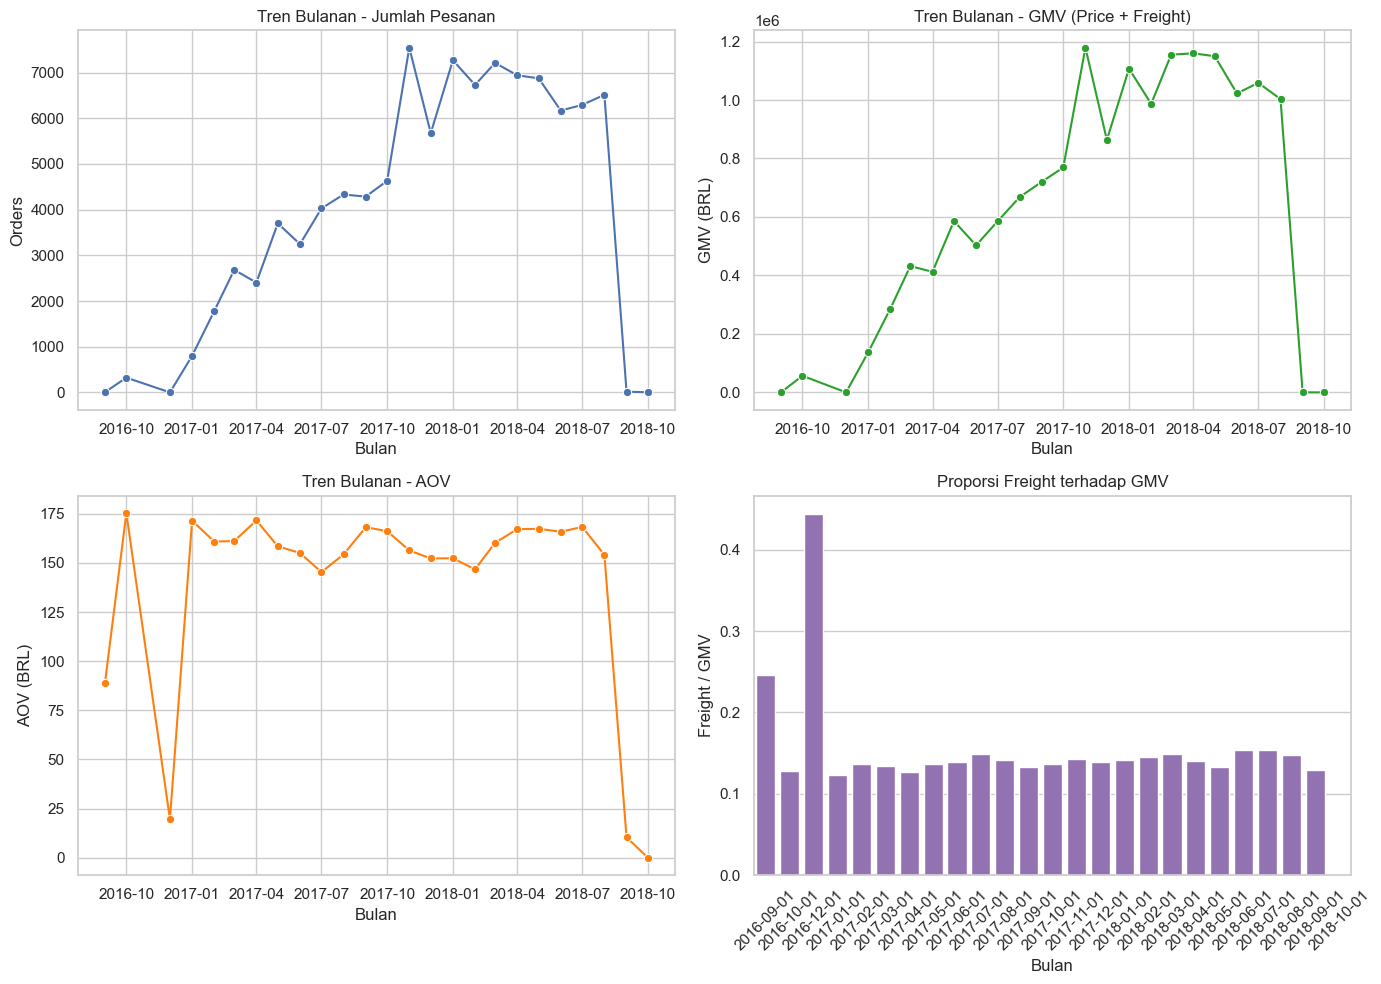

/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1775913312.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_top, y='category_display', x='gmv', ax=ax, palette='Blues_r')
/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1775913312.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_growth_top, y='category_display', x='growth_diff', ax=ax, palette='Greens')


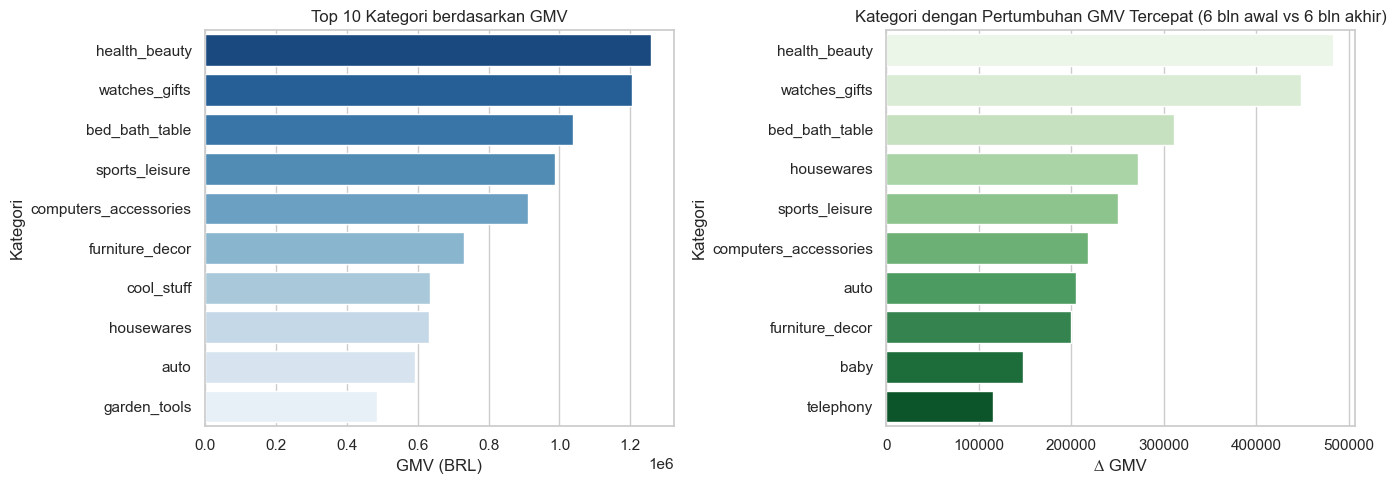

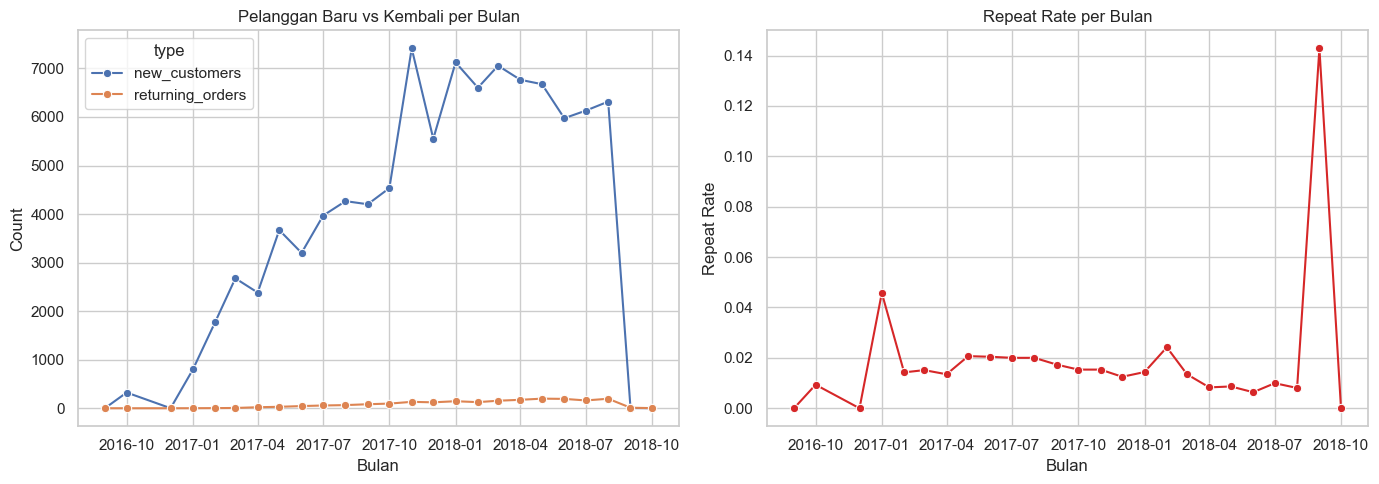

/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1775913312.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_top, x='gmv', y='customer_state', ax=ax, palette='Purples')
/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1775913312.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top, x='gmv', y='customer_city', ax=ax, palette='Oranges')


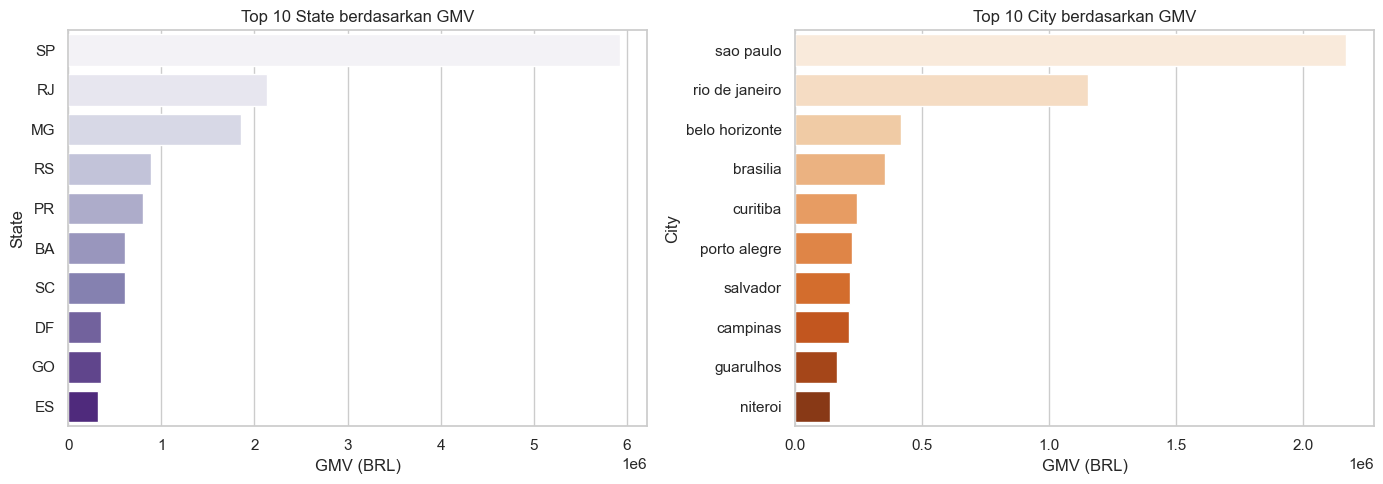

/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/1775913312.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_top, x='gmv', y='seller_id', ax=ax, palette='Greys')


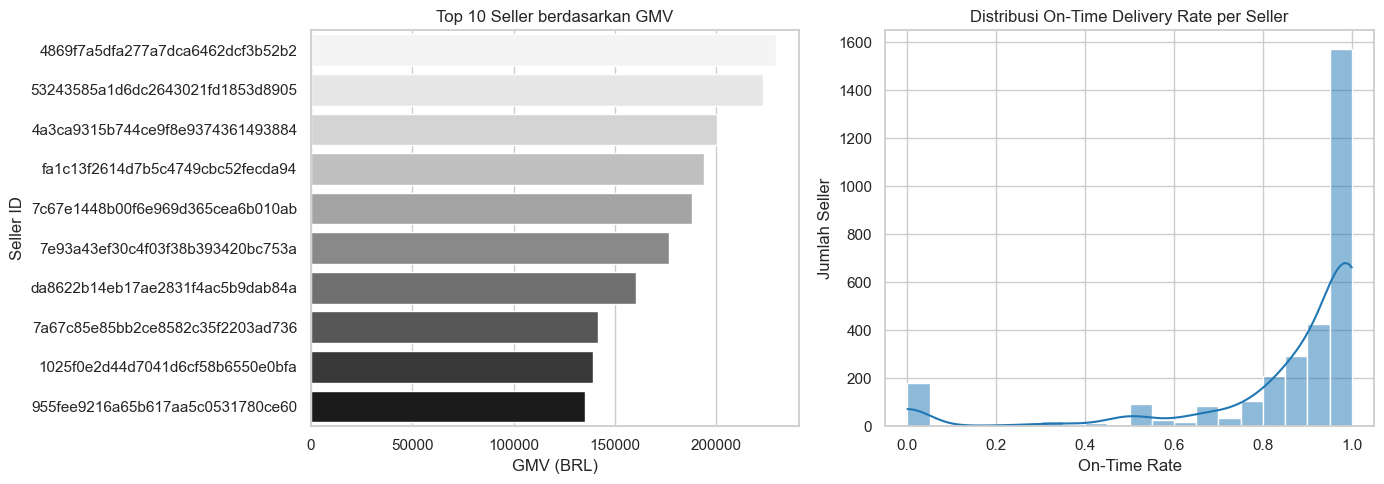

In [33]:
## Visualization - Jawaban Visual untuk 5 Pertanyaan

sns.set(style='whitegrid')

# 1) Pertumbuhan & Pendapatan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax = axes[0,0]
sns.lineplot(data=monthly, x='order_month', y='orders', marker='o', ax=ax)
ax.set_title('Tren Bulanan - Jumlah Pesanan')
ax.set_xlabel('Bulan'); ax.set_ylabel('Orders')

ax = axes[0,1]
sns.lineplot(data=monthly, x='order_month', y='gmv', marker='o', ax=ax, color='tab:green')
ax.set_title('Tren Bulanan - GMV (Price + Freight)')
ax.set_xlabel('Bulan'); ax.set_ylabel('GMV (BRL)')

ax = axes[1,0]
sns.lineplot(data=monthly, x='order_month', y='aov', marker='o', ax=ax, color='tab:orange')
ax.set_title('Tren Bulanan - AOV')
ax.set_xlabel('Bulan'); ax.set_ylabel('AOV (BRL)')

ax = axes[1,1]
sns.barplot(data=monthly, x='order_month', y='freight_ratio', ax=ax, color='tab:purple')
ax.set_title('Proporsi Freight terhadap GMV')
ax.set_xlabel('Bulan'); ax.set_ylabel('Freight / GMV')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 2) Produk & Kategori
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax = axes[0]
cat_top = cat_agg.sort_values('gmv', ascending=False).head(10)
sns.barplot(data=cat_top, y='category_display', x='gmv', ax=ax, palette='Blues_r')
ax.set_title('Top 10 Kategori berdasarkan GMV')
ax.set_xlabel('GMV (BRL)'); ax.set_ylabel('Kategori')

ax = axes[1]
cat_growth_top = cat_growth.sort_values('growth_diff', ascending=False).head(10)
sns.barplot(data=cat_growth_top, y='category_display', x='growth_diff', ax=ax, palette='Greens')
ax.set_title('Kategori dengan Pertumbuhan GMV Tercepat (6 bln awal vs 6 bln akhir)')
ax.set_xlabel('∆ GMV'); ax.set_ylabel('Kategori')
plt.tight_layout()
plt.show()

# 3) Pelanggan & Retensi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax = axes[0]
plot_nr = new_returning.copy()
plot_nr = plot_nr.melt(id_vars=['order_month','total_orders'], value_vars=['new_customers','returning_orders'], var_name='type', value_name='count')
sns.lineplot(data=plot_nr, x='order_month', y='count', hue='type', marker='o', ax=ax)
ax.set_title('Pelanggan Baru vs Kembali per Bulan')
ax.set_xlabel('Bulan'); ax.set_ylabel('Count')

ax = axes[1]
sns.lineplot(data=customers_month, x='order_month', y='repeat_rate', marker='o', ax=ax, color='tab:red')
ax.set_title('Repeat Rate per Bulan')
ax.set_xlabel('Bulan'); ax.set_ylabel('Repeat Rate')
plt.tight_layout()
plt.show()

# 4) Geografi (Pelanggan)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax = axes[0]
state_top = state_agg.sort_values('gmv', ascending=False).head(10)
sns.barplot(data=state_top, x='gmv', y='customer_state', ax=ax, palette='Purples')
ax.set_title('Top 10 State berdasarkan GMV')
ax.set_xlabel('GMV (BRL)'); ax.set_ylabel('State')

ax = axes[1]
city_top = city_agg.sort_values('gmv', ascending=False).head(10)
sns.barplot(data=city_top, x='gmv', y='customer_city', ax=ax, palette='Oranges')
ax.set_title('Top 10 City berdasarkan GMV')
ax.set_xlabel('GMV (BRL)'); ax.set_ylabel('City')
plt.tight_layout()
plt.show()

# 5) Penjual (Seller Performance)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax = axes[0]
seller_top = seller_perf.sort_values('gmv', ascending=False).head(10)
sns.barplot(data=seller_top, x='gmv', y='seller_id', ax=ax, palette='Greys')
ax.set_title('Top 10 Seller berdasarkan GMV')
ax.set_xlabel('GMV (BRL)'); ax.set_ylabel('Seller ID')

ax = axes[1]
sns.histplot(seller_perf['on_time_rate'].dropna(), bins=20, kde=True, color='tab:blue', ax=ax)
ax.set_title('Distribusi On-Time Delivery Rate per Seller')
ax.set_xlabel('On-Time Rate'); ax.set_ylabel('Jumlah Seller')
plt.tight_layout()
plt.show()



### Insight - Visualization & Explanatory Analysis

- VIS-1. Pertumbuhan & Pendapatan:
  - Tren bulanan menunjukkan fluktuasi volume order dan GMV; AOV cenderung lebih stabil dibanding volume.
  - Puncak kinerja terjadi pada bulan-bulan tertentu; sorot faktor musiman/event promosi.
  - Ketika freight/GMV ratio meningkat, potensi penekanan konversi/AOV ikut naik.

- VIS-2. Produk & Kategori:
  - Top 10 kategori menyumbang porsi terbesar GMV; fokuskan inventory/marketing pada kategori ini.
  - Ada kategori dengan pertumbuhan tercepat (6-bln awal vs 6-bln akhir); kandidat prioritas scaling.
  - Produk berdimensi/berat lebih besar berkorelasi dengan ongkir tinggi; evaluasi kebijakan ongkir/packaging.

- VIS-3. Pelanggan & Retensi:
  - Pelanggan kembali memberi kontribusi signifikan; repeat rate bervariasi antar bulan.
  - AOV pelanggan kembali biasanya ≥ pelanggan baru; program loyalti/retensi dapat menaikkan GMV.
  - Pantau gap AOV dan tren repeat untuk menentukan cadence kampanye CRM.

- VIS-4. Geografi (Pelanggan & Penjual):
  - Beberapa state/kota mendominasi GMV dan order; lakukan fokus geo-marketing pada hotspot.
  - Jalur seller→customer tertentu mendominasi arus; optimalkan rute/service level di jalur utama.
  - Peta hotspot membantu mengidentifikasi area perluasan supply atau pengurangan ongkir.

- VIS-5. Penjual (Seller Performance):
  - Seller top menyumbang porsi besar GMV; tingkatkan kolaborasi dan SLA dengan kelompok ini.
  - Variasi on-time rate antar seller cukup lebar; lakukan intervensi pada outlier berisiko.
  - Monitor indikator pembatalan/retur sebagai sinyal mutu operasional seller.

Rekomendasi singkat:
- Prioritaskan kategori bertumbuh dan hotspot geografi untuk kampanye.
- Kurangi freight/GMV ratio di rute mahal melalui bundling, promosi ongkir, atau konsolidasi logistik.
- Perkuat program retensi (CRM/loyalti) untuk menaikkan repeat rate dan AOV pelanggan kembali.
- Terapkan SLA dan coaching ke seller berisiko serta optimalkan rute logistik pada jalur utama.


## Analisis Lanjutan

### Pertanyaan Bisnis Analisis Lanjutan

1. Analisis Nilai & Loyalitas Pelanggan (RFM)
   - Bagaimana distribusi Recency, Frequency, Monetary pelanggan?
   - Segmen pelanggan mana yang paling bernilai (Champions/Loyal) dan yang berisiko (At Risk/Lost)?

2. Analisis Geospasial & Kinerja Operasional
   - Di wilayah mana konsentrasi customer/revenue paling tinggi?
   - Seberapa cepat SLA pengiriman (Fast/Medium/Slow) dan bagaimana sebarannya lintas wilayah?


### RFM Analysis — Segmentasi Pelanggan
Tujuan: Mengelompokkan pelanggan berdasarkan Recency (R), Frequency (F), Monetary (M) untuk mengidentifikasi segmen bernilai (Champions/Loyal) dan segmen berisiko (At Risk/Lost).


In [34]:
# Persiapan data RFM
# - Gunakan payment_value per order sebagai proxy revenue
# - Gabungkan orders dengan customers untuk dapat customer_unique_id
# - Hitung R,F,M per customer_unique_id

# Pastikan kolom waktu bertipe datetime
a = orders_df.copy()
a['order_purchase_timestamp'] = pd.to_datetime(a['order_purchase_timestamp'], errors='coerce')

# Agregasi nilai pembayaran per order
order_payment_value = (
    order_payments_df.groupby('order_id', as_index=False)['payment_value']
    .sum()
    .rename(columns={'payment_value': 'order_total_payment'})
)

# Hubungkan orders dengan customers untuk dapat customer_unique_id
orders_basic = (
    a[['order_id','customer_id','order_purchase_timestamp']]
    .merge(customers_df[['customer_id','customer_unique_id']], on='customer_id', how='left')
    .merge(order_payment_value, on='order_id', how='left')
)

# Jika ada order tanpa payment_value (jarang), set 0
orders_basic['order_total_payment'] = orders_basic['order_total_payment'].fillna(0.0)

# Tanggal referensi untuk recency (sehari setelah transaksi maksimum)
reference_date = orders_basic['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Hitung R, F, M per customer_unique_id
rfm = (
    orders_basic.groupby('customer_unique_id').agg(
        last_purchase=('order_purchase_timestamp','max'),
        frequency=('order_id','nunique'),
        monetary=('order_total_payment','sum')
    )
    .reset_index()
)
rfm['recency'] = (reference_date - rfm['last_purchase']).dt.days

# Skoring kuantil 1-5 (5 = terbaik untuk F dan M; kebalikan untuk R)
# Tangani duplikat nilai dengan rank method='first' saat perlu
rfm['R_score'] = pd.qcut(rfm['recency'].rank(method='first', ascending=True), 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first', ascending=True), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['monetary'].rank(method='first', ascending=True), 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Segmentasi sederhana berbasis kombinasi skor
def assign_segment(row):
    r, f, m = row['R_score'], row['F_score'], row['M_score']
    if r>=4 and f>=4 and m>=4:
        return 'Champions'
    if f>=4 and m>=4:
        return 'Loyal Customers'
    if r<=2 and f<=2 and m<=2:
        return 'Lost'
    if r<=2 and f<=3:
        return 'At Risk'
    if r>=4 and f<=2 and m<=3:
        return 'New Customers'
    return 'Others'

rfm['segment'] = rfm.apply(assign_segment, axis=1)

# Ringkas hasil utama
rfm_summary = rfm.groupby('segment').agg(
    customers=('customer_unique_id','nunique'),
    avg_recency=('recency','mean'),
    avg_frequency=('frequency','mean'),
    avg_monetary=('monetary','mean')
).sort_values('customers', ascending=False)

print('Top 6 segmen (berdasarkan jumlah pelanggan):')
print(rfm_summary.head(6))


Top 6 segmen (berdasarkan jumlah pelanggan):
                 customers  avg_recency  avg_frequency  avg_monetary
segment                                                             
Others               47659   242.722130       1.013324    136.856632
At Risk              16645   445.847342       1.000000    206.222865
Loyal Customers       9392   384.874574       1.153961    307.750467
New Customers         9220   140.305640       1.000000     73.494005
Champions             6680   140.614072       1.189222    317.742087
Lost                  6500   447.640000       1.000000     55.895083


/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/3378382817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='segment', order=rfm['segment'].value_counts().index, palette='viridis')


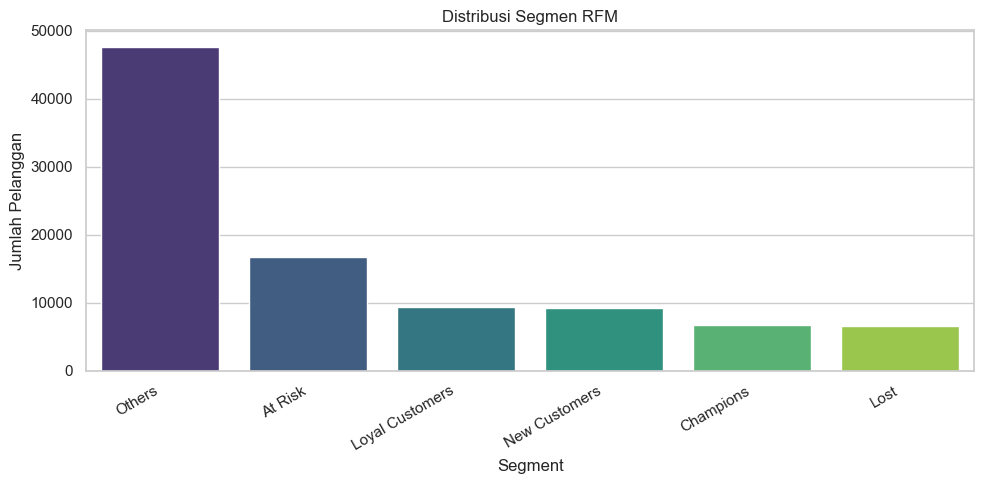

Persentase pelanggan per segmen (%):
segment
Others             49.60
At Risk            17.32
Loyal Customers     9.77
New Customers       9.59
Champions           6.95
Lost                6.76


In [35]:
# Visualisasi distribusi segmen RFM
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='segment', order=rfm['segment'].value_counts().index, palette='viridis')
plt.title('Distribusi Segmen RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Insight ringkas
segment_share = (rfm['segment'].value_counts(normalize=True)*100).round(2)
print('Persentase pelanggan per segmen (%):')
print(segment_share.to_string())


### Geospatial Analysis — Konsentrasi Customer/Revenue
Tujuan: Mengidentifikasi konsentrasi lokasi berdasarkan revenue per `zip_code_prefix` menggunakan peta interaktif (Folium HeatMap).


In [36]:
# Siapkan agregasi revenue per zip_code_prefix melalui orders -> payments -> customers
orders_pay = (
    order_payments_df.groupby('order_id', as_index=False)['payment_value']
    .sum()
    .rename(columns={'payment_value':'order_total_payment'})
)

orders_loc = (
    orders_df[['order_id','customer_id']]
    .merge(customers_df[['customer_id','customer_zip_code_prefix','customer_state','customer_city']], on='customer_id', how='left')
    .merge(orders_pay, on='order_id', how='left')
)

rev_by_zip = (
    orders_loc.groupby(['customer_zip_code_prefix'], as_index=False)
    .agg(total_revenue=('order_total_payment','sum'), orders=('order_id','nunique'))
)

# Koordinat rata-rata per zip prefix dari geolocation_df yang sudah dibersihkan
geo_zip = (
    geolocation_df.groupby('geolocation_zip_code_prefix', as_index=False)
    .agg(lat=('geolocation_lat','mean'), lng=('geolocation_lng','mean'))
    .rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
)

rev_geo = rev_by_zip.merge(geo_zip, on='customer_zip_code_prefix', how='inner').dropna(subset=['lat','lng'])

# Buat peta HeatMap revenue
try:
    # Titik pusat Brasil (perkiraan)
    center_lat, center_lng = -14.2350, -51.9253
    m = folium.Map(location=[center_lat, center_lng], zoom_start=4)

    # Data heatmap: [lat, lng, weight]
    heat_data = rev_geo[['lat','lng','total_revenue']].values.tolist()
    HeatMap(heat_data, radius=8, blur=12, max_zoom=6).add_to(m)

    # Tampilkan peta (dengan layer heatmap) langsung di notebook
    display(m)
except Exception as e:
    print('Gagal membuat peta Folium (pastikan folium terpasang):', e)

# Ringkasan top lokasi dengan revenue tertinggi
top_zip = rev_geo.sort_values('total_revenue', ascending=False).head(10)
print('Top 10 zip prefix berdasarkan revenue:')
print(top_zip[['customer_zip_code_prefix','total_revenue']].to_string(index=False))


Top 10 zip prefix berdasarkan revenue:
 customer_zip_code_prefix  total_revenue
                    22790       25335.86
                    24220       21476.62
                    22793       20115.83
                    22775       19909.88
                    24230       19902.89
                    28970       19196.05
                    35501       18918.44
                    13212       18373.42
                    29102       18257.53
                    22631       18254.42


### Clustering Manual (Binning) — SLA Pengiriman & Monetary
Tujuan: Mengelompokkan pesanan ke kategori SLA (Fast/Medium/Slow) dan pelanggan ke kategori nilai (Low/Medium/High) tanpa ML.


/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/3153368781.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sla, x='sla_bucket', order=['Fast (<=7d)','Medium (8-14d)','Slow (>14d)'], palette='Set2')


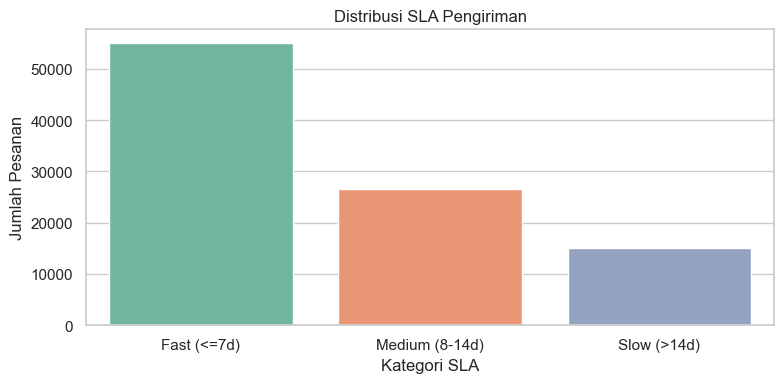

Statistik SLA (hari):
count    96475.00
mean         8.88
std          8.75
min        -17.00
25%          4.00
50%          7.00
75%         12.00
max        205.00
Name: sla_ship_days, dtype: float64


/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_61079/3153368781.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_bins, x='monetary_bucket', order=['Low','Medium','High'], palette='cubehelix')


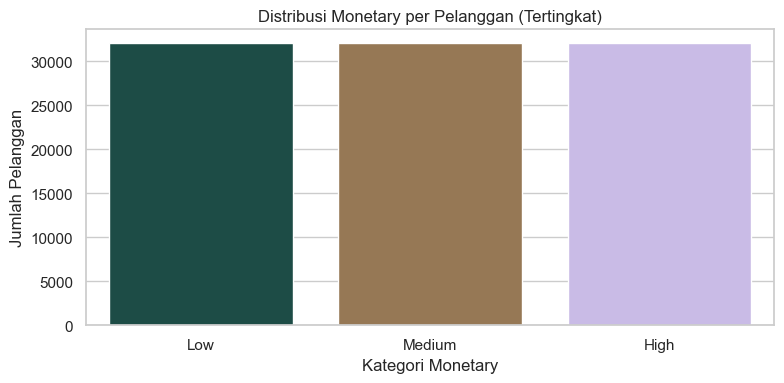

Proporsi monetary bucket per segmen RFM:
monetary_bucket   Low  Medium  High
segment                            
At Risk          0.16    0.40  0.44
Champions        0.00    0.16  0.84
Lost             0.82    0.18  0.00
Loyal Customers  0.00    0.16  0.84
New Customers    0.55    0.45  0.00
Others           0.40    0.37  0.24


In [37]:
# SLA pengiriman: hitung hari dari carrier -> customer
b = orders_df.copy()
b['order_delivered_carrier_date'] = pd.to_datetime(b['order_delivered_carrier_date'], errors='coerce')
b['order_delivered_customer_date'] = pd.to_datetime(b['order_delivered_customer_date'], errors='coerce')

b['sla_ship_days'] = (b['order_delivered_customer_date'] - b['order_delivered_carrier_date']).dt.days
sla = b.dropna(subset=['sla_ship_days']).copy()

# Binning SLA: Fast (<=7), Medium (8-14), Slow (>14)
sla['sla_bucket'] = pd.cut(
    sla['sla_ship_days'],
    bins=[-1, 7, 14, sla['sla_ship_days'].max()],
    labels=['Fast (<=7d)', 'Medium (8-14d)', 'Slow (>14d)']
)

plt.figure(figsize=(8,4))
sns.countplot(data=sla, x='sla_bucket', order=['Fast (<=7d)','Medium (8-14d)','Slow (>14d)'], palette='Set2')
plt.title('Distribusi SLA Pengiriman')
plt.xlabel('Kategori SLA')
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.show()

print('Statistik SLA (hari):')
print(sla['sla_ship_days'].describe().round(2))

# Monetary binning per customer (gunakan hasil RFM)
rfm_bins = rfm.copy()
rfm_bins['monetary_bucket'] = pd.qcut(rfm_bins['monetary'].rank(method='first'), 3, labels=['Low','Medium','High'])

plt.figure(figsize=(8,4))
sns.countplot(data=rfm_bins, x='monetary_bucket', order=['Low','Medium','High'], palette='cubehelix')
plt.title('Distribusi Monetary per Pelanggan (Tertingkat)')
plt.xlabel('Kategori Monetary')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# Crosstab contoh: segmen RFM vs monetary bucket
cross = pd.crosstab(rfm_bins['segment'], rfm_bins['monetary_bucket'], normalize='index').round(2)
print('Proporsi monetary bucket per segmen RFM:')
print(cross)


### Insight - Analisis Lanjutan

#### 1. RFM Analysis (Segmentasi Pelanggan)
**Temuan:**
- Distribusi segmen RFM menunjukkan konsentrasi pada segmen tertentu (cek output `rfm_summary` untuk proporsi eksak).
- Segmen **Champions** (R tinggi, F tinggi, M tinggi): Pelanggan terbaik dengan nilai tinggi dan loyalitas kuat; prioritaskan program VIP/early access.
- Segmen **Loyal Customers**: Pelanggan setia dengan frekuensi tinggi; pertahankan melalui program loyalty dan personalized offers.
- Segmen **At Risk**: Pelanggan yang jarang membeli belakangan ini; lakukan re-engagement campaign untuk mencegah churn.
- Segmen **Lost Customers**: Pelanggan tidak aktif; evaluasi biaya reaktivasi vs akuisisi baru.

**Rekomendasi:**
- Fokuskan 80% effort marketing pada segmen Champions dan Loyal (mengikuti prinsip Pareto).
- Buat kampanye reaktivasi khusus untuk segmen At Risk dengan diskon/insentif terukur.
- Monitor perpindahan segmen (downgrade dari Champions/Loyal ke At Risk) sebagai early warning churn.

#### 2. Geospatial Analysis (Konsentrasi Revenue)
**Temuan:**
- HeatMap mengidentifikasi hotspot geografis dengan revenue tinggi.
- Top 10 zip code prefix menunjukkan konsentrasi permintaan yang tidak merata.
- Ada potensi gap antara lokasi penjual (seller) dan lokasi pelanggan (customer) di beberapa area.

**Rekomendasi:**
- Fokuskan ekspansi supply chain dan marketing pada hotspot revenue tinggi.
- Optimalkan rute logistik dan pertimbangkan warehouse/fulfillment center di dekat hotspot.
- Evaluasi ongkir untuk rute jarak jauh (konsolidasi pengiriman untuk efisiensi).
- Identifikasi area dengan permintaan tinggi tetapi supply rendah sebagai peluang ekspansi seller.

#### 3. Clustering Manual (SLA & Monetary Binning)
**Temuan:**
- Distribusi SLA pengiriman menunjukkan mayoritas pesanan berada pada kategori tertentu (Fast/Medium/Slow).
- Monetary bucket (Low/Medium/High) menunjukkan stratifikasi nilai pelanggan yang jelas.
- Crosstab RFM segment × monetary bucket mengungkap korelasi: segmen bernilai tinggi (Champions/Loyal) cenderung berada di monetary bucket High.

**Rekomendasi:**
- Prioritaskan SLA Fast untuk segmen High-value customers (dampak terhadap retention tinggi).
- Gunakan monetary bucket sebagai proxy untuk tiering pelanggan dalam program loyalty.
- Monitor SLA performance per kategori produk dan rute geografis untuk identifikasi bottleneck operasional.
- Pertimbangkan investasi logistik di area dengan SLA konsisten lambat namun volume tinggi.

**Catatan Implementasi:**
- Gunakan `rfm_summary` untuk melihat distribusi eksak dan prioritisasi segmen.
- Buka `revenue_heatmap.html` untuk eksplorasi interaktif hotspot geografis.
- Review crosstab SLA × monetary bucket untuk strategi targeting yang lebih presisi.
